## Dependencies

Listed here:
* https://duckdb.org/docs/guides/python/jupyter.html

In [2]:
# Load duckdb, which lets us efficiently load large files
import duckdb

# Load pandas, which lets us manipulate dataframes
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True

%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Allow named parameters (python variables) in SQL cells
%config SqlMagic.named_parameters=True

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

/Users/me/jaanli/exploring_american_community_survey_data/.venv/lib/python3.11/site-packages/sql/traits.py:20: FutureWarning: named_parameters: boolean values are now deprecated. Value True will be treated as "enabled". 
Please use a valid option: "warn", "enabled", or "disabled". 
For more information, see the docs: https://jupysql.ploomber.io/en/latest/api/configuration.html#named-parameters
  warnings.warn(


In [4]:
import yaml

yaml_path = '../american_community_survey/dbt_project.yml'
with open(yaml_path, 'r') as file:
    config = yaml.safe_load(file)

output_path = config['vars']['output_path']
print(output_path)

~/data/american_community_survey


In [6]:
%%sql 
SELECT * FROM '~/data/american_community_survey/individual_people_united_states_*.parquet'

,Record Type,Housing unit/GQ person serial number,Division code based on 2010 Census definitions Division code based on 2020 Census definitions,Person number,"Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)",Region code based on 2020 Census definitions,State Code based on 2020 Census definitions,Adjustment factor for income and earnings dollar amounts (6 implied decimal places),Person's weight,Age,...,Person's Weight replicate 71,Person's Weight replicate 72,Person's Weight replicate 73,Person's Weight replicate 74,Person's Weight replicate 75,Person's Weight replicate 76,Person's Weight replicate 77,Person's Weight replicate 78,Person's Weight replicate 79,Person's Weight replicate 80
0,P,2022GQ0000031,6,01,02803,3,01,1042311,69,85,...,71,69,68,69,69,69,69,69,71,70
1,P,2022GQ0000111,6,01,02000,3,01,1042311,22,51,...,39,22,2,22,22,4,28,43,41,4
2,P,2022GQ0000200,6,01,02803,3,01,1042311,45,36,...,8,30,44,11,47,87,99,40,42,44
3,P,2022GQ0000261,6,01,01100,3,01,1042311,4,74,...,4,4,3,4,4,3,3,4,4,3
4,P,2022GQ0000296,6,01,01502,3,01,1042311,47,49,...,60,10,10,52,52,40,69,60,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,P,2022HU1444522,8,01,00400,4,56,1042311,119,33,...,154,118,55,72,29,49,196,173,162,124
3373374,P,2022HU1444522,8,02,00400,4,56,1042311,89,27,...,151,87,38,67,22,33,124,97,135,115
3373375,P,2022HU1444522,8,03,00400,4,56,1042311,177,1,...,385,182,81,136,43,73,214,150,202,258
3373376,P,2022HU1446126,8,01,00200,4,56,1042311,126,66,...,41,38,116,143,230,127,111,149,119,136


In [7]:
%%sql 
SELECT * FROM '~/data/american_community_survey/housing_units_united_states_*.parquet'

,Record Type,Housing unit/GQ person serial number,Division code based on 2010 Census definitions Division code based on 2020 Census definitions,"Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)",Region code based on 2020 Census definitions,State Code based on 2020 Census definitions,Adjustment factor for housing dollar amounts (6 implied decimal places),Adjustment factor for income and earnings dollar amounts (6 implied decimal places),Housing Unit Weight,Number of persons in this household,...,Housing Weight replicate 71,Housing Weight replicate 72,Housing Weight replicate 73,Housing Weight replicate 74,Housing Weight replicate 75,Housing Weight replicate 76,Housing Weight replicate 77,Housing Weight replicate 78,Housing Weight replicate 79,Housing Weight replicate 80
0,H,2022GQ0000175,4,01105,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
1,H,2022GQ0000254,4,02600,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
2,H,2022GQ0000257,4,00200,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
3,H,2022GQ0000283,4,00100,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
4,H,2022GQ0000285,4,01600,2,29,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611645,H,2022HU1446030,6,00800,3,28,1000000,1042311,40,2,...,77,15,30,82,87,51,53,8,69,57
1611646,H,2022HU1446092,6,00600,3,28,1000000,1042311,34,5,...,38,20,9,47,30,8,12,62,36,43
1611647,H,2022HU1446243,6,01101,3,28,1000000,1042311,38,2,...,54,9,33,41,43,12,47,63,36,11
1611648,H,2022HU1446341,6,01900,3,28,1000000,1042311,95,4,...,89,73,24,28,189,200,39,73,180,122


In [5]:
df = _

Text(0.5, 1.0, 'Age of the householder')

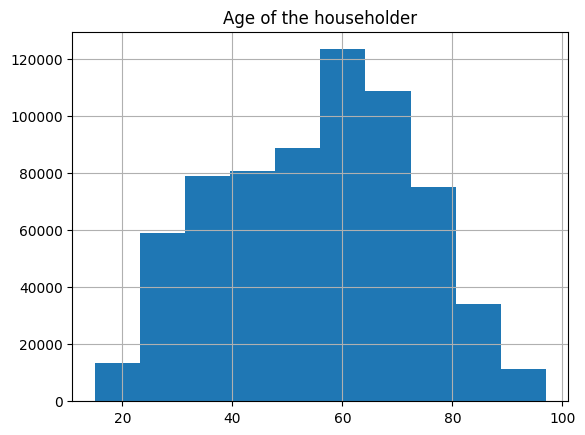

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df['HHLDRAGEP'].hist(ax=ax)
ax.set_title('Age of the householder') # from 



In [10]:
output_path

'~/data/american_community_survey'

In [22]:
# collect the unique headers of all csv files recursively globbed in the output path
from pathlib import Path
import os

headers = set()
for path in Path(os.path.expanduser(output_path)).rglob('*.csv'):
    print(path)
    with open(path, 'r') as file:
        header = file.readline().split(',')
        path.name
        print(len(set(header)))
        for h in header:
            headers.add(h)


/Users/me/data/american_community_survey/2022/1-Year/csv_pmi/psam_p26.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hsc/psam_h45.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_hsd/psam_h46.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pmn/psam_p27.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hut/psam_h49.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pal/psam_p01.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pnh/psam_p33.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pky/psam_p21.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hus/psam_husb.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_hus/psam_husa.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pak/psam_p02.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pma/psam_p25.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pmo/p

In [18]:
len(headers)

521

In [50]:
df = pd.read_json('../data/PUMS_Data_Dictionary_2022.json')

In [51]:
df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
Type,C,C,C,C,C,C,C,C,N,N,...,N,N,N,N,N,N,N,N,N,N
Length,1,13,1,5,1,2,7,7,5,2,...,5,5,5,5,5,5,5,5,5,5
Description,Record Type,Housing unit/GQ person serial number,Division code based on 2010 Census definitions...,Public use microdata area code (PUMA) based on...,Region code based on 2020 Census definitions,State Code based on 2020 Census definitions,Adjustment factor for housing dollar amounts (...,Adjustment factor for income and earnings doll...,Housing Unit Weight,Number of persons in this household,...,Person's Weight replicate 71,Person's Weight replicate 72,Person's Weight replicate 73,Person's Weight replicate 74,Person's Weight replicate 75,Person's Weight replicate 76,Person's Weight replicate 77,Person's Weight replicate 78,Person's Weight replicate 79,Person's Weight replicate 80
Values,"[{'Code': 'H', 'Label': 'Housing Record or Gro...","[{'Code': '2022GQ0000001', 'Label': 'GQ Unique...","[{'Code': '0', 'Label': 'Puerto Rico'}, {'Code...","[{'Code': '00100', 'Label': 'Public use microd...","[{'Code': '1', 'Label': 'Northeast'}, {'Code':...","[{'Code': '01', 'Label': 'Alabama/AL'}, {'Code...","[{'Code': '1000000', 'Label': '2022 factor (1....","[{'Code': '1042311', 'Label': '2022 factor (1....","[{'Code': '0', 'Label': 'Group quarters place ...","[{'Code': '0', 'Label': 'Vacant unit'}, {'Code...",...,"[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of...","[{'Code': '-9999', 'Label': 'Integer weight of..."


In [39]:
import json
with open('../data/PUMS_Data_Dictionary_2022.json', 'r') as file:
    data_dict = json.load(file)

# Initialize an empty list to hold all variable records and their values
records = []

# Iterate over each variable in the dictionary
for variable, details in data_dict.items():
    # Create a record for the variable itself
    var_record = {
        "Variable": variable,
        "Type": details["Type"],
        "Length": details["Length"],
        "Description": details["Description"],
    }
    records.append(var_record)
    
    # Add additional records for each value of the variable
    for value in details["Values"]:
        val_record = {
            "Variable": variable,
            "Code": value.get("Code", ""),
            "Label": value.get("Label", ""),
            # You can include other details from the variable if needed
        }
        records.append(val_record)


In [41]:
df = pd.DataFrame(records)


In [47]:
df = pd.read_csv("https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2022.csv", names=["Variable", "Type", "Length", "Description", "Code", "Label", "Desc"])


In [48]:
df

,Variable,Type,Length,Description,Code,Label,Desc
0,NAME,RT,C,1,Record Type,NaN,NaN
1,VAL,RT,C,1,H,H,Housing Record or Group Quarters Unit
2,VAL,RT,C,1,P,P,Person Record
3,NAME,SERIALNO,C,13,Housing unit/GQ person serial number,NaN,NaN
4,VAL,SERIALNO,C,13,2022GQ0000001,2022GQ9999999,GQ Unique identifier
...,...,...,...,...,...,...,...
5979,VAL,PWGTP78,N,5,-9999,9999,Integer weight of person
5980,NAME,PWGTP79,N,5,Person's Weight replicate 79,NaN,NaN
5981,VAL,PWGTP79,N,5,-9999,9999,Integer weight of person
5982,NAME,PWGTP80,N,5,Person's Weight replicate 80,NaN,NaN


In [17]:
%%sql 
SELECT
    RT AS "Record Type",
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pny/psam_p36.csv')

,Record Type
0,P
1,P
2,P
3,P
4,P
...,...
203886,P
203887,P
203888,P
203889,P


In [19]:
%%sql
SELECT
    CASE RT 
        WHEN 'H' THEN 'Housing Record or Group Quarters Unit' 
        WHEN 'P' THEN 'Person Record' 
    END AS Record_Type
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pwa/psam_p53.csv')


,Record_Type
0,Person Record
1,Person Record
2,Person Record
3,Person Record
4,Person Record
...,...
80813,Person Record
80814,Person Record
80815,Person Record
80816,Person Record


In [24]:
%%sql
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS "Record Type",
	CASE SERIALNO
		WHEN '2022GQ0000001' THEN 'GQ Unique identifier'
		WHEN '2022HU0000001' THEN 'HU Unique identifier'
	END AS "Housing unit/GQ person serial number",
    CASE FPOWSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Place of work state allocation flag",
	CASE FPRIVCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Private health insurance coverage recode allocation flag",
	CASE FPUBCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Public health coverage recode allocation flag",
    	CASE RAC1P
		WHEN '1' THEN 'White alone'
		WHEN '2' THEN 'Black or African American alone'
		WHEN '3' THEN 'American Indian alone'
		WHEN '4' THEN 'Alaska Native alone'
		WHEN '5' THEN 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races'
		WHEN '6' THEN 'Asian alone'
		WHEN '7' THEN 'Native Hawaiian and Other Pacific Islander alone'
		WHEN '8' THEN 'Some Other Race alone'
		WHEN '9' THEN 'Two or More Races'
	END AS "Recoded detailed race code",
	CASE RAC2P
		WHEN '01' THEN 'White alone'
		WHEN '02' THEN 'Black or African American alone'
		WHEN '03' THEN 'Apache alone'
		WHEN '04' THEN 'Blackfeet alone'
		WHEN '05' THEN 'Cherokee alone'
		WHEN '07' THEN 'Chickasaw alone'
		WHEN '08' THEN 'Chippewa alone'
		WHEN '09' THEN 'Choctaw alone'
		WHEN '11' THEN 'Creek alone'
		WHEN '12' THEN 'Crow alone'
		WHEN '13' THEN 'Hopi alone'
		WHEN '14' THEN 'Iroquois alone'
		WHEN '15' THEN 'Lumbee alone'
		WHEN '16' THEN 'Mexican American Indian alone'
		WHEN '17' THEN 'Navajo alone'
		WHEN '18' THEN 'Pima alone'
		WHEN '19' THEN 'Potawatomi alone'
		WHEN '20' THEN 'Pueblo alone'
		WHEN '21' THEN 'Puget Sound Salish alone'
		WHEN '23' THEN 'Sioux alone'
		WHEN '24' THEN 'South American Indian alone'
		WHEN '25' THEN 'Tohono OOdham alone'
		WHEN '26' THEN 'Yaqui alone'
		WHEN '27' THEN 'Other specified American Indian tribes alone'
		WHEN '28' THEN 'All other specified American Indian tribe combinations'
		WHEN '29' THEN 'American Indian, tribe not specified'
		WHEN '30' THEN 'Alaskan Athabascan alone'
		WHEN '31' THEN 'Tlingit-Haida alone'
		WHEN '32' THEN 'Inupiat alone'
		WHEN '33' THEN 'Yupik alone'
		WHEN '34' THEN 'Aleut alone'
		WHEN '35' THEN 'Other Alaska Native'
		WHEN '36' THEN 'Other American Indian and Alaska Native specified'
		WHEN '37' THEN 'American Indian and Alaska Native, not specified'
		WHEN '38' THEN 'Asian Indian alone'
		WHEN '39' THEN 'Bangladeshi alone'
		WHEN '40' THEN 'Bhutanese alone'
		WHEN '41' THEN 'Burmese alone'
		WHEN '42' THEN 'Cambodian alone'
		WHEN '43' THEN 'Chinese, except Taiwanese, alone'
		WHEN '44' THEN 'Taiwanese alone'
		WHEN '45' THEN 'Filipino alone'
		WHEN '46' THEN 'Hmong alone'
		WHEN '47' THEN 'Indonesian alone'
		WHEN '48' THEN 'Japanese alone'
		WHEN '49' THEN 'Korean alone'
		WHEN '50' THEN 'Laotian alone'
		WHEN '51' THEN 'Malaysian alone'
		WHEN '52' THEN 'Mongolian alone'
		WHEN '53' THEN 'Nepalese alone'
		WHEN '54' THEN 'Pakistani alone'
		WHEN '55' THEN 'Sri Lankan alone'
		WHEN '56' THEN 'Thai alone'
		WHEN '57' THEN 'Vietnamese alone'
		WHEN '58' THEN 'Other Asian alone'
		WHEN '59' THEN 'All combinations of Asian races only'
		WHEN '60' THEN 'Native Hawaiian alone'
		WHEN '61' THEN 'Samoan alone'
		WHEN '62' THEN 'Tongan alone'
		WHEN '63' THEN 'Chamorro alone'
		WHEN '64' THEN 'Marshallese alone'
		WHEN '65' THEN 'Fijian alone'
		WHEN '66' THEN 'Other Native Hawaiian and Other Pacific Islander'
		WHEN '67' THEN 'Some Other Race alone'
		WHEN '68' THEN 'Two or More Races'
	END AS "Recoded detailed race code",
	CASE RAC3P
		WHEN '001' THEN 'White alone'
		WHEN '002' THEN 'Black or African American alone'
		WHEN '003' THEN 'American Indian and Alaska Native alone'
		WHEN '004' THEN 'Asian Indian alone'
		WHEN '005' THEN 'Chinese alone'
		WHEN '006' THEN 'Filipino alone'
		WHEN '007' THEN 'Japanese alone'
		WHEN '008' THEN 'Korean alone'
		WHEN '009' THEN 'Vietnamese alone'
		WHEN '010' THEN 'Other Asian alone'
		WHEN '011' THEN 'Native Hawaiian alone'
		WHEN '012' THEN 'Chamorro alone'
		WHEN '013' THEN 'Samoan alone'
		WHEN '014' THEN 'Other Pacific Islander alone'
		WHEN '015' THEN 'Some Other Race alone'
		WHEN '016' THEN 'White; Black or African American'
		WHEN '017' THEN 'White; American Indian and Alaska Native'
		WHEN '018' THEN 'White; Asian Indian'
		WHEN '019' THEN 'White; Chinese'
		WHEN '020' THEN 'White; Filipino'
		WHEN '021' THEN 'White; Japanese'
		WHEN '022' THEN 'White; Korean'
		WHEN '023' THEN 'White; Vietnamese'
		WHEN '024' THEN 'White; Other Asian'
		WHEN '025' THEN 'White; Native Hawaiian'
		WHEN '026' THEN 'White; Chamorro'
		WHEN '027' THEN 'White; Samoan'
		WHEN '028' THEN 'White; Other Pacific Islander'
		WHEN '029' THEN 'White; Some Other Race'
		WHEN '030' THEN 'Black or African American; American Indian and Alaska Native'
		WHEN '031' THEN 'Black or African American; Asian Indian'
		WHEN '032' THEN 'Black or African American; Chinese'
		WHEN '033' THEN 'Black or African American; Filipino'
		WHEN '034' THEN 'Black or African American; Japanese'
		WHEN '035' THEN 'Black or African American; Korean'
		WHEN '036' THEN 'Black or African American; Other Asian'
		WHEN '037' THEN 'Black or African American; Other Pacific Islander'
		WHEN '038' THEN 'Black or African American; Some Other Race'
		WHEN '039' THEN 'American Indian and Alaska Native; Asian Indian'
		WHEN '040' THEN 'American Indian and Alaska Native; Filipino'
		WHEN '041' THEN 'American Indian and Alaska Native; Some Other Race'
		WHEN '042' THEN 'Asian Indian; Other Asian'
		WHEN '043' THEN 'Asian Indian; Some Other Race'
		WHEN '044' THEN 'Chinese; Filipino'
		WHEN '045' THEN 'Chinese; Japanese'
		WHEN '046' THEN 'Chinese; Korean'
		WHEN '047' THEN 'Chinese; Vietnamese'
		WHEN '048' THEN 'Chinese; Other Asian'
		WHEN '049' THEN 'Chinese; Native Hawaiian'
		WHEN '050' THEN 'Filipino; Japanese'
		WHEN '051' THEN 'Filipino; Native Hawaiian'
		WHEN '052' THEN 'Filipino; Other Pacific Islander'
		WHEN '053' THEN 'Filipino; Some Other Race'
		WHEN '054' THEN 'Japanese; Korean'
		WHEN '055' THEN 'Japanese; Native Hawaiian'
		WHEN '056' THEN 'Vietnamese; Other Asian'
		WHEN '057' THEN 'Other Asian; Other Pacific Islander'
		WHEN '058' THEN 'Other Asian; Some Other Race'
		WHEN '059' THEN 'Other Pacific Islander; Some Other Race'
		WHEN '060' THEN 'White; Black or African American; American Indian and Alaska Native'
		WHEN '061' THEN 'White; Black or African American; Filipino'
		WHEN '062' THEN 'White; Black or African American; Some Other Race'
		WHEN '063' THEN 'White; American Indian and Alaska Native; Filipino'
		WHEN '064' THEN 'White; American Indian and Alaska Native; Some Other Race'
		WHEN '065' THEN 'White; Chinese; Filipino'
		WHEN '066' THEN 'White; Chinese; Japanese'
		WHEN '067' THEN 'White; Chinese; Native Hawaiian'
		WHEN '068' THEN 'White; Filipino; Native Hawaiian'
		WHEN '069' THEN 'White; Japanese; Native Hawaiian'
		WHEN '070' THEN 'White; Other Asian; Some Other Race'
		WHEN '071' THEN 'Chinese; Filipino; Native Hawaiian'
		WHEN '072' THEN 'White; Chinese; Filipino; Native Hawaiian'
		WHEN '073' THEN 'White; Chinese; Japanese; Native Hawaiian'
		WHEN '074' THEN 'Black or African American; Asian groups'
		WHEN '075' THEN 'Black or African American; Native Hawaiian and Other Pacific Islander groups'
		WHEN '076' THEN 'Asian Indian; Asian groups'
		WHEN '077' THEN 'Filipino; Asian groups'
		WHEN '078' THEN 'White; Black or African American; Asian groups'
		WHEN '079' THEN 'White; American Indian and Alaska Native; Asian groups'
		WHEN '080' THEN 'White; Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '081' THEN 'White; Black or African American; American Indian and Alaska Native; Asian groups'
		WHEN '082' THEN 'White; Black or African American; American Indian and Alaska Native; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '083' THEN 'White; Black or African American; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '084' THEN 'White; American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups'
		WHEN '085' THEN 'White; Chinese; Filipino; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '086' THEN 'White; Chinese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '087' THEN 'White; Filipino; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '088' THEN 'White; Japanese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '089' THEN 'White; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '090' THEN 'Black or African American; American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '091' THEN 'Black or African American; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '092' THEN 'American Indian and Alaska Native; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '093' THEN 'Asian Indian; and or or White; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '094' THEN 'Chinese; Japanese; Native Hawaiian; and or or other Asian and or or Pacific Islander groups'
		WHEN '095' THEN 'Chinese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '096' THEN 'Filipino; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '097' THEN 'Japanese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '098' THEN 'Korean; and or or Vietnamese; and or or Other Asian; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '099' THEN 'Native Hawaiian; and or or Pacific Islander groups; and or or Some Other Race'
		WHEN '100' THEN 'White; and or or Black or African American; and or or American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
	END AS "Recoded detailed race code",
	CASE RACAIAN
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "American Indian and Alaska Native recode (American Indian and Alaska Native alone or in combination with one or more other races)",
	CASE RACASN
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Asian recode (Asian alone or in combination with one or more other races)",
	CASE RACBLK
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Black or African American recode (Black alone or in combination with one or more other races)",
	CASE RACNH
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Native Hawaiian recode (Native Hawaiian alone or in combination with one or more other races)",
	CASE RACNUM
		WHEN '1' THEN 'Race groups'
	END AS "Number of major race groups represented",
	CASE RACPI
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Other Pacific Islander recode (Other Pacific Islander alone or in combination with one or more other races)",
	CASE RACSOR
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Some other race recode (Some other race alone or in combination with one or more other races)",
	CASE RACWHT
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "White recode (White alone or in combination with one or more other races)",
	CASE RC
		WHEN 'b' THEN 'Not applicable - in GQ'
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Related child",
	CASE SCIENGP
		WHEN 'b' THEN 'Not applicable - less than bachelors degree'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Field of Degree Science and Engineering Flag - NSF Definition",
	CASE SCIENGRLP
		WHEN 'b' THEN 'Not applicable - less than bachelors degree'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Field of Degree Science and Engineering Related Flag - NSF Definition",
	CASE SFN
		WHEN 'b' THEN 'Not applicable - GQ or not in a subfamily'
		WHEN '1' THEN 'In subfamily 1'
		WHEN '2' THEN 'In subfamily 2'
		WHEN '3' THEN 'In subfamily 3'
		WHEN '4' THEN 'In subfamily 4'
	END AS "Subfamily number",
	CASE SFR
		WHEN 'b' THEN 'Not applicable - GQ or not in a subfamily'
		WHEN '1' THEN 'Husband or wife no children'
		WHEN '2' THEN 'Husband or wife with children'
		WHEN '3' THEN 'Parent in a one-parent subfamily'
		WHEN '4' THEN 'Child in a married-couple subfamily'
		WHEN '5' THEN 'Child in a mother-child subfamily'
		WHEN '6' THEN 'Child in a father-child subfamily'
	END AS "Subfamily relationship"
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pny/psam_p36.csv')



RuntimeError: Error running the query: (duckdb.duckdb.ConversionException) Conversion Error: Could not convert string 'b' to INT64
(Background on this error at: https://sqlalche.me/e/20/9h9h)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [25]:
%%sql
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS "Record Type",
	CASE SERIALNO
		WHEN '2022GQ0000001' THEN 'GQ Unique identifier'
		WHEN '2022HU0000001' THEN 'HU Unique identifier'
	END AS "Housing unit/GQ person serial number",
    CASE FPOWSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Place of work state allocation flag",
	CASE FPRIVCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Private health insurance coverage recode allocation flag",
	CASE FPUBCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Public health coverage recode allocation flag",
    	CASE RAC1P
		WHEN '1' THEN 'White alone'
		WHEN '2' THEN 'Black or African American alone'
		WHEN '3' THEN 'American Indian alone'
		WHEN '4' THEN 'Alaska Native alone'
		WHEN '5' THEN 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races'
		WHEN '6' THEN 'Asian alone'
		WHEN '7' THEN 'Native Hawaiian and Other Pacific Islander alone'
		WHEN '8' THEN 'Some Other Race alone'
		WHEN '9' THEN 'Two or More Races'
	END AS "Recoded detailed race code",
	CASE RAC2P
		WHEN '01' THEN 'White alone'
		WHEN '02' THEN 'Black or African American alone'
		WHEN '03' THEN 'Apache alone'
		WHEN '04' THEN 'Blackfeet alone'
		WHEN '05' THEN 'Cherokee alone'
		WHEN '07' THEN 'Chickasaw alone'
		WHEN '08' THEN 'Chippewa alone'
		WHEN '09' THEN 'Choctaw alone'
		WHEN '11' THEN 'Creek alone'
		WHEN '12' THEN 'Crow alone'
		WHEN '13' THEN 'Hopi alone'
		WHEN '14' THEN 'Iroquois alone'
		WHEN '15' THEN 'Lumbee alone'
		WHEN '16' THEN 'Mexican American Indian alone'
		WHEN '17' THEN 'Navajo alone'
		WHEN '18' THEN 'Pima alone'
		WHEN '19' THEN 'Potawatomi alone'
		WHEN '20' THEN 'Pueblo alone'
		WHEN '21' THEN 'Puget Sound Salish alone'
		WHEN '23' THEN 'Sioux alone'
		WHEN '24' THEN 'South American Indian alone'
		WHEN '25' THEN 'Tohono OOdham alone'
		WHEN '26' THEN 'Yaqui alone'
		WHEN '27' THEN 'Other specified American Indian tribes alone'
		WHEN '28' THEN 'All other specified American Indian tribe combinations'
		WHEN '29' THEN 'American Indian, tribe not specified'
		WHEN '30' THEN 'Alaskan Athabascan alone'
		WHEN '31' THEN 'Tlingit-Haida alone'
		WHEN '32' THEN 'Inupiat alone'
		WHEN '33' THEN 'Yupik alone'
		WHEN '34' THEN 'Aleut alone'
		WHEN '35' THEN 'Other Alaska Native'
		WHEN '36' THEN 'Other American Indian and Alaska Native specified'
		WHEN '37' THEN 'American Indian and Alaska Native, not specified'
		WHEN '38' THEN 'Asian Indian alone'
		WHEN '39' THEN 'Bangladeshi alone'
		WHEN '40' THEN 'Bhutanese alone'
		WHEN '41' THEN 'Burmese alone'
		WHEN '42' THEN 'Cambodian alone'
		WHEN '43' THEN 'Chinese, except Taiwanese, alone'
		WHEN '44' THEN 'Taiwanese alone'
		WHEN '45' THEN 'Filipino alone'
		WHEN '46' THEN 'Hmong alone'
		WHEN '47' THEN 'Indonesian alone'
		WHEN '48' THEN 'Japanese alone'
		WHEN '49' THEN 'Korean alone'
		WHEN '50' THEN 'Laotian alone'
		WHEN '51' THEN 'Malaysian alone'
		WHEN '52' THEN 'Mongolian alone'
		WHEN '53' THEN 'Nepalese alone'
		WHEN '54' THEN 'Pakistani alone'
		WHEN '55' THEN 'Sri Lankan alone'
		WHEN '56' THEN 'Thai alone'
		WHEN '57' THEN 'Vietnamese alone'
		WHEN '58' THEN 'Other Asian alone'
		WHEN '59' THEN 'All combinations of Asian races only'
		WHEN '60' THEN 'Native Hawaiian alone'
		WHEN '61' THEN 'Samoan alone'
		WHEN '62' THEN 'Tongan alone'
		WHEN '63' THEN 'Chamorro alone'
		WHEN '64' THEN 'Marshallese alone'
		WHEN '65' THEN 'Fijian alone'
		WHEN '66' THEN 'Other Native Hawaiian and Other Pacific Islander'
		WHEN '67' THEN 'Some Other Race alone'
		WHEN '68' THEN 'Two or More Races'
	END AS "Recoded detailed race code",
	CASE RAC3P
		WHEN '001' THEN 'White alone'
		WHEN '002' THEN 'Black or African American alone'
		WHEN '003' THEN 'American Indian and Alaska Native alone'
		WHEN '004' THEN 'Asian Indian alone'
		WHEN '005' THEN 'Chinese alone'
		WHEN '006' THEN 'Filipino alone'
		WHEN '007' THEN 'Japanese alone'
		WHEN '008' THEN 'Korean alone'
		WHEN '009' THEN 'Vietnamese alone'
		WHEN '010' THEN 'Other Asian alone'
		WHEN '011' THEN 'Native Hawaiian alone'
		WHEN '012' THEN 'Chamorro alone'
		WHEN '013' THEN 'Samoan alone'
		WHEN '014' THEN 'Other Pacific Islander alone'
		WHEN '015' THEN 'Some Other Race alone'
		WHEN '016' THEN 'White; Black or African American'
		WHEN '017' THEN 'White; American Indian and Alaska Native'
		WHEN '018' THEN 'White; Asian Indian'
		WHEN '019' THEN 'White; Chinese'
		WHEN '020' THEN 'White; Filipino'
		WHEN '021' THEN 'White; Japanese'
		WHEN '022' THEN 'White; Korean'
		WHEN '023' THEN 'White; Vietnamese'
		WHEN '024' THEN 'White; Other Asian'
		WHEN '025' THEN 'White; Native Hawaiian'
		WHEN '026' THEN 'White; Chamorro'
		WHEN '027' THEN 'White; Samoan'
		WHEN '028' THEN 'White; Other Pacific Islander'
		WHEN '029' THEN 'White; Some Other Race'
		WHEN '030' THEN 'Black or African American; American Indian and Alaska Native'
		WHEN '031' THEN 'Black or African American; Asian Indian'
		WHEN '032' THEN 'Black or African American; Chinese'
		WHEN '033' THEN 'Black or African American; Filipino'
		WHEN '034' THEN 'Black or African American; Japanese'
		WHEN '035' THEN 'Black or African American; Korean'
		WHEN '036' THEN 'Black or African American; Other Asian'
		WHEN '037' THEN 'Black or African American; Other Pacific Islander'
		WHEN '038' THEN 'Black or African American; Some Other Race'
		WHEN '039' THEN 'American Indian and Alaska Native; Asian Indian'
		WHEN '040' THEN 'American Indian and Alaska Native; Filipino'
		WHEN '041' THEN 'American Indian and Alaska Native; Some Other Race'
		WHEN '042' THEN 'Asian Indian; Other Asian'
		WHEN '043' THEN 'Asian Indian; Some Other Race'
		WHEN '044' THEN 'Chinese; Filipino'
		WHEN '045' THEN 'Chinese; Japanese'
		WHEN '046' THEN 'Chinese; Korean'
		WHEN '047' THEN 'Chinese; Vietnamese'
		WHEN '048' THEN 'Chinese; Other Asian'
		WHEN '049' THEN 'Chinese; Native Hawaiian'
		WHEN '050' THEN 'Filipino; Japanese'
		WHEN '051' THEN 'Filipino; Native Hawaiian'
		WHEN '052' THEN 'Filipino; Other Pacific Islander'
		WHEN '053' THEN 'Filipino; Some Other Race'
		WHEN '054' THEN 'Japanese; Korean'
		WHEN '055' THEN 'Japanese; Native Hawaiian'
		WHEN '056' THEN 'Vietnamese; Other Asian'
		WHEN '057' THEN 'Other Asian; Other Pacific Islander'
		WHEN '058' THEN 'Other Asian; Some Other Race'
		WHEN '059' THEN 'Other Pacific Islander; Some Other Race'
		WHEN '060' THEN 'White; Black or African American; American Indian and Alaska Native'
		WHEN '061' THEN 'White; Black or African American; Filipino'
		WHEN '062' THEN 'White; Black or African American; Some Other Race'
		WHEN '063' THEN 'White; American Indian and Alaska Native; Filipino'
		WHEN '064' THEN 'White; American Indian and Alaska Native; Some Other Race'
		WHEN '065' THEN 'White; Chinese; Filipino'
		WHEN '066' THEN 'White; Chinese; Japanese'
		WHEN '067' THEN 'White; Chinese; Native Hawaiian'
		WHEN '068' THEN 'White; Filipino; Native Hawaiian'
		WHEN '069' THEN 'White; Japanese; Native Hawaiian'
		WHEN '070' THEN 'White; Other Asian; Some Other Race'
		WHEN '071' THEN 'Chinese; Filipino; Native Hawaiian'
		WHEN '072' THEN 'White; Chinese; Filipino; Native Hawaiian'
		WHEN '073' THEN 'White; Chinese; Japanese; Native Hawaiian'
		WHEN '074' THEN 'Black or African American; Asian groups'
		WHEN '075' THEN 'Black or African American; Native Hawaiian and Other Pacific Islander groups'
		WHEN '076' THEN 'Asian Indian; Asian groups'
		WHEN '077' THEN 'Filipino; Asian groups'
		WHEN '078' THEN 'White; Black or African American; Asian groups'
		WHEN '079' THEN 'White; American Indian and Alaska Native; Asian groups'
		WHEN '080' THEN 'White; Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '081' THEN 'White; Black or African American; American Indian and Alaska Native; Asian groups'
		WHEN '082' THEN 'White; Black or African American; American Indian and Alaska Native; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '083' THEN 'White; Black or African American; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '084' THEN 'White; American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups'
		WHEN '085' THEN 'White; Chinese; Filipino; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '086' THEN 'White; Chinese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '087' THEN 'White; Filipino; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '088' THEN 'White; Japanese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '089' THEN 'White; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '090' THEN 'Black or African American; American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '091' THEN 'Black or African American; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '092' THEN 'American Indian and Alaska Native; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '093' THEN 'Asian Indian; and or or White; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '094' THEN 'Chinese; Japanese; Native Hawaiian; and or or other Asian and or or Pacific Islander groups'
		WHEN '095' THEN 'Chinese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '096' THEN 'Filipino; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '097' THEN 'Japanese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '098' THEN 'Korean; and or or Vietnamese; and or or Other Asian; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '099' THEN 'Native Hawaiian; and or or Pacific Islander groups; and or or Some Other Race'
		WHEN '100' THEN 'White; and or or Black or African American; and or or American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
	END AS "Recoded detailed race code",
	CASE RACAIAN
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "American Indian and Alaska Native recode (American Indian and Alaska Native alone or in combination with one or more other races)",
	CASE RACASN
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Asian recode (Asian alone or in combination with one or more other races)",
	CASE RACBLK
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Black or African American recode (Black alone or in combination with one or more other races)",
	CASE RACNH
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Native Hawaiian recode (Native Hawaiian alone or in combination with one or more other races)",
	CASE RACNUM
		WHEN '1' THEN 'Race groups'
	END AS "Number of major race groups represented",
	CASE RACPI
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Other Pacific Islander recode (Other Pacific Islander alone or in combination with one or more other races)",
	CASE RACSOR
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Some other race recode (Some other race alone or in combination with one or more other races)",
	CASE RACWHT
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "White recode (White alone or in combination with one or more other races)",
	CASE RC
		WHEN 'b' THEN 'Not applicable - in GQ'
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Related child",
	CASE SCIENGP
		WHEN 'b' THEN 'Not applicable - less than bachelors degree'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Field of Degree Science and Engineering Flag - NSF Definition",
	CASE SCIENGRLP
		WHEN 'b' THEN 'Not applicable - less than bachelors degree'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Field of Degree Science and Engineering Related Flag - NSF Definition",
	CASE SFN
		WHEN 'b' THEN 'Not applicable - GQ or not in a subfamily'
		WHEN '1' THEN 'In subfamily 1'
		WHEN '2' THEN 'In subfamily 2'
		WHEN '3' THEN 'In subfamily 3'
		WHEN '4' THEN 'In subfamily 4'
	END AS "Subfamily number",
	CASE SFR
		WHEN 'b' THEN 'Not applicable - GQ or not in a subfamily'
		WHEN '1' THEN 'Husband or wife no children'
		WHEN '2' THEN 'Husband or wife with children'
		WHEN '3' THEN 'Parent in a one-parent subfamily'
		WHEN '4' THEN 'Child in a married-couple subfamily'
		WHEN '5' THEN 'Child in a mother-child subfamily'
		WHEN '6' THEN 'Child in a father-child subfamily'
	END AS "Subfamily relationship"
FROM read_csv('/Users/me/data/american_community_survey/2022/1-Year/csv_pva/psam_p51.csv', columns={'RT': 'VARCHAR', 'SERIALNO': 'VARCHAR', 'DIVISION': 'VARCHAR', 'SPORDER': 'VARCHAR', 'PUMA': 'VARCHAR', 'REGION': 'VARCHAR', 'ST': 'VARCHAR', 'ADJINC': 'VARCHAR', 'PWGTP': 'VARCHAR', 'AGEP': 'VARCHAR', 'CIT': 'VARCHAR', 'CITWP': 'VARCHAR', 'COW': 'VARCHAR', 'DDRS': 'VARCHAR', 'DEAR': 'VARCHAR', 'DEYE': 'VARCHAR', 'DOUT': 'VARCHAR', 'DPHY': 'VARCHAR', 'DRAT': 'VARCHAR', 'DRATX': 'VARCHAR', 'DREM': 'VARCHAR', 'ENG': 'VARCHAR', 'FER': 'VARCHAR', 'GCL': 'VARCHAR', 'GCM': 'VARCHAR', 'GCR': 'VARCHAR', 'HIMRKS': 'VARCHAR', 'HINS1': 'VARCHAR', 'HINS2': 'VARCHAR', 'HINS3': 'VARCHAR', 'HINS4': 'VARCHAR', 'HINS5': 'VARCHAR', 'HINS6': 'VARCHAR', 'HINS7': 'VARCHAR', 'INTP': 'VARCHAR', 'JWMNP': 'VARCHAR', 'JWRIP': 'VARCHAR', 'JWTRNS': 'VARCHAR', 'LANX': 'VARCHAR', 'MAR': 'VARCHAR', 'MARHD': 'VARCHAR', 'MARHM': 'VARCHAR', 'MARHT': 'VARCHAR', 'MARHW': 'VARCHAR', 'MARHYP': 'VARCHAR', 'MIG': 'VARCHAR', 'MIL': 'VARCHAR', 'MLPA': 'VARCHAR', 'MLPB': 'VARCHAR', 'MLPCD': 'VARCHAR', 'MLPE': 'VARCHAR', 'MLPFG': 'VARCHAR', 'MLPH': 'VARCHAR', 'MLPIK': 'VARCHAR', 'MLPJ': 'VARCHAR', 'NWAB': 'VARCHAR', 'NWAV': 'VARCHAR', 'NWLA': 'VARCHAR', 'NWLK': 'VARCHAR', 'NWRE': 'VARCHAR', 'OIP': 'VARCHAR', 'PAP': 'VARCHAR', 'RELSHIPP': 'VARCHAR', 'RETP': 'VARCHAR', 'SCH': 'VARCHAR', 'SCHG': 'VARCHAR', 'SCHL': 'VARCHAR', 'SEMP': 'VARCHAR', 'SEX': 'VARCHAR', 'SSIP': 'VARCHAR', 'SSP': 'VARCHAR', 'WAGP': 'VARCHAR', 'WKHP': 'VARCHAR', 'WKL': 'VARCHAR', 'WKWN': 'VARCHAR', 'WRK': 'VARCHAR', 'YOEP': 'VARCHAR', 'ANC': 'VARCHAR', 'ANC1P': 'VARCHAR', 'ANC2P': 'VARCHAR', 'DECADE': 'VARCHAR', 'DIS': 'VARCHAR', 'DRIVESP': 'VARCHAR', 'ESP': 'VARCHAR', 'ESR': 'VARCHAR', 'FOD1P': 'VARCHAR', 'FOD2P': 'VARCHAR', 'HICOV': 'VARCHAR', 'HISP': 'VARCHAR', 'INDP': 'VARCHAR', 'JWAP': 'VARCHAR', 'JWDP': 'VARCHAR', 'LANP': 'VARCHAR', 'MIGPUMA': 'VARCHAR', 'MIGSP': 'VARCHAR', 'MSP': 'VARCHAR', 'NAICSP': 'VARCHAR', 'NATIVITY': 'VARCHAR', 'NOP': 'VARCHAR', 'OC': 'VARCHAR', 'OCCP': 'VARCHAR', 'PAOC': 'VARCHAR', 'PERNP': 'VARCHAR', 'PINCP': 'VARCHAR', 'POBP': 'VARCHAR', 'POVPIP': 'VARCHAR', 'POWPUMA': 'VARCHAR', 'POWSP': 'VARCHAR', 'PRIVCOV': 'VARCHAR', 'PUBCOV': 'VARCHAR', 'QTRBIR': 'VARCHAR', 'RAC1P': 'VARCHAR', 'RAC2P': 'VARCHAR', 'RAC3P': 'VARCHAR', 'RACAIAN': 'VARCHAR', 'RACASN': 'VARCHAR', 'RACBLK': 'VARCHAR', 'RACNH': 'VARCHAR', 'RACNUM': 'VARCHAR', 'RACPI': 'VARCHAR', 'RACSOR': 'VARCHAR', 'RACWHT': 'VARCHAR', 'RC': 'VARCHAR', 'SCIENGP': 'VARCHAR', 'SCIENGRLP': 'VARCHAR', 'SFN': 'VARCHAR', 'SFR': 'VARCHAR', 'SOCP': 'VARCHAR', 'VPS': 'VARCHAR', 'WAOB': 'VARCHAR', 'FAGEP': 'VARCHAR', 'FANCP': 'VARCHAR', 'FCITP': 'VARCHAR', 'FCITWP': 'VARCHAR', 'FCOWP': 'VARCHAR', 'FDDRSP': 'VARCHAR', 'FDEARP': 'VARCHAR', 'FDEYEP': 'VARCHAR', 'FDISP': 'VARCHAR', 'FDOUTP': 'VARCHAR', 'FDPHYP': 'VARCHAR', 'FDRATP': 'VARCHAR', 'FDRATXP': 'VARCHAR', 'FDREMP': 'VARCHAR', 'FENGP': 'VARCHAR', 'FESRP': 'VARCHAR', 'FFERP': 'VARCHAR', 'FFODP': 'VARCHAR', 'FGCLP': 'VARCHAR', 'FGCMP': 'VARCHAR', 'FGCRP': 'VARCHAR', 'FHICOVP': 'VARCHAR', 'FHIMRKSP': 'VARCHAR', 'FHINS1P': 'VARCHAR', 'FHINS2P': 'VARCHAR', 'FHINS3C': 'VARCHAR', 'FHINS3P': 'VARCHAR', 'FHINS4C': 'VARCHAR', 'FHINS4P': 'VARCHAR', 'FHINS5C': 'VARCHAR', 'FHINS5P': 'VARCHAR', 'FHINS6P': 'VARCHAR', 'FHINS7P': 'VARCHAR', 'FHISP': 'VARCHAR', 'FINDP': 'VARCHAR', 'FINTP': 'VARCHAR', 'FJWDP': 'VARCHAR', 'FJWMNP': 'VARCHAR', 'FJWRIP': 'VARCHAR', 'FJWTRNSP': 'VARCHAR', 'FLANP': 'VARCHAR', 'FLANXP': 'VARCHAR', 'FMARP': 'VARCHAR', 'FMARHDP': 'VARCHAR', 'FMARHMP': 'VARCHAR', 'FMARHTP': 'VARCHAR', 'FMARHWP': 'VARCHAR', 'FMARHYP': 'VARCHAR', 'FMIGP': 'VARCHAR', 'FMIGSP': 'VARCHAR', 'FMILPP': 'VARCHAR', 'FMILSP': 'VARCHAR', 'FOCCP': 'VARCHAR', 'FOIP': 'VARCHAR', 'FPAP': 'VARCHAR', 'FPERNP': 'VARCHAR', 'FPINCP': 'VARCHAR', 'FPOBP': 'VARCHAR', 'FPOWSP': 'VARCHAR', 'FPRIVCOVP': 'VARCHAR', 'FPUBCOVP': 'VARCHAR', 'FRACP': 'VARCHAR', 'FRELSHIPP': 'VARCHAR', 'FRETP': 'VARCHAR', 'FSCHGP': 'VARCHAR', 'FSCHLP': 'VARCHAR', 'FSCHP': 'VARCHAR', 'FSEMP': 'VARCHAR', 'FSEXP': 'VARCHAR', 'FSSIP': 'VARCHAR', 'FSSP': 'VARCHAR', 'FWAGP': 'VARCHAR', 'FWKHP': 'VARCHAR', 'FWKLP': 'VARCHAR', 'FWKWNP': 'VARCHAR', 'FWRKP': 'VARCHAR', 'FYOEP': 'VARCHAR', 'PWGTP1': 'VARCHAR', 'PWGTP2': 'VARCHAR', 'PWGTP3': 'VARCHAR', 'PWGTP4': 'VARCHAR', 'PWGTP5': 'VARCHAR', 'PWGTP6': 'VARCHAR', 'PWGTP7': 'VARCHAR', 'PWGTP8': 'VARCHAR', 'PWGTP9': 'VARCHAR', 'PWGTP10': 'VARCHAR', 'PWGTP11': 'VARCHAR', 'PWGTP12': 'VARCHAR', 'PWGTP13': 'VARCHAR', 'PWGTP14': 'VARCHAR', 'PWGTP15': 'VARCHAR', 'PWGTP16': 'VARCHAR', 'PWGTP17': 'VARCHAR', 'PWGTP18': 'VARCHAR', 'PWGTP19': 'VARCHAR', 'PWGTP20': 'VARCHAR', 'PWGTP21': 'VARCHAR', 'PWGTP22': 'VARCHAR', 'PWGTP23': 'VARCHAR', 'PWGTP24': 'VARCHAR', 'PWGTP25': 'VARCHAR', 'PWGTP26': 'VARCHAR', 'PWGTP27': 'VARCHAR', 'PWGTP28': 'VARCHAR', 'PWGTP29': 'VARCHAR', 'PWGTP30': 'VARCHAR', 'PWGTP31': 'VARCHAR', 'PWGTP32': 'VARCHAR', 'PWGTP33': 'VARCHAR', 'PWGTP34': 'VARCHAR', 'PWGTP35': 'VARCHAR', 'PWGTP36': 'VARCHAR', 'PWGTP37': 'VARCHAR', 'PWGTP38': 'VARCHAR', 'PWGTP39': 'VARCHAR', 'PWGTP40': 'VARCHAR', 'PWGTP41': 'VARCHAR', 'PWGTP42': 'VARCHAR', 'PWGTP43': 'VARCHAR', 'PWGTP44': 'VARCHAR', 'PWGTP45': 'VARCHAR', 'PWGTP46': 'VARCHAR', 'PWGTP47': 'VARCHAR', 'PWGTP48': 'VARCHAR', 'PWGTP49': 'VARCHAR', 'PWGTP50': 'VARCHAR', 'PWGTP51': 'VARCHAR', 'PWGTP52': 'VARCHAR', 'PWGTP53': 'VARCHAR', 'PWGTP54': 'VARCHAR', 'PWGTP55': 'VARCHAR', 'PWGTP56': 'VARCHAR', 'PWGTP57': 'VARCHAR', 'PWGTP58': 'VARCHAR', 'PWGTP59': 'VARCHAR', 'PWGTP60': 'VARCHAR', 'PWGTP61': 'VARCHAR', 'PWGTP62': 'VARCHAR', 'PWGTP63': 'VARCHAR', 'PWGTP64': 'VARCHAR', 'PWGTP65': 'VARCHAR', 'PWGTP66': 'VARCHAR', 'PWGTP67': 'VARCHAR', 'PWGTP68': 'VARCHAR', 'PWGTP69': 'VARCHAR', 'PWGTP70': 'VARCHAR', 'PWGTP71': 'VARCHAR', 'PWGTP72': 'VARCHAR', 'PWGTP73': 'VARCHAR', 'PWGTP74': 'VARCHAR', 'PWGTP75': 'VARCHAR', 'PWGTP76': 'VARCHAR', 'PWGTP77': 'VARCHAR', 'PWGTP78': 'VARCHAR', 'PWGTP79': 'VARCHAR', 'PWGTP80': 'VARCHAR'})



,Record Type,Housing unit/GQ person serial number,Place of work state allocation flag,Private health insurance coverage recode allocation flag,Public health coverage recode allocation flag,Recoded detailed race code,Recoded detailed race code_2,Recoded detailed race code_3,American Indian and Alaska Native recode (American Indian and Alaska Native alone or in combination with one or more other races),Asian recode (Asian alone or in combination with one or more other races),...,Native Hawaiian recode (Native Hawaiian alone or in combination with one or more other races),Number of major race groups represented,Other Pacific Islander recode (Other Pacific Islander alone or in combination with one or more other races),Some other race recode (Some other race alone or in combination with one or more other races),White recode (White alone or in combination with one or more other races),Related child,Field of Degree Science and Engineering Flag - NSF Definition,Field of Degree Science and Engineering Related Flag - NSF Definition,Subfamily number,Subfamily relationship
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Person Record,None,Yes,No,No,White alone,White alone,White alone,No,No,...,No,Race groups,No,No,Yes,None,None,None,None,None
2,Person Record,None,No,No,No,Asian alone,"Chinese, except Taiwanese, alone",Chinese alone,No,Yes,...,No,Race groups,No,No,No,None,Yes,No,None,None
3,Person Record,None,No,No,No,Asian alone,Korean alone,Korean alone,No,Yes,...,No,Race groups,No,No,No,None,No,No,None,None
4,Person Record,None,No,No,No,Black or African American alone,Black or African American alone,Black or African American alone,No,No,...,No,Race groups,No,No,No,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88757,Person Record,None,No,No,No,White alone,White alone,White alone,No,No,...,No,Race groups,No,No,Yes,No,None,None,In subfamily 1,Parent in a one-parent subfamily
88758,Person Record,None,No,No,No,Two or More Races,Two or More Races,White; Some Other Race,No,No,...,No,None,No,Yes,Yes,Yes,None,None,In subfamily 1,Child in a mother-child subfamily
88759,Person Record,None,No,No,No,White alone,White alone,White alone,No,No,...,No,Race groups,No,No,Yes,No,No,No,None,None
88760,Person Record,None,Yes,No,No,White alone,White alone,White alone,No,No,...,No,Race groups,No,No,Yes,Yes,None,None,None,None


In [4]:
%%sql 
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS "Record Type",
	CASE SERIALNO
		WHEN '2022GQ0000001' THEN 'GQ Unique identifier'
		WHEN '2022HU0000001' THEN 'HU Unique identifier'
	END AS "Housing unit/GQ person serial number",
	CASE DIVISION
		WHEN '0' THEN 'Puerto Rico'
		WHEN '1' THEN 'New England - Northeast region'
		WHEN '2' THEN 'Middle Atlantic - Northeast region'
		WHEN '3' THEN 'East North Central - Midwest region'
		WHEN '4' THEN 'West North Central - Midwest region'
		WHEN '5' THEN 'South Atlantic - South region'
		WHEN '6' THEN 'East South Central - South region'
		WHEN '7' THEN 'West South Central - South Region'
		WHEN '8' THEN 'Mountain - West region'
		WHEN '9' THEN 'Pacific - West region'
	END AS "Division code based on 2010 Census definitions Division code based on 2020 Census definitions",
	CASE SPORDER
		WHEN '01' THEN 'Person number'
	END AS "Person number",
	CASE PUMA
		WHEN '00100' THEN 'Public use microdata area codes'
	END AS "Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)",
	CASE REGION
		WHEN '1' THEN 'Northeast'
		WHEN '2' THEN 'Midwest'
		WHEN '3' THEN 'South'
		WHEN '4' THEN 'West'
		WHEN '9' THEN 'Puerto Rico'
	END AS "Region code based on 2020 Census definitions",
	CASE ST
		WHEN '01' THEN 'Alabama or AL'
		WHEN '02' THEN 'Alaska or AK'
		WHEN '04' THEN 'Arizona or AZ'
		WHEN '05' THEN 'Arkansas or AR'
		WHEN '06' THEN 'California or CA'
		WHEN '08' THEN 'Colorado or CO'
		WHEN '09' THEN 'Connecticut or CT'
		WHEN '10' THEN 'Delaware or DE'
		WHEN '11' THEN 'District of Columbia or DC'
		WHEN '12' THEN 'Florida or FL'
		WHEN '13' THEN 'Georgia or GA'
		WHEN '15' THEN 'Hawaii or HI'
		WHEN '16' THEN 'Idaho or ID'
		WHEN '17' THEN 'Illinois or IL'
		WHEN '18' THEN 'Indiana or IN'
		WHEN '19' THEN 'Iowa or IA'
		WHEN '20' THEN 'Kansas or KS'
		WHEN '21' THEN 'Kentucky or KY'
		WHEN '22' THEN 'Louisiana or LA'
		WHEN '23' THEN 'Maine or ME'
		WHEN '24' THEN 'Maryland or MD'
		WHEN '25' THEN 'Massachusetts or MA'
		WHEN '26' THEN 'Michigan or MI'
		WHEN '27' THEN 'Minnesota or MN'
		WHEN '28' THEN 'Mississippi or MS'
		WHEN '29' THEN 'Missouri or MO'
		WHEN '30' THEN 'Montana or MT'
		WHEN '31' THEN 'Nebraska or NE'
		WHEN '32' THEN 'Nevada or NV'
		WHEN '33' THEN 'New Hampshire or NH'
		WHEN '34' THEN 'New Jersey or NJ'
		WHEN '35' THEN 'New Mexico or NM'
		WHEN '36' THEN 'New York or NY'
		WHEN '37' THEN 'North Carolina or NC'
		WHEN '38' THEN 'North Dakota or ND'
		WHEN '39' THEN 'Ohio or OH'
		WHEN '40' THEN 'Oklahoma or OK'
		WHEN '41' THEN 'Oregon or OR'
		WHEN '42' THEN 'Pennsylvania or PA'
		WHEN '44' THEN 'Rhode Island or RI'
		WHEN '45' THEN 'South Carolina or SC'
		WHEN '46' THEN 'South Dakota or SD'
		WHEN '47' THEN 'Tennessee or TN'
		WHEN '48' THEN 'Texas or TX'
		WHEN '49' THEN 'Utah or UT'
		WHEN '50' THEN 'Vermont or VT'
		WHEN '51' THEN 'Virginia or VA'
		WHEN '53' THEN 'Washington or WA'
		WHEN '54' THEN 'West Virginia or WV'
		WHEN '55' THEN 'Wisconsin or WI'
		WHEN '56' THEN 'Wyoming or WY'
		WHEN '72' THEN 'Puerto Rico or PR'
	END AS "State Code based on 2020 Census definitions",
	CASE ADJINC
		WHEN '1042311' THEN '2022 factor - 1.042311'
	END AS "Adjustment factor for income and earnings dollar amounts (6 implied decimal places)",
    PWGTP,
	CASE AGEP
		WHEN '0' THEN 'Under 1 year'
		WHEN '1' THEN '1 to 99 years - Top-coded'
	END AS "Age",
	CASE CIT
		WHEN '1' THEN 'Born in the United States'
		WHEN '2' THEN 'Born in Puerto Rico, Guam, the U.S. Virgin Islands, or Northern Marianas'
		WHEN '3' THEN 'Born abroad of U.S. citizen parent or parents'
		WHEN '4' THEN 'U.S. citizen by naturalization'
		WHEN '5' THEN 'Not a U.S. citizen'
	END AS "Citizenship status",
	CASE CITWP
		WHEN 'bbbb' THEN 'Not applicable - Not eligible - not naturalized'
		WHEN '1947' THEN '1947 or earlier - Bottom-coded'
		WHEN '1948' THEN '1948 - 1949'
		WHEN '1950' THEN '1950 - 1951'
		WHEN '1952' THEN '1952'
		WHEN '1953' THEN '1953'
		WHEN '1954' THEN '1954'
		WHEN '1955' THEN '1955'
		WHEN '1956' THEN '1956'
		WHEN '1957' THEN '1957'
		WHEN '1958' THEN '1958'
		WHEN '1959' THEN '1959'
		WHEN '1960' THEN '1960'
		WHEN '1961' THEN '1961'
		WHEN '1962' THEN '1962'
		WHEN '1963' THEN '1963'
		WHEN '1964' THEN '1964'
		WHEN '1965' THEN '1965'
		WHEN '1966' THEN '1966'
		WHEN '1967' THEN '1967'
		WHEN '1968' THEN '1968'
		WHEN '1969' THEN '1969'
		WHEN '1970' THEN '1970'
		WHEN '1971' THEN '1971'
		WHEN '1972' THEN '1972'
		WHEN '1973' THEN '1973'
		WHEN '1974' THEN '1974'
		WHEN '1975' THEN '1975'
		WHEN '1976' THEN '1976'
		WHEN '1977' THEN '1977'
		WHEN '1978' THEN '1978'
		WHEN '1979' THEN '1979'
		WHEN '1980' THEN '1980'
		WHEN '1981' THEN '1981'
		WHEN '1982' THEN '1982'
		WHEN '1983' THEN '1983'
		WHEN '1984' THEN '1984'
		WHEN '1985' THEN '1985'
		WHEN '1986' THEN '1986'
		WHEN '1987' THEN '1987'
		WHEN '1988' THEN '1988'
		WHEN '1989' THEN '1989'
		WHEN '1990' THEN '1990'
		WHEN '1991' THEN '1991'
		WHEN '1992' THEN '1992'
		WHEN '1993' THEN '1993'
		WHEN '1994' THEN '1994'
		WHEN '1995' THEN '1995'
		WHEN '1996' THEN '1996'
		WHEN '1997' THEN '1997'
		WHEN '1998' THEN '1998'
		WHEN '1999' THEN '1999'
		WHEN '2000' THEN '2000'
		WHEN '2001' THEN '2001'
		WHEN '2002' THEN '2002'
		WHEN '2003' THEN '2003'
		WHEN '2004' THEN '2004'
		WHEN '2005' THEN '2005'
		WHEN '2006' THEN '2006'
		WHEN '2007' THEN '2007'
		WHEN '2008' THEN '2008'
		WHEN '2009' THEN '2009'
		WHEN '2010' THEN '2010'
		WHEN '2011' THEN '2011'
		WHEN '2012' THEN '2012'
		WHEN '2013' THEN '2013'
		WHEN '2014' THEN '2014'
		WHEN '2015' THEN '2015'
		WHEN '2016' THEN '2016'
		WHEN '2017' THEN '2017'
		WHEN '2018' THEN '2018'
		WHEN '2019' THEN '2019'
		WHEN '2020' THEN '2020'
		WHEN '2021' THEN '2021'
		WHEN '2022' THEN '2022'
	END AS "Year of naturalization write-in",
	CASE COW
		WHEN 'b' THEN 'Not applicable - less than 16 years old or NILF who last worked more than 5 years ago or never worked'
		WHEN '1' THEN 'Employee of a private for-profit company or business, or of an individual, for wages, salary, or commissions'
		WHEN '2' THEN 'Employee of a private not-for-profit, tax-exempt, or charitable organization'
		WHEN '3' THEN 'Local government employee - city, county, etc.'
		WHEN '4' THEN 'State government employee'
		WHEN '5' THEN 'Federal government employee'
		WHEN '6' THEN 'Self-employed in own not incorporated business, professional practice, or farm'
		WHEN '7' THEN 'Self-employed in own incorporated business, professional practice or farm'
		WHEN '8' THEN 'Working without pay in family business or farm'
		WHEN '9' THEN 'Unemployed and last worked 5 years ago or earlier or never worked'
	END AS "Class of worker",
	CASE DDRS
		WHEN 'b' THEN 'Not applicable - Less than 5 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Self-care difficulty",
	CASE DEAR
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Hearing difficulty",
	CASE DEYE
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Vision difficulty",
	CASE DOUT
		WHEN 'b' THEN 'Not applicable - Less than 15 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Independent living difficulty",
	CASE DPHY
		WHEN 'b' THEN 'Not applicable - Less than 5 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Ambulatory difficulty",
	CASE DRAT
		WHEN 'b' THEN 'Not applicable - No service-connected disability or never served in military'
		WHEN '1' THEN '0 percent'
		WHEN '2' THEN '10 or 20 percent'
		WHEN '3' THEN '30 or 40 percent'
		WHEN '4' THEN '50 or 60 percent'
		WHEN '5' THEN '70, 80, 90, or 100 percent'
		WHEN '6' THEN 'Not reported'
	END AS "Veteran service-connected disability rating (percentage)",
	CASE DRATX
		WHEN 'b' THEN 'Not applicable - Less than 17 years old or never served in military'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Veteran service-connected disability rating (checkbox)",
	CASE DREM
		WHEN 'b' THEN 'Not applicable - Less than 5 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Cognitive difficulty",
	CASE ENG
		WHEN 'b' THEN 'Not applicable - less than 5 years old or speaks only English'
		WHEN '1' THEN 'Very well'
		WHEN '2' THEN 'Well'
		WHEN '3' THEN 'Not well'
		WHEN '4' THEN 'Not at all'
	END AS "Ability to speak English",
	CASE FER
		WHEN 'b' THEN 'Not applicable - less than 15 years or greater than 50 years or  male'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Gave birth to child within the past 12 months",
	CASE GCL
		WHEN 'b' THEN 'Not applicable - less than 30 years or institutional GQ'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Grandparents living with grandchildren",
	CASE GCM
		WHEN 'b' THEN 'Not applicable - less than 30 years or grandparent not responsible for grandchild or institutional GQ'
		WHEN '1' THEN 'Less than 6 months'
		WHEN '2' THEN '6 to 11 months'
		WHEN '3' THEN '1 or 2 years'
		WHEN '4' THEN '3 or 4 years'
		WHEN '5' THEN '5 or more years'
	END AS "Length of time responsible for grandchildren",
	CASE GCR
		WHEN 'b' THEN 'Not applicable - less than 30 years or institutional GQ or grandparent not living with grandchild'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Grandparents responsible for grandchildren",
	CASE HIMRKS
		WHEN '0' THEN 'Categorically ineligible for subsidy'
		WHEN '1' THEN 'Direct purchase coverage, with premium subsidy'
		WHEN '2' THEN 'Direct purchase coverage, without a premium subsidy'
	END AS "Subsidized Marketplace Coverage",
	CASE HINS1
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Insurance through a current or former employer or union",
	CASE HINS2
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Insurance purchased directly from an insurance company",
	CASE HINS3
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Medicare, for people 65 and older, or people with certain disabilities",
	CASE HINS4
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Medicaid, Medical Assistance, or any kind of government-assistance plan for those with low incomes or a disability",
	CASE HINS5
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "TRICARE or other military health care",
	CASE HINS6
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "VA (enrolled for VA health care)",
	CASE HINS7
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Indian Health Service",
	CASE INTP
		WHEN 'bbbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '-10000' THEN 'Loss of $4 to $10000 - Rounded and bottom-coded'
		WHEN '4' THEN '$4 to $999999 - Rounded and top-coded'
	END AS "Interest, dividends, and net rental income past 12 months (use ADJINC to adjust to constant dollars)",
	CASE JWMNP
		WHEN 'bbb' THEN 'Not applicable - not a worker or worker who worked at home'
		WHEN '1' THEN '1 to 200 minutes to get to work - Top-coded'
	END AS "Travel time to work",
	CASE JWRIP
		WHEN 'bb' THEN 'Not applicable - not a worker or worker whose means of transportation to work was not car, truck, or van'
		WHEN '1' THEN 'Drove alone'
		WHEN '2' THEN 'In 2-person carpool'
		WHEN '3' THEN 'In 3-person carpool'
		WHEN '4' THEN 'In 4-person carpool'
		WHEN '5' THEN 'In 5-person carpool'
		WHEN '6' THEN 'In 6-person carpool'
		WHEN '7' THEN 'In 7-person carpool'
		WHEN '8' THEN 'In 8-person carpool'
		WHEN '9' THEN 'In 9-person carpool'
		WHEN '10' THEN 'In 10-person or more carpool - Top-coded'
	END AS "Vehicle occupancy",
	CASE JWTRNS
		WHEN 'bb' THEN 'Not applicable - not a worker-not in the labor force, including persons under 16 years; unemployed; employed, with a job but not at work; Armed Forces, with a job but not at work'
		WHEN '01' THEN 'Car, truck, or van'
		WHEN '02' THEN 'Bus'
		WHEN '03' THEN 'Subway or elevated rail'
		WHEN '04' THEN 'Long-distance train or commuter rail'
		WHEN '05' THEN 'Light rail, streetcar, or trolley'
		WHEN '06' THEN 'Ferryboat'
		WHEN '07' THEN 'Taxicab'
		WHEN '08' THEN 'Motorcycle'
		WHEN '09' THEN 'Bicycle'
		WHEN '10' THEN 'Walked'
		WHEN '11' THEN 'Worked from home'
		WHEN '12' THEN 'Other method'
	END AS "Means of transportation to work",
	CASE LANX
		WHEN 'b' THEN 'Not applicable - less than 5 years old'
		WHEN '1' THEN 'Yes, speaks another language'
		WHEN '2' THEN 'No, speaks only English'
	END AS "Language other than English spoken at home",
	CASE MAR
		WHEN '1' THEN 'Married'
		WHEN '2' THEN 'Widowed'
		WHEN '3' THEN 'Divorced'
		WHEN '4' THEN 'Separated'
		WHEN '5' THEN 'Never married or under 15 years old'
	END AS "Marital status",
	CASE MARHD
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Divorced in the past 12 months",
	CASE MARHM
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Married in the past 12 months",
	CASE MARHT
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'One time'
		WHEN '2' THEN 'Two times'
		WHEN '3' THEN 'Three or more times'
	END AS "Number of times married",
	CASE MARHW
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Widowed in the past 12 months",
	CASE MARHYP
		WHEN 'bbbb' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1943' THEN '1943 or earlier - Bottom-coded'
		WHEN '1944' THEN '1944'
		WHEN '1945' THEN '1945'
		WHEN '1946' THEN '1946'
		WHEN '1947' THEN '1947'
		WHEN '1948' THEN '1948'
		WHEN '1949' THEN '1949'
		WHEN '1950' THEN '1950'
		WHEN '1951' THEN '1951'
		WHEN '1952' THEN '1952'
		WHEN '1953' THEN '1953'
		WHEN '1954' THEN '1954'
		WHEN '1955' THEN '1955'
		WHEN '1956' THEN '1956'
		WHEN '1957' THEN '1957'
		WHEN '1958' THEN '1958'
		WHEN '1959' THEN '1959'
		WHEN '1960' THEN '1960'
		WHEN '1961' THEN '1961'
		WHEN '1962' THEN '1962'
		WHEN '1963' THEN '1963'
		WHEN '1964' THEN '1964'
		WHEN '1965' THEN '1965'
		WHEN '1966' THEN '1966'
		WHEN '1967' THEN '1967'
		WHEN '1968' THEN '1968'
		WHEN '1969' THEN '1969'
		WHEN '1970' THEN '1970'
		WHEN '1971' THEN '1971'
		WHEN '1972' THEN '1972'
		WHEN '1973' THEN '1973'
		WHEN '1974' THEN '1974'
		WHEN '1975' THEN '1975'
		WHEN '1976' THEN '1976'
		WHEN '1977' THEN '1977'
		WHEN '1978' THEN '1978'
		WHEN '1979' THEN '1979'
		WHEN '1980' THEN '1980'
		WHEN '1981' THEN '1981'
		WHEN '1982' THEN '1982'
		WHEN '1983' THEN '1983'
		WHEN '1984' THEN '1984'
		WHEN '1985' THEN '1985'
		WHEN '1986' THEN '1986'
		WHEN '1987' THEN '1987'
		WHEN '1988' THEN '1988'
		WHEN '1989' THEN '1989'
		WHEN '1990' THEN '1990'
		WHEN '1991' THEN '1991'
		WHEN '1992' THEN '1992'
		WHEN '1993' THEN '1993'
		WHEN '1994' THEN '1994'
		WHEN '1995' THEN '1995'
		WHEN '1996' THEN '1996'
		WHEN '1997' THEN '1997'
		WHEN '1998' THEN '1998'
		WHEN '1999' THEN '1999'
		WHEN '2000' THEN '2000'
		WHEN '2001' THEN '2001'
		WHEN '2002' THEN '2002'
		WHEN '2003' THEN '2003'
		WHEN '2004' THEN '2004'
		WHEN '2005' THEN '2005'
		WHEN '2006' THEN '2006'
		WHEN '2007' THEN '2007'
		WHEN '2008' THEN '2008'
		WHEN '2009' THEN '2009'
		WHEN '2010' THEN '2010'
		WHEN '2011' THEN '2011'
		WHEN '2012' THEN '2012'
		WHEN '2013' THEN '2013'
		WHEN '2014' THEN '2014'
		WHEN '2015' THEN '2015'
		WHEN '2016' THEN '2016'
		WHEN '2017' THEN '2017'
		WHEN '2018' THEN '2018'
		WHEN '2019' THEN '2019'
		WHEN '2020' THEN '2020'
		WHEN '2021' THEN '2021'
		WHEN '2022' THEN '2022'
	END AS "Year last married",
	CASE MIG
		WHEN 'b' THEN 'Not applicable - less than 1 year old'
		WHEN '1' THEN 'Yes, same house - nonmovers'
		WHEN '2' THEN 'No, outside US and Puerto Rico'
		WHEN '3' THEN 'No, different house in US or Puerto Rico'
	END AS "Mobility status (lived here 1 year ago)",
	CASE MIL
		WHEN 'b' THEN 'Not applicable - less than 17 years old'
		WHEN '1' THEN 'Now on active duty'
		WHEN '2' THEN 'On active duty in the past, but not now'
		WHEN '3' THEN 'Only on active duty for training in Reserves or National Guard'
		WHEN '4' THEN 'Never served in the military'
	END AS "Military service",
	CASE MLPA
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served September 2001 or later",
	CASE MLPB
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served August 1990 - August 2001 (including Persian Gulf War)",
	CASE MLPCD
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served May 1975 - July 1990"
FROM read_csv('/Users/me/data/american_community_survey/2022/1-Year/csv_pny/psam_p36.csv', 
              skip=1,
              columns={'RT': 'VARCHAR', 'SERIALNO': 'VARCHAR', 'DIVISION': 'VARCHAR', 'SPORDER': 'VARCHAR', 'PUMA': 'VARCHAR', 'REGION': 'VARCHAR', 'ST': 'VARCHAR', 'ADJINC': 'VARCHAR', 'PWGTP': 'VARCHAR', 'AGEP': 'VARCHAR', 'CIT': 'VARCHAR', 'CITWP': 'VARCHAR', 'COW': 'VARCHAR', 'DDRS': 'VARCHAR', 'DEAR': 'VARCHAR', 'DEYE': 'VARCHAR', 'DOUT': 'VARCHAR', 'DPHY': 'VARCHAR', 'DRAT': 'VARCHAR', 'DRATX': 'VARCHAR', 'DREM': 'VARCHAR', 'ENG': 'VARCHAR', 'FER': 'VARCHAR', 'GCL': 'VARCHAR', 'GCM': 'VARCHAR', 'GCR': 'VARCHAR', 'HIMRKS': 'VARCHAR', 'HINS1': 'VARCHAR', 'HINS2': 'VARCHAR', 'HINS3': 'VARCHAR', 'HINS4': 'VARCHAR', 'HINS5': 'VARCHAR', 'HINS6': 'VARCHAR', 'HINS7': 'VARCHAR', 'INTP': 'VARCHAR', 'JWMNP': 'VARCHAR', 'JWRIP': 'VARCHAR', 'JWTRNS': 'VARCHAR', 'LANX': 'VARCHAR', 'MAR': 'VARCHAR', 'MARHD': 'VARCHAR', 'MARHM': 'VARCHAR', 'MARHT': 'VARCHAR', 'MARHW': 'VARCHAR', 'MARHYP': 'VARCHAR', 'MIG': 'VARCHAR', 'MIL': 'VARCHAR', 'MLPA': 'VARCHAR', 'MLPB': 'VARCHAR', 'MLPCD': 'VARCHAR', 'MLPE': 'VARCHAR', 'MLPFG': 'VARCHAR', 'MLPH': 'VARCHAR', 'MLPIK': 'VARCHAR', 'MLPJ': 'VARCHAR', 'NWAB': 'VARCHAR', 'NWAV': 'VARCHAR', 'NWLA': 'VARCHAR', 'NWLK': 'VARCHAR', 'NWRE': 'VARCHAR', 'OIP': 'VARCHAR', 'PAP': 'VARCHAR', 'RELSHIPP': 'VARCHAR', 'RETP': 'VARCHAR', 'SCH': 'VARCHAR', 'SCHG': 'VARCHAR', 'SCHL': 'VARCHAR', 'SEMP': 'VARCHAR', 'SEX': 'VARCHAR', 'SSIP': 'VARCHAR', 'SSP': 'VARCHAR', 'WAGP': 'VARCHAR', 'WKHP': 'VARCHAR', 'WKL': 'VARCHAR', 'WKWN': 'VARCHAR', 'WRK': 'VARCHAR', 'YOEP': 'VARCHAR', 'ANC': 'VARCHAR', 'ANC1P': 'VARCHAR', 'ANC2P': 'VARCHAR', 'DECADE': 'VARCHAR', 'DIS': 'VARCHAR', 'DRIVESP': 'VARCHAR', 'ESP': 'VARCHAR', 'ESR': 'VARCHAR', 'FOD1P': 'VARCHAR', 'FOD2P': 'VARCHAR', 'HICOV': 'VARCHAR', 'HISP': 'VARCHAR', 'INDP': 'VARCHAR', 'JWAP': 'VARCHAR', 'JWDP': 'VARCHAR', 'LANP': 'VARCHAR', 'MIGPUMA': 'VARCHAR', 'MIGSP': 'VARCHAR', 'MSP': 'VARCHAR', 'NAICSP': 'VARCHAR', 'NATIVITY': 'VARCHAR', 'NOP': 'VARCHAR', 'OC': 'VARCHAR', 'OCCP': 'VARCHAR', 'PAOC': 'VARCHAR', 'PERNP': 'VARCHAR', 'PINCP': 'VARCHAR', 'POBP': 'VARCHAR', 'POVPIP': 'VARCHAR', 'POWPUMA': 'VARCHAR', 'POWSP': 'VARCHAR', 'PRIVCOV': 'VARCHAR', 'PUBCOV': 'VARCHAR', 'QTRBIR': 'VARCHAR', 'RAC1P': 'VARCHAR', 'RAC2P': 'VARCHAR', 'RAC3P': 'VARCHAR', 'RACAIAN': 'VARCHAR', 'RACASN': 'VARCHAR', 'RACBLK': 'VARCHAR', 'RACNH': 'VARCHAR', 'RACNUM': 'VARCHAR', 'RACPI': 'VARCHAR', 'RACSOR': 'VARCHAR', 'RACWHT': 'VARCHAR', 'RC': 'VARCHAR', 'SCIENGP': 'VARCHAR', 'SCIENGRLP': 'VARCHAR', 'SFN': 'VARCHAR', 'SFR': 'VARCHAR', 'SOCP': 'VARCHAR', 'VPS': 'VARCHAR', 'WAOB': 'VARCHAR', 'FAGEP': 'VARCHAR', 'FANCP': 'VARCHAR', 'FCITP': 'VARCHAR', 'FCITWP': 'VARCHAR', 'FCOWP': 'VARCHAR', 'FDDRSP': 'VARCHAR', 'FDEARP': 'VARCHAR', 'FDEYEP': 'VARCHAR', 'FDISP': 'VARCHAR', 'FDOUTP': 'VARCHAR', 'FDPHYP': 'VARCHAR', 'FDRATP': 'VARCHAR', 'FDRATXP': 'VARCHAR', 'FDREMP': 'VARCHAR', 'FENGP': 'VARCHAR', 'FESRP': 'VARCHAR', 'FFERP': 'VARCHAR', 'FFODP': 'VARCHAR', 'FGCLP': 'VARCHAR', 'FGCMP': 'VARCHAR', 'FGCRP': 'VARCHAR', 'FHICOVP': 'VARCHAR', 'FHIMRKSP': 'VARCHAR', 'FHINS1P': 'VARCHAR', 'FHINS2P': 'VARCHAR', 'FHINS3C': 'VARCHAR', 'FHINS3P': 'VARCHAR', 'FHINS4C': 'VARCHAR', 'FHINS4P': 'VARCHAR', 'FHINS5C': 'VARCHAR', 'FHINS5P': 'VARCHAR', 'FHINS6P': 'VARCHAR', 'FHINS7P': 'VARCHAR', 'FHISP': 'VARCHAR', 'FINDP': 'VARCHAR', 'FINTP': 'VARCHAR', 'FJWDP': 'VARCHAR', 'FJWMNP': 'VARCHAR', 'FJWRIP': 'VARCHAR', 'FJWTRNSP': 'VARCHAR', 'FLANP': 'VARCHAR', 'FLANXP': 'VARCHAR', 'FMARP': 'VARCHAR', 'FMARHDP': 'VARCHAR', 'FMARHMP': 'VARCHAR', 'FMARHTP': 'VARCHAR', 'FMARHWP': 'VARCHAR', 'FMARHYP': 'VARCHAR', 'FMIGP': 'VARCHAR', 'FMIGSP': 'VARCHAR', 'FMILPP': 'VARCHAR', 'FMILSP': 'VARCHAR', 'FOCCP': 'VARCHAR', 'FOIP': 'VARCHAR', 'FPAP': 'VARCHAR', 'FPERNP': 'VARCHAR', 'FPINCP': 'VARCHAR', 'FPOBP': 'VARCHAR', 'FPOWSP': 'VARCHAR', 'FPRIVCOVP': 'VARCHAR', 'FPUBCOVP': 'VARCHAR', 'FRACP': 'VARCHAR', 'FRELSHIPP': 'VARCHAR', 'FRETP': 'VARCHAR', 'FSCHGP': 'VARCHAR', 'FSCHLP': 'VARCHAR', 'FSCHP': 'VARCHAR', 'FSEMP': 'VARCHAR', 'FSEXP': 'VARCHAR', 'FSSIP': 'VARCHAR', 'FSSP': 'VARCHAR', 'FWAGP': 'VARCHAR', 'FWKHP': 'VARCHAR', 'FWKLP': 'VARCHAR', 'FWKWNP': 'VARCHAR', 'FWRKP': 'VARCHAR', 'FYOEP': 'VARCHAR', 'PWGTP1': 'VARCHAR', 'PWGTP2': 'VARCHAR', 'PWGTP3': 'VARCHAR', 'PWGTP4': 'VARCHAR', 'PWGTP5': 'VARCHAR', 'PWGTP6': 'VARCHAR', 'PWGTP7': 'VARCHAR', 'PWGTP8': 'VARCHAR', 'PWGTP9': 'VARCHAR', 'PWGTP10': 'VARCHAR', 'PWGTP11': 'VARCHAR', 'PWGTP12': 'VARCHAR', 'PWGTP13': 'VARCHAR', 'PWGTP14': 'VARCHAR', 'PWGTP15': 'VARCHAR', 'PWGTP16': 'VARCHAR', 'PWGTP17': 'VARCHAR', 'PWGTP18': 'VARCHAR', 'PWGTP19': 'VARCHAR', 'PWGTP20': 'VARCHAR', 'PWGTP21': 'VARCHAR', 'PWGTP22': 'VARCHAR', 'PWGTP23': 'VARCHAR', 'PWGTP24': 'VARCHAR', 'PWGTP25': 'VARCHAR', 'PWGTP26': 'VARCHAR', 'PWGTP27': 'VARCHAR', 'PWGTP28': 'VARCHAR', 'PWGTP29': 'VARCHAR', 'PWGTP30': 'VARCHAR', 'PWGTP31': 'VARCHAR', 'PWGTP32': 'VARCHAR', 'PWGTP33': 'VARCHAR', 'PWGTP34': 'VARCHAR', 'PWGTP35': 'VARCHAR', 'PWGTP36': 'VARCHAR', 'PWGTP37': 'VARCHAR', 'PWGTP38': 'VARCHAR', 'PWGTP39': 'VARCHAR', 'PWGTP40': 'VARCHAR', 'PWGTP41': 'VARCHAR', 'PWGTP42': 'VARCHAR', 'PWGTP43': 'VARCHAR', 'PWGTP44': 'VARCHAR', 'PWGTP45': 'VARCHAR', 'PWGTP46': 'VARCHAR', 'PWGTP47': 'VARCHAR', 'PWGTP48': 'VARCHAR', 'PWGTP49': 'VARCHAR', 'PWGTP50': 'VARCHAR', 'PWGTP51': 'VARCHAR', 'PWGTP52': 'VARCHAR', 'PWGTP53': 'VARCHAR', 'PWGTP54': 'VARCHAR', 'PWGTP55': 'VARCHAR', 'PWGTP56': 'VARCHAR', 'PWGTP57': 'VARCHAR', 'PWGTP58': 'VARCHAR', 'PWGTP59': 'VARCHAR', 'PWGTP60': 'VARCHAR', 'PWGTP61': 'VARCHAR', 'PWGTP62': 'VARCHAR', 'PWGTP63': 'VARCHAR', 'PWGTP64': 'VARCHAR', 'PWGTP65': 'VARCHAR', 'PWGTP66': 'VARCHAR', 'PWGTP67': 'VARCHAR', 'PWGTP68': 'VARCHAR', 'PWGTP69': 'VARCHAR', 'PWGTP70': 'VARCHAR', 'PWGTP71': 'VARCHAR', 'PWGTP72': 'VARCHAR', 'PWGTP73': 'VARCHAR', 'PWGTP74': 'VARCHAR', 'PWGTP75': 'VARCHAR', 'PWGTP76': 'VARCHAR', 'PWGTP77': 'VARCHAR', 'PWGTP78': 'VARCHAR', 'PWGTP79': 'VARCHAR', 'PWGTP80': 'VARCHAR'})

,Record Type,Housing unit/GQ person serial number,Division code based on 2010 Census definitions Division code based on 2020 Census definitions,Person number,"Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)",Region code based on 2020 Census definitions,State Code based on 2020 Census definitions,Adjustment factor for income and earnings dollar amounts (6 implied decimal places),PWGTP,Age,...,Divorced in the past 12 months,Married in the past 12 months,Number of times married,Widowed in the past 12 months,Year last married,Mobility status (lived here 1 year ago),Military service,Served September 2001 or later,Served August 1990 - August 2001 (including Persian Gulf War),Served May 1975 - July 1990
0,Person Record,None,Middle Atlantic - Northeast region,Person number,None,Northeast,New York or NY,2022 factor - 1.042311,31,None,...,None,None,None,None,None,"Yes, same house - nonmovers",Never served in the military,None,None,None
1,Person Record,None,Middle Atlantic - Northeast region,Person number,None,Northeast,New York or NY,2022 factor - 1.042311,21,None,...,None,None,None,None,None,"Yes, same house - nonmovers",Never served in the military,None,None,None
2,Person Record,None,Middle Atlantic - Northeast region,Person number,None,Northeast,New York or NY,2022 factor - 1.042311,72,None,...,None,None,None,None,None,"Yes, same house - nonmovers","On active duty in the past, but not now",Did not serve this period,Did not serve this period,Did not serve this period
3,Person Record,None,Middle Atlantic - Northeast region,Person number,None,Northeast,New York or NY,2022 factor - 1.042311,30,None,...,None,None,None,None,None,"No, different house in US or Puerto Rico",Never served in the military,None,None,None
4,Person Record,None,Middle Atlantic - Northeast region,Person number,None,Northeast,New York or NY,2022 factor - 1.042311,7,None,...,None,None,None,None,None,"Yes, same house - nonmovers",Never served in the military,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203886,Person Record,None,Middle Atlantic - Northeast region,None,None,Northeast,New York or NY,2022 factor - 1.042311,116,None,...,None,None,None,None,None,"Yes, same house - nonmovers",None,None,None,None
203887,Person Record,None,Middle Atlantic - Northeast region,None,None,Northeast,New York or NY,2022 factor - 1.042311,97,None,...,None,None,None,None,None,"Yes, same house - nonmovers",None,None,None,None
203888,Person Record,None,Middle Atlantic - Northeast region,Person number,None,Northeast,New York or NY,2022 factor - 1.042311,423,None,...,No,No,One time,No,2013,"Yes, same house - nonmovers",Never served in the military,None,None,None
203889,Person Record,None,Middle Atlantic - Northeast region,None,None,Northeast,New York or NY,2022 factor - 1.042311,499,None,...,No,No,One time,No,2013,"Yes, same house - nonmovers",Never served in the military,None,None,None


In [7]:
%%sql
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS "Record Type",
	CASE SERIALNO
		WHEN '2022GQ0000001' THEN 'GQ Unique identifier'
		WHEN '2022HU0000001' THEN 'HU Unique identifier'
	END AS "Housing unit/GQ person serial number",
    CASE FPOWSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Place of work state allocation flag",
	CASE FPRIVCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Private health insurance coverage recode allocation flag",
	CASE FPUBCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Public health coverage recode allocation flag",
    	CASE RAC1P
		WHEN '1' THEN 'White alone'
		WHEN '2' THEN 'Black or African American alone'
		WHEN '3' THEN 'American Indian alone'
		WHEN '4' THEN 'Alaska Native alone'
		WHEN '5' THEN 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races'
		WHEN '6' THEN 'Asian alone'
		WHEN '7' THEN 'Native Hawaiian and Other Pacific Islander alone'
		WHEN '8' THEN 'Some Other Race alone'
		WHEN '9' THEN 'Two or More Races'
	END AS "Recoded detailed race code"
FROM read_csv_auto('/Users/me/data/american_community_survey/2022/1-Year/csv_pva/psam_p51.csv')



,Record Type,Housing unit/GQ person serial number,Place of work state allocation flag,Private health insurance coverage recode allocation flag,Public health coverage recode allocation flag,Recoded detailed race code
0,Person Record,None,Yes,No,No,White alone
1,Person Record,None,No,No,No,Asian alone
2,Person Record,None,No,No,No,Asian alone
3,Person Record,None,No,No,No,Black or African American alone
4,Person Record,None,No,No,No,White alone
...,...,...,...,...,...,...
88756,Person Record,None,No,No,No,White alone
88757,Person Record,None,No,No,No,Two or More Races
88758,Person Record,None,No,No,No,White alone
88759,Person Record,None,Yes,No,No,White alone


In [ ]:
%%sql 
SELECT
	CASE RT
		WHEN 'H' THEN 'Housing Record or Group Quarters Unit'
		WHEN 'P' THEN 'Person Record'
	END AS "Record Type",
	CASE SERIALNO
		WHEN '2022GQ0000001' THEN 'GQ Unique identifier'
		WHEN '2022HU0000001' THEN 'HU Unique identifier'
	END AS "Housing unit/GQ person serial number",
	CASE DIVISION
		WHEN '0' THEN 'Puerto Rico'
		WHEN '1' THEN 'New England - Northeast region'
		WHEN '2' THEN 'Middle Atlantic - Northeast region'
		WHEN '3' THEN 'East North Central - Midwest region'
		WHEN '4' THEN 'West North Central - Midwest region'
		WHEN '5' THEN 'South Atlantic - South region'
		WHEN '6' THEN 'East South Central - South region'
		WHEN '7' THEN 'West South Central - South Region'
		WHEN '8' THEN 'Mountain - West region'
		WHEN '9' THEN 'Pacific - West region'
	END AS "Division code based on 2010 Census definitions Division code based on 2020 Census definitions",
	CASE SPORDER
		WHEN '01' THEN 'Person number'
	END AS "Person number",
	CASE PUMA
		WHEN '00100' THEN 'Public use microdata area codes'
	END AS "Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)",
	CASE REGION
		WHEN '1' THEN 'Northeast'
		WHEN '2' THEN 'Midwest'
		WHEN '3' THEN 'South'
		WHEN '4' THEN 'West'
		WHEN '9' THEN 'Puerto Rico'
	END AS "Region code based on 2020 Census definitions",
	CASE ST
		WHEN '01' THEN 'Alabama or AL'
		WHEN '02' THEN 'Alaska or AK'
		WHEN '04' THEN 'Arizona or AZ'
		WHEN '05' THEN 'Arkansas or AR'
		WHEN '06' THEN 'California or CA'
		WHEN '08' THEN 'Colorado or CO'
		WHEN '09' THEN 'Connecticut or CT'
		WHEN '10' THEN 'Delaware or DE'
		WHEN '11' THEN 'District of Columbia or DC'
		WHEN '12' THEN 'Florida or FL'
		WHEN '13' THEN 'Georgia or GA'
		WHEN '15' THEN 'Hawaii or HI'
		WHEN '16' THEN 'Idaho or ID'
		WHEN '17' THEN 'Illinois or IL'
		WHEN '18' THEN 'Indiana or IN'
		WHEN '19' THEN 'Iowa or IA'
		WHEN '20' THEN 'Kansas or KS'
		WHEN '21' THEN 'Kentucky or KY'
		WHEN '22' THEN 'Louisiana or LA'
		WHEN '23' THEN 'Maine or ME'
		WHEN '24' THEN 'Maryland or MD'
		WHEN '25' THEN 'Massachusetts or MA'
		WHEN '26' THEN 'Michigan or MI'
		WHEN '27' THEN 'Minnesota or MN'
		WHEN '28' THEN 'Mississippi or MS'
		WHEN '29' THEN 'Missouri or MO'
		WHEN '30' THEN 'Montana or MT'
		WHEN '31' THEN 'Nebraska or NE'
		WHEN '32' THEN 'Nevada or NV'
		WHEN '33' THEN 'New Hampshire or NH'
		WHEN '34' THEN 'New Jersey or NJ'
		WHEN '35' THEN 'New Mexico or NM'
		WHEN '36' THEN 'New York or NY'
		WHEN '37' THEN 'North Carolina or NC'
		WHEN '38' THEN 'North Dakota or ND'
		WHEN '39' THEN 'Ohio or OH'
		WHEN '40' THEN 'Oklahoma or OK'
		WHEN '41' THEN 'Oregon or OR'
		WHEN '42' THEN 'Pennsylvania or PA'
		WHEN '44' THEN 'Rhode Island or RI'
		WHEN '45' THEN 'South Carolina or SC'
		WHEN '46' THEN 'South Dakota or SD'
		WHEN '47' THEN 'Tennessee or TN'
		WHEN '48' THEN 'Texas or TX'
		WHEN '49' THEN 'Utah or UT'
		WHEN '50' THEN 'Vermont or VT'
		WHEN '51' THEN 'Virginia or VA'
		WHEN '53' THEN 'Washington or WA'
		WHEN '54' THEN 'West Virginia or WV'
		WHEN '55' THEN 'Wisconsin or WI'
		WHEN '56' THEN 'Wyoming or WY'
		WHEN '72' THEN 'Puerto Rico or PR'
	END AS "State Code based on 2020 Census definitions",
	CASE ADJINC
		WHEN '1042311' THEN '2022 factor - 1.042311'
	END AS "Adjustment factor for income and earnings dollar amounts (6 implied decimal places)",
    PWGTP,
	CASE AGEP
		WHEN '0' THEN 'Under 1 year'
		WHEN '1' THEN '1 to 99 years - Top-coded'
	END AS "Age",
	CASE CIT
		WHEN '1' THEN 'Born in the United States'
		WHEN '2' THEN 'Born in Puerto Rico, Guam, the U.S. Virgin Islands, or Northern Marianas'
		WHEN '3' THEN 'Born abroad of U.S. citizen parent or parents'
		WHEN '4' THEN 'U.S. citizen by naturalization'
		WHEN '5' THEN 'Not a U.S. citizen'
	END AS "Citizenship status",
	CASE CITWP
		WHEN 'bbbb' THEN 'Not applicable - Not eligible - not naturalized'
		WHEN '1947' THEN '1947 or earlier - Bottom-coded'
		WHEN '1948' THEN '1948 - 1949'
		WHEN '1950' THEN '1950 - 1951'
		WHEN '1952' THEN '1952'
		WHEN '1953' THEN '1953'
		WHEN '1954' THEN '1954'
		WHEN '1955' THEN '1955'
		WHEN '1956' THEN '1956'
		WHEN '1957' THEN '1957'
		WHEN '1958' THEN '1958'
		WHEN '1959' THEN '1959'
		WHEN '1960' THEN '1960'
		WHEN '1961' THEN '1961'
		WHEN '1962' THEN '1962'
		WHEN '1963' THEN '1963'
		WHEN '1964' THEN '1964'
		WHEN '1965' THEN '1965'
		WHEN '1966' THEN '1966'
		WHEN '1967' THEN '1967'
		WHEN '1968' THEN '1968'
		WHEN '1969' THEN '1969'
		WHEN '1970' THEN '1970'
		WHEN '1971' THEN '1971'
		WHEN '1972' THEN '1972'
		WHEN '1973' THEN '1973'
		WHEN '1974' THEN '1974'
		WHEN '1975' THEN '1975'
		WHEN '1976' THEN '1976'
		WHEN '1977' THEN '1977'
		WHEN '1978' THEN '1978'
		WHEN '1979' THEN '1979'
		WHEN '1980' THEN '1980'
		WHEN '1981' THEN '1981'
		WHEN '1982' THEN '1982'
		WHEN '1983' THEN '1983'
		WHEN '1984' THEN '1984'
		WHEN '1985' THEN '1985'
		WHEN '1986' THEN '1986'
		WHEN '1987' THEN '1987'
		WHEN '1988' THEN '1988'
		WHEN '1989' THEN '1989'
		WHEN '1990' THEN '1990'
		WHEN '1991' THEN '1991'
		WHEN '1992' THEN '1992'
		WHEN '1993' THEN '1993'
		WHEN '1994' THEN '1994'
		WHEN '1995' THEN '1995'
		WHEN '1996' THEN '1996'
		WHEN '1997' THEN '1997'
		WHEN '1998' THEN '1998'
		WHEN '1999' THEN '1999'
		WHEN '2000' THEN '2000'
		WHEN '2001' THEN '2001'
		WHEN '2002' THEN '2002'
		WHEN '2003' THEN '2003'
		WHEN '2004' THEN '2004'
		WHEN '2005' THEN '2005'
		WHEN '2006' THEN '2006'
		WHEN '2007' THEN '2007'
		WHEN '2008' THEN '2008'
		WHEN '2009' THEN '2009'
		WHEN '2010' THEN '2010'
		WHEN '2011' THEN '2011'
		WHEN '2012' THEN '2012'
		WHEN '2013' THEN '2013'
		WHEN '2014' THEN '2014'
		WHEN '2015' THEN '2015'
		WHEN '2016' THEN '2016'
		WHEN '2017' THEN '2017'
		WHEN '2018' THEN '2018'
		WHEN '2019' THEN '2019'
		WHEN '2020' THEN '2020'
		WHEN '2021' THEN '2021'
		WHEN '2022' THEN '2022'
	END AS "Year of naturalization write-in",
	CASE COW
		WHEN 'b' THEN 'Not applicable - less than 16 years old or NILF who last worked more than 5 years ago or never worked'
		WHEN '1' THEN 'Employee of a private for-profit company or business, or of an individual, for wages, salary, or commissions'
		WHEN '2' THEN 'Employee of a private not-for-profit, tax-exempt, or charitable organization'
		WHEN '3' THEN 'Local government employee - city, county, etc.'
		WHEN '4' THEN 'State government employee'
		WHEN '5' THEN 'Federal government employee'
		WHEN '6' THEN 'Self-employed in own not incorporated business, professional practice, or farm'
		WHEN '7' THEN 'Self-employed in own incorporated business, professional practice or farm'
		WHEN '8' THEN 'Working without pay in family business or farm'
		WHEN '9' THEN 'Unemployed and last worked 5 years ago or earlier or never worked'
	END AS "Class of worker",
	CASE DDRS
		WHEN 'b' THEN 'Not applicable - Less than 5 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Self-care difficulty",
	CASE DEAR
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Hearing difficulty",
	CASE DEYE
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Vision difficulty",
	CASE DOUT
		WHEN 'b' THEN 'Not applicable - Less than 15 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Independent living difficulty",
	CASE DPHY
		WHEN 'b' THEN 'Not applicable - Less than 5 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Ambulatory difficulty",
	CASE DRAT
		WHEN 'b' THEN 'Not applicable - No service-connected disability or never served in military'
		WHEN '1' THEN '0 percent'
		WHEN '2' THEN '10 or 20 percent'
		WHEN '3' THEN '30 or 40 percent'
		WHEN '4' THEN '50 or 60 percent'
		WHEN '5' THEN '70, 80, 90, or 100 percent'
		WHEN '6' THEN 'Not reported'
	END AS "Veteran service-connected disability rating (percentage)",
	CASE DRATX
		WHEN 'b' THEN 'Not applicable - Less than 17 years old or never served in military'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Veteran service-connected disability rating (checkbox)",
	CASE DREM
		WHEN 'b' THEN 'Not applicable - Less than 5 years old'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Cognitive difficulty",
	CASE ENG
		WHEN 'b' THEN 'Not applicable - less than 5 years old or speaks only English'
		WHEN '1' THEN 'Very well'
		WHEN '2' THEN 'Well'
		WHEN '3' THEN 'Not well'
		WHEN '4' THEN 'Not at all'
	END AS "Ability to speak English",
	CASE FER
		WHEN 'b' THEN 'Not applicable - less than 15 years or greater than 50 years or  male'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Gave birth to child within the past 12 months",
	CASE GCL
		WHEN 'b' THEN 'Not applicable - less than 30 years or institutional GQ'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Grandparents living with grandchildren",
	CASE GCM
		WHEN 'b' THEN 'Not applicable - less than 30 years or grandparent not responsible for grandchild or institutional GQ'
		WHEN '1' THEN 'Less than 6 months'
		WHEN '2' THEN '6 to 11 months'
		WHEN '3' THEN '1 or 2 years'
		WHEN '4' THEN '3 or 4 years'
		WHEN '5' THEN '5 or more years'
	END AS "Length of time responsible for grandchildren",
	CASE GCR
		WHEN 'b' THEN 'Not applicable - less than 30 years or institutional GQ or grandparent not living with grandchild'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Grandparents responsible for grandchildren",
	CASE HIMRKS
		WHEN '0' THEN 'Categorically ineligible for subsidy'
		WHEN '1' THEN 'Direct purchase coverage, with premium subsidy'
		WHEN '2' THEN 'Direct purchase coverage, without a premium subsidy'
	END AS "Subsidized Marketplace Coverage",
	CASE HINS1
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Insurance through a current or former employer or union",
	CASE HINS2
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Insurance purchased directly from an insurance company",
	CASE HINS3
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Medicare, for people 65 and older, or people with certain disabilities",
	CASE HINS4
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Medicaid, Medical Assistance, or any kind of government-assistance plan for those with low incomes or a disability",
	CASE HINS5
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "TRICARE or other military health care",
	CASE HINS6
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "VA (enrolled for VA health care)",
	CASE HINS7
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Indian Health Service",
	CASE INTP
		WHEN 'bbbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '-10000' THEN 'Loss of $4 to $10000 - Rounded and bottom-coded'
		WHEN '4' THEN '$4 to $999999 - Rounded and top-coded'
	END AS "Interest, dividends, and net rental income past 12 months (use ADJINC to adjust to constant dollars)",
	CASE JWMNP
		WHEN 'bbb' THEN 'Not applicable - not a worker or worker who worked at home'
		WHEN '1' THEN '1 to 200 minutes to get to work - Top-coded'
	END AS "Travel time to work",
	CASE JWRIP
		WHEN 'bb' THEN 'Not applicable - not a worker or worker whose means of transportation to work was not car, truck, or van'
		WHEN '1' THEN 'Drove alone'
		WHEN '2' THEN 'In 2-person carpool'
		WHEN '3' THEN 'In 3-person carpool'
		WHEN '4' THEN 'In 4-person carpool'
		WHEN '5' THEN 'In 5-person carpool'
		WHEN '6' THEN 'In 6-person carpool'
		WHEN '7' THEN 'In 7-person carpool'
		WHEN '8' THEN 'In 8-person carpool'
		WHEN '9' THEN 'In 9-person carpool'
		WHEN '10' THEN 'In 10-person or more carpool - Top-coded'
	END AS "Vehicle occupancy",
	CASE JWTRNS
		WHEN 'bb' THEN 'Not applicable - not a worker-not in the labor force, including persons under 16 years; unemployed; employed, with a job but not at work; Armed Forces, with a job but not at work'
		WHEN '01' THEN 'Car, truck, or van'
		WHEN '02' THEN 'Bus'
		WHEN '03' THEN 'Subway or elevated rail'
		WHEN '04' THEN 'Long-distance train or commuter rail'
		WHEN '05' THEN 'Light rail, streetcar, or trolley'
		WHEN '06' THEN 'Ferryboat'
		WHEN '07' THEN 'Taxicab'
		WHEN '08' THEN 'Motorcycle'
		WHEN '09' THEN 'Bicycle'
		WHEN '10' THEN 'Walked'
		WHEN '11' THEN 'Worked from home'
		WHEN '12' THEN 'Other method'
	END AS "Means of transportation to work",
	CASE LANX
		WHEN 'b' THEN 'Not applicable - less than 5 years old'
		WHEN '1' THEN 'Yes, speaks another language'
		WHEN '2' THEN 'No, speaks only English'
	END AS "Language other than English spoken at home",
	CASE MAR
		WHEN '1' THEN 'Married'
		WHEN '2' THEN 'Widowed'
		WHEN '3' THEN 'Divorced'
		WHEN '4' THEN 'Separated'
		WHEN '5' THEN 'Never married or under 15 years old'
	END AS "Marital status",
	CASE MARHD
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Divorced in the past 12 months",
	CASE MARHM
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Married in the past 12 months",
	CASE MARHT
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'One time'
		WHEN '2' THEN 'Two times'
		WHEN '3' THEN 'Three or more times'
	END AS "Number of times married",
	CASE MARHW
		WHEN 'b' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Widowed in the past 12 months",
	CASE MARHYP
		WHEN 'bbbb' THEN 'Not applicable - age less than 15 years; never married'
		WHEN '1943' THEN '1943 or earlier - Bottom-coded'
		WHEN '1944' THEN '1944'
		WHEN '1945' THEN '1945'
		WHEN '1946' THEN '1946'
		WHEN '1947' THEN '1947'
		WHEN '1948' THEN '1948'
		WHEN '1949' THEN '1949'
		WHEN '1950' THEN '1950'
		WHEN '1951' THEN '1951'
		WHEN '1952' THEN '1952'
		WHEN '1953' THEN '1953'
		WHEN '1954' THEN '1954'
		WHEN '1955' THEN '1955'
		WHEN '1956' THEN '1956'
		WHEN '1957' THEN '1957'
		WHEN '1958' THEN '1958'
		WHEN '1959' THEN '1959'
		WHEN '1960' THEN '1960'
		WHEN '1961' THEN '1961'
		WHEN '1962' THEN '1962'
		WHEN '1963' THEN '1963'
		WHEN '1964' THEN '1964'
		WHEN '1965' THEN '1965'
		WHEN '1966' THEN '1966'
		WHEN '1967' THEN '1967'
		WHEN '1968' THEN '1968'
		WHEN '1969' THEN '1969'
		WHEN '1970' THEN '1970'
		WHEN '1971' THEN '1971'
		WHEN '1972' THEN '1972'
		WHEN '1973' THEN '1973'
		WHEN '1974' THEN '1974'
		WHEN '1975' THEN '1975'
		WHEN '1976' THEN '1976'
		WHEN '1977' THEN '1977'
		WHEN '1978' THEN '1978'
		WHEN '1979' THEN '1979'
		WHEN '1980' THEN '1980'
		WHEN '1981' THEN '1981'
		WHEN '1982' THEN '1982'
		WHEN '1983' THEN '1983'
		WHEN '1984' THEN '1984'
		WHEN '1985' THEN '1985'
		WHEN '1986' THEN '1986'
		WHEN '1987' THEN '1987'
		WHEN '1988' THEN '1988'
		WHEN '1989' THEN '1989'
		WHEN '1990' THEN '1990'
		WHEN '1991' THEN '1991'
		WHEN '1992' THEN '1992'
		WHEN '1993' THEN '1993'
		WHEN '1994' THEN '1994'
		WHEN '1995' THEN '1995'
		WHEN '1996' THEN '1996'
		WHEN '1997' THEN '1997'
		WHEN '1998' THEN '1998'
		WHEN '1999' THEN '1999'
		WHEN '2000' THEN '2000'
		WHEN '2001' THEN '2001'
		WHEN '2002' THEN '2002'
		WHEN '2003' THEN '2003'
		WHEN '2004' THEN '2004'
		WHEN '2005' THEN '2005'
		WHEN '2006' THEN '2006'
		WHEN '2007' THEN '2007'
		WHEN '2008' THEN '2008'
		WHEN '2009' THEN '2009'
		WHEN '2010' THEN '2010'
		WHEN '2011' THEN '2011'
		WHEN '2012' THEN '2012'
		WHEN '2013' THEN '2013'
		WHEN '2014' THEN '2014'
		WHEN '2015' THEN '2015'
		WHEN '2016' THEN '2016'
		WHEN '2017' THEN '2017'
		WHEN '2018' THEN '2018'
		WHEN '2019' THEN '2019'
		WHEN '2020' THEN '2020'
		WHEN '2021' THEN '2021'
		WHEN '2022' THEN '2022'
	END AS "Year last married",
	CASE MIG
		WHEN 'b' THEN 'Not applicable - less than 1 year old'
		WHEN '1' THEN 'Yes, same house - nonmovers'
		WHEN '2' THEN 'No, outside US and Puerto Rico'
		WHEN '3' THEN 'No, different house in US or Puerto Rico'
	END AS "Mobility status (lived here 1 year ago)",
	CASE MIL
		WHEN 'b' THEN 'Not applicable - less than 17 years old'
		WHEN '1' THEN 'Now on active duty'
		WHEN '2' THEN 'On active duty in the past, but not now'
		WHEN '3' THEN 'Only on active duty for training in Reserves or National Guard'
		WHEN '4' THEN 'Never served in the military'
	END AS "Military service",
	CASE MLPA
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served September 2001 or later",
	CASE MLPB
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served August 1990 - August 2001 (including Persian Gulf War)",
	CASE MLPCD
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served May 1975 - July 1990",
	CASE MLPE
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served Vietnam era (August 1964 - April 1975)",
	CASE MLPFG
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served February 1955 - July 1964",
	CASE MLPH
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served Korean War (July 1950 - January 1955)",
	CASE MLPIK
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Peacetime service before July 1950",
	CASE MLPJ
		WHEN 'b' THEN 'Not applicable - less than 17 years old or no active duty'
		WHEN '0' THEN 'Did not serve this period'
		WHEN '1' THEN 'Served this period'
	END AS "Served World War II (December 1941 - December 1946)",
	CASE NWAB
		WHEN 'b' THEN 'Not applicable - less than 16 years old or at work or on layoff'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
		WHEN '3' THEN 'Did not report'
	END AS "Temporary absence from work (UNEDITED - See 'Employment Status Recode' (ESR))",
	CASE NWAV
		WHEN 'b' THEN 'Not applicable - less than 16 years or at work or not looking'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No, temporarily ill'
		WHEN '3' THEN 'No, other reasons'
		WHEN '4' THEN 'No, unspecified'
		WHEN '5' THEN 'Did not report'
	END AS "Available for work (UNEDITED - See 'Employment Status Recode' (ESR))",
	CASE NWLA
		WHEN 'b' THEN 'Not applicable - less than 16 years old or at work'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
		WHEN '3' THEN 'Did not report'
	END AS "On layoff from work (UNEDITED - See 'Employment Status Recode' (ESR))",
	CASE NWLK
		WHEN 'b' THEN 'Not applicable - less than 16 years old or at work or temporarily absent or informed of recall'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
		WHEN '3' THEN 'Did not report'
	END AS "Looking for work (UNEDITED - See 'Employment Status Recode' (ESR))",
	CASE NWRE
		WHEN 'b' THEN 'Not applicable - less than 16 years old or at work or not on layoff'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
		WHEN '3' THEN 'Did not report'
	END AS "Informed of recall (UNEDITED - See 'Employment Status Recode' (ESR))",
	CASE OIP
		WHEN 'bbbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '4' THEN '$4 to $99999 - Rounded and top-coded'
	END AS "All other income past 12 months (use ADJINC to adjust to constant dollars)",
	CASE PAP
		WHEN 'bbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '4' THEN '$4 to $30000 - Rounded and top-coded'
	END AS "Public assistance income past 12 months (use ADJINC to adjust to constant dollars)",
	CASE RELSHIPP
		WHEN '20' THEN 'Reference person'
		WHEN '21' THEN 'Opposite-sex husband or wife or spouse'
		WHEN '22' THEN 'Opposite-sex unmarried partner'
		WHEN '23' THEN 'Same-sex husband or wife or spouse'
		WHEN '24' THEN 'Same-sex unmarried partner'
		WHEN '25' THEN 'Biological son or daughter'
		WHEN '26' THEN 'Adopted son or daughter'
		WHEN '27' THEN 'Stepson or stepdaughter'
		WHEN '28' THEN 'Brother or sister'
		WHEN '29' THEN 'Father or mother'
		WHEN '30' THEN 'Grandchild'
		WHEN '31' THEN 'Parent-in-law'
		WHEN '32' THEN 'Son-in-law or daughter-in-law'
		WHEN '33' THEN 'Other relative'
		WHEN '34' THEN 'Roommate or housemate'
		WHEN '35' THEN 'Foster child'
		WHEN '36' THEN 'Other nonrelative'
		WHEN '37' THEN 'Institutionalized group quarters population'
		WHEN '38' THEN 'Noninstitutionalized group quarters population'
	END AS "Relationship",
	CASE RETP
		WHEN 'bbbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '4' THEN '$4 to $999999 - Rounded and top-coded'
	END AS "Retirement income past 12 months (use ADJINC to adjust to constant dollars)",
	CASE SCH
		WHEN 'b' THEN 'Not applicable - less than 3 years old'
		WHEN '1' THEN 'No, has not attended in the last 3 months'
		WHEN '2' THEN 'Yes, public school or public college'
		WHEN '3' THEN 'Yes, private school or college or home school'
	END AS "School enrollment",
	CASE SCHG
		WHEN 'bb' THEN 'Not applicable - not attending school'
		WHEN '01' THEN 'Nursery school or preschool'
		WHEN '02' THEN 'Kindergarten'
		WHEN '03' THEN 'Grade 1'
		WHEN '04' THEN 'Grade 2'
		WHEN '05' THEN 'Grade 3'
		WHEN '06' THEN 'Grade 4'
		WHEN '07' THEN 'Grade 5'
		WHEN '08' THEN 'Grade 6'
		WHEN '09' THEN 'Grade 7'
		WHEN '10' THEN 'Grade 8'
		WHEN '11' THEN 'Grade 9'
		WHEN '12' THEN 'Grade 10'
		WHEN '13' THEN 'Grade 11'
		WHEN '14' THEN 'Grade 12'
		WHEN '15' THEN 'College undergraduate years - freshman to senior'
		WHEN '16' THEN 'Graduate or professional school beyond a bachelors degree'
	END AS "Grade level attending",
	CASE SCHL
		WHEN 'bb' THEN 'Not applicable - less than 3 years old'
		WHEN '01' THEN 'No schooling completed'
		WHEN '02' THEN 'Nursery school, preschool'
		WHEN '03' THEN 'Kindergarten'
		WHEN '04' THEN 'Grade 1'
		WHEN '05' THEN 'Grade 2'
		WHEN '06' THEN 'Grade 3'
		WHEN '07' THEN 'Grade 4'
		WHEN '08' THEN 'Grade 5'
		WHEN '09' THEN 'Grade 6'
		WHEN '10' THEN 'Grade 7'
		WHEN '11' THEN 'Grade 8'
		WHEN '12' THEN 'Grade 9'
		WHEN '13' THEN 'Grade 10'
		WHEN '14' THEN 'Grade 11'
		WHEN '15' THEN '12th grade - no diploma'
		WHEN '16' THEN 'Regular high school diploma'
		WHEN '17' THEN 'GED or alternative credential'
		WHEN '18' THEN 'Some college, but less than 1 year'
		WHEN '19' THEN '1 or more years of college credit, no degree'
		WHEN '20' THEN 'Associates degree'
		WHEN '21' THEN 'Bachelors degree'
		WHEN '22' THEN 'Masters degree'
		WHEN '23' THEN 'Professional degree beyond a bachelors degree'
		WHEN '24' THEN 'Doctorate degree'
	END AS "Educational attainment",
	CASE SEMP
		WHEN 'bbbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '-10000' THEN 'Loss of $4 to $10000 - Rounded and bottom-coded'
		WHEN '4' THEN '$ 4 to $999999 - Rounded and top-coded'
	END AS "Self-employment income past 12 months (use ADJINC to adjust SEMP to constant dollars)",
	CASE SEX
		WHEN '1' THEN 'Male'
		WHEN '2' THEN 'Female'
	END AS "Sex",
	CASE SSIP
		WHEN 'bbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '4' THEN '$4 to $30000 - Rounded and top-coded'
	END AS "Supplementary Security Income past 12 months (use ADJINC to adjust SSIP to constant dollars)",
	CASE SSP
		WHEN 'bbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '4' THEN '$4 to $55000 - Rounded and top-coded'
	END AS "Social Security income past 12 months (use ADJINC to adjust SSP to constant dollars)",
	CASE WAGP
		WHEN 'bbbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '4' THEN '$4 to 999999 - Rounded and top-coded'
	END AS "Wages or salary income past 12 months (use ADJINC to adjust WAGP to constant dollars)",
	CASE WKHP
		WHEN 'bb' THEN 'Not applicable - less than 16 years old or did not work during the past 12 months'
		WHEN '1' THEN '1 to 98 usual hours'
		WHEN '99' THEN '99 or more usual hours'
	END AS "Usual hours worked per week past 12 months",
	CASE WKL
		WHEN 'b' THEN 'Not applicable - less than 16 years old'
		WHEN '1' THEN 'Within the past 12 months'
		WHEN '2' THEN '1-5 years ago'
		WHEN '3' THEN 'Over 5 years ago or never worked'
	END AS "When last worked",
	CASE WKWN
		WHEN 'bb' THEN 'Not applicable - less than 16 years old or did not work during the past 12 months'
		WHEN '1' THEN '1 to 52 weeks worked during past 12 months'
	END AS "Weeks worked during past 12 months",
	CASE WRK
		WHEN 'b' THEN 'Not applicable - not reported'
		WHEN '1' THEN 'Worked'
		WHEN '2' THEN 'Did not work'
	END AS "Worked last week",
	CASE YOEP
		WHEN 'bbbb' THEN 'Not applicable - Not eligible - Born in the US'
		WHEN '1934' THEN '1934 or earlier - Bottom-coded'
		WHEN '1935' THEN '1935 - 1938'
		WHEN '1939' THEN '1939 - 1942'
		WHEN '1943' THEN '1943 - 1944'
		WHEN '1945' THEN '1945'
		WHEN '1946' THEN '1946'
		WHEN '1947' THEN '1947'
		WHEN '1948' THEN '1948'
		WHEN '1949' THEN '1949'
		WHEN '1950' THEN '1950'
		WHEN '1951' THEN '1951'
		WHEN '1952' THEN '1952'
		WHEN '1953' THEN '1953'
		WHEN '1954' THEN '1954'
		WHEN '1955' THEN '1955'
		WHEN '1956' THEN '1956'
		WHEN '1957' THEN '1957'
		WHEN '1958' THEN '1958'
		WHEN '1959' THEN '1959'
		WHEN '1960' THEN '1960'
		WHEN '1961' THEN '1961'
		WHEN '1962' THEN '1962'
		WHEN '1963' THEN '1963'
		WHEN '1964' THEN '1964'
		WHEN '1965' THEN '1965'
		WHEN '1966' THEN '1966'
		WHEN '1967' THEN '1967'
		WHEN '1968' THEN '1968'
		WHEN '1969' THEN '1969'
		WHEN '1970' THEN '1970'
		WHEN '1971' THEN '1971'
		WHEN '1972' THEN '1972'
		WHEN '1973' THEN '1973'
		WHEN '1974' THEN '1974'
		WHEN '1975' THEN '1975'
		WHEN '1976' THEN '1976'
		WHEN '1977' THEN '1977'
		WHEN '1978' THEN '1978'
		WHEN '1979' THEN '1979'
		WHEN '1980' THEN '1980'
		WHEN '1981' THEN '1981'
		WHEN '1982' THEN '1982'
		WHEN '1983' THEN '1983'
		WHEN '1984' THEN '1984'
		WHEN '1985' THEN '1985'
		WHEN '1986' THEN '1986'
		WHEN '1987' THEN '1987'
		WHEN '1988' THEN '1988'
		WHEN '1989' THEN '1989'
		WHEN '1990' THEN '1990'
		WHEN '1991' THEN '1991'
		WHEN '1992' THEN '1992'
		WHEN '1993' THEN '1993'
		WHEN '1994' THEN '1994'
		WHEN '1995' THEN '1995'
		WHEN '1996' THEN '1996'
		WHEN '1997' THEN '1997'
		WHEN '1998' THEN '1998'
		WHEN '1999' THEN '1999'
		WHEN '2000' THEN '2000'
		WHEN '2001' THEN '2001'
		WHEN '2002' THEN '2002'
		WHEN '2003' THEN '2003'
		WHEN '2004' THEN '2004'
		WHEN '2005' THEN '2005'
		WHEN '2006' THEN '2006'
		WHEN '2007' THEN '2007'
		WHEN '2008' THEN '2008'
		WHEN '2009' THEN '2009'
		WHEN '2010' THEN '2010'
		WHEN '2011' THEN '2011'
		WHEN '2012' THEN '2012'
		WHEN '2013' THEN '2013'
		WHEN '2014' THEN '2014'
		WHEN '2015' THEN '2015'
		WHEN '2016' THEN '2016'
		WHEN '2017' THEN '2017'
		WHEN '2018' THEN '2018'
		WHEN '2019' THEN '2019'
		WHEN '2020' THEN '2020'
		WHEN '2021' THEN '2021'
		WHEN '2022' THEN '2022'
	END AS "Year of entry",
	CASE ANC
		WHEN '1' THEN 'Single'
		WHEN '2' THEN 'Multiple'
		WHEN '3' THEN 'Unclassified'
		WHEN '4' THEN 'Not reported'
	END AS "Ancestry recode",
	CASE ANC1P
		WHEN '001' THEN 'Alsatian'
		WHEN '003' THEN 'Austrian'
		WHEN '005' THEN 'Basque'
		WHEN '008' THEN 'Belgian'
		WHEN '009' THEN 'Flemish'
		WHEN '011' THEN 'British'
		WHEN '012' THEN 'British Isles'
		WHEN '020' THEN 'Danish'
		WHEN '021' THEN 'Dutch'
		WHEN '022' THEN 'English'
		WHEN '024' THEN 'Finnish'
		WHEN '026' THEN 'French'
		WHEN '032' THEN 'German'
		WHEN '040' THEN 'Prussian'
		WHEN '046' THEN 'Greek'
		WHEN '049' THEN 'Icelander'
		WHEN '050' THEN 'Irish'
		WHEN '051' THEN 'Italian'
		WHEN '068' THEN 'Sicilian'
		WHEN '077' THEN 'Luxembourger'
		WHEN '078' THEN 'Maltese'
		WHEN '082' THEN 'Norwegian'
		WHEN '084' THEN 'Portuguese'
		WHEN '087' THEN 'Scotch Irish'
		WHEN '088' THEN 'Scottish'
		WHEN '089' THEN 'Swedish'
		WHEN '091' THEN 'Swiss'
		WHEN '094' THEN 'Irish Scotch'
		WHEN '097' THEN 'Welsh'
		WHEN '098' THEN 'Scandinavian'
		WHEN '099' THEN 'Celtic'
		WHEN '100' THEN 'Albanian'
		WHEN '102' THEN 'Belorussian'
		WHEN '103' THEN 'Bulgarian'
		WHEN '109' THEN 'Croatian'
		WHEN '111' THEN 'Czech'
		WHEN '112' THEN 'Bohemian'
		WHEN '114' THEN 'Czechoslovakian'
		WHEN '115' THEN 'Estonian'
		WHEN '122' THEN 'German Russian'
		WHEN '124' THEN 'Rom'
		WHEN '125' THEN 'Hungarian'
		WHEN '128' THEN 'Latvian'
		WHEN '129' THEN 'Lithuanian'
		WHEN '130' THEN 'Macedonian'
		WHEN '131' THEN 'Montenegrin'
		WHEN '142' THEN 'Polish'
		WHEN '144' THEN 'Romanian'
		WHEN '146' THEN 'Moldavian'
		WHEN '148' THEN 'Russian'
		WHEN '152' THEN 'Serbian'
		WHEN '153' THEN 'Slovak'
		WHEN '154' THEN 'Slovene'
		WHEN '168' THEN 'Turkestani'
		WHEN '169' THEN 'Uzbeg'
		WHEN '170' THEN 'Georgia CIS'
		WHEN '171' THEN 'Ukrainian'
		WHEN '176' THEN 'Yugoslavian'
		WHEN '177' THEN 'Bosnian and Herzegovinian'
		WHEN '178' THEN 'Slavic'
		WHEN '181' THEN 'Central European'
		WHEN '183' THEN 'Northern European'
		WHEN '185' THEN 'Southern European'
		WHEN '187' THEN 'Western European'
		WHEN '190' THEN 'Eastern European'
		WHEN '194' THEN 'Germanic'
		WHEN '195' THEN 'European'
		WHEN '200' THEN 'Spaniard'
		WHEN '210' THEN 'Mexican'
		WHEN '211' THEN 'Mexican American'
		WHEN '212' THEN 'Mexicano'
		WHEN '213' THEN 'Chicano'
		WHEN '215' THEN 'Mexican American Indian'
		WHEN '218' THEN 'Mexican State'
		WHEN '219' THEN 'Mexican Indian'
		WHEN '221' THEN 'Costa Rican'
		WHEN '222' THEN 'Guatemalan'
		WHEN '223' THEN 'Honduran'
		WHEN '224' THEN 'Nicaraguan'
		WHEN '225' THEN 'Panamanian'
		WHEN '226' THEN 'Salvadoran'
		WHEN '227' THEN 'Central American'
		WHEN '231' THEN 'Argentinean'
		WHEN '232' THEN 'Bolivian'
		WHEN '233' THEN 'Chilean'
		WHEN '234' THEN 'Colombian'
		WHEN '235' THEN 'Ecuadorian'
		WHEN '236' THEN 'Paraguayan'
		WHEN '237' THEN 'Peruvian'
		WHEN '238' THEN 'Uruguayan'
		WHEN '239' THEN 'Venezuelan'
		WHEN '249' THEN 'South American'
		WHEN '250' THEN 'Latin American'
		WHEN '251' THEN 'Latin'
		WHEN '252' THEN 'Latino'
		WHEN '261' THEN 'Puerto Rican'
		WHEN '271' THEN 'Cuban'
		WHEN '275' THEN 'Dominican'
		WHEN '290' THEN 'Hispanic'
		WHEN '291' THEN 'Spanish'
		WHEN '295' THEN 'Spanish American'
		WHEN '300' THEN 'Bahamian'
		WHEN '301' THEN 'Barbadian'
		WHEN '302' THEN 'Belizean'
		WHEN '308' THEN 'Jamaican'
		WHEN '310' THEN 'Dutch West Indian'
		WHEN '314' THEN 'Trinidadian Tobagonian'
		WHEN '322' THEN 'British West Indian'
		WHEN '325' THEN 'Antigua and Barbuda'
		WHEN '329' THEN 'Grenadian'
		WHEN '330' THEN 'Vincent-Grenadine Islander'
		WHEN '331' THEN 'St Lucia Islander'
		WHEN '335' THEN 'West Indian'
		WHEN '336' THEN 'Haitian'
		WHEN '359' THEN 'Other West Indian'
		WHEN '360' THEN 'Brazilian'
		WHEN '370' THEN 'Guyanese'
		WHEN '400' THEN 'Algerian'
		WHEN '402' THEN 'Egyptian'
		WHEN '404' THEN 'Libyan'
		WHEN '406' THEN 'Moroccan'
		WHEN '411' THEN 'North African'
		WHEN '416' THEN 'Iranian'
		WHEN '417' THEN 'Iraqi'
		WHEN '419' THEN 'Israeli'
		WHEN '421' THEN 'Jordanian'
		WHEN '425' THEN 'Lebanese'
		WHEN '427' THEN 'Saudi Arabian'
		WHEN '429' THEN 'Syrian'
		WHEN '431' THEN 'Armenian'
		WHEN '434' THEN 'Turkish'
		WHEN '435' THEN 'Yemeni'
		WHEN '442' THEN 'Kurdish'
		WHEN '465' THEN 'Palestinian'
		WHEN '483' THEN 'Assyrian'
		WHEN '484' THEN 'Chaldean'
		WHEN '490' THEN 'Mideast'
		WHEN '495' THEN 'Arab'
		WHEN '496' THEN 'Arabic'
		WHEN '499' THEN 'Other Arab'
		WHEN '508' THEN 'Cameroonian'
		WHEN '510' THEN 'Cape Verdean'
		WHEN '515' THEN 'Congolese'
		WHEN '522' THEN 'Ethiopian'
		WHEN '523' THEN 'Eritrean'
		WHEN '527' THEN 'Gambian'
		WHEN '529' THEN 'Ghanaian'
		WHEN '530' THEN 'Guinean'
		WHEN '534' THEN 'Kenyan'
		WHEN '541' THEN 'Liberian'
		WHEN '553' THEN 'Nigerian'
		WHEN '564' THEN 'Senegalese'
		WHEN '566' THEN 'Sierra Leonean'
		WHEN '568' THEN 'Somali'
		WHEN '570' THEN 'South African'
		WHEN '576' THEN 'Sudanese'
		WHEN '586' THEN 'Togo'
		WHEN '587' THEN 'Other Subsaharan African'
		WHEN '588' THEN 'Ugandan'
		WHEN '593' THEN 'Zimbabwean'
		WHEN '598' THEN 'Western African'
		WHEN '599' THEN 'African'
		WHEN '600' THEN 'Afghan'
		WHEN '603' THEN 'Bangladeshi'
		WHEN '607' THEN 'Bhutanese'
		WHEN '609' THEN 'Nepali'
		WHEN '615' THEN 'Asian Indian'
		WHEN '618' THEN 'Bengali'
		WHEN '620' THEN 'East Indian'
		WHEN '650' THEN 'Punjabi'
		WHEN '680' THEN 'Pakistani'
		WHEN '690' THEN 'Sri Lankan'
		WHEN '700' THEN 'Burmese'
		WHEN '703' THEN 'Cambodian'
		WHEN '706' THEN 'Chinese'
		WHEN '707' THEN 'Cantonese'
		WHEN '712' THEN 'Mongolian'
		WHEN '714' THEN 'Tibetan'
		WHEN '716' THEN 'Hong Kong'
		WHEN '720' THEN 'Filipino'
		WHEN '730' THEN 'Indonesian'
		WHEN '740' THEN 'Japanese'
		WHEN '748' THEN 'Okinawan'
		WHEN '750' THEN 'Korean'
		WHEN '765' THEN 'Laotian'
		WHEN '768' THEN 'Hmong'
		WHEN '770' THEN 'Malaysian'
		WHEN '776' THEN 'Thai'
		WHEN '782' THEN 'Taiwanese'
		WHEN '785' THEN 'Vietnamese'
		WHEN '795' THEN 'Asian'
		WHEN '799' THEN 'Other Asian'
		WHEN '800' THEN 'Australian'
		WHEN '803' THEN 'New Zealander'
		WHEN '808' THEN 'Polynesian'
		WHEN '811' THEN 'Hawaiian'
		WHEN '814' THEN 'Samoan'
		WHEN '815' THEN 'Tongan'
		WHEN '820' THEN 'Micronesian'
		WHEN '821' THEN 'Guamanian'
		WHEN '822' THEN 'Chamorro'
		WHEN '825' THEN 'Marshallese'
		WHEN '841' THEN 'Fijian'
		WHEN '850' THEN 'Pacific Islander'
		WHEN '899' THEN 'Other Pacific'
		WHEN '900' THEN 'Afro American'
		WHEN '901' THEN 'Afro'
		WHEN '902' THEN 'African American'
		WHEN '903' THEN 'Black'
		WHEN '904' THEN 'Negro'
		WHEN '907' THEN 'Creole'
		WHEN '913' THEN 'Central American Indian'
		WHEN '914' THEN 'South American Indian'
		WHEN '917' THEN 'Native American'
		WHEN '918' THEN 'Indian'
		WHEN '919' THEN 'Cherokee'
		WHEN '920' THEN 'American Indian'
		WHEN '922' THEN 'Eskimo'
		WHEN '924' THEN 'White'
		WHEN '925' THEN 'Anglo'
		WHEN '927' THEN 'Appalachian'
		WHEN '929' THEN 'Pennsylvania German'
		WHEN '931' THEN 'Canadian'
		WHEN '935' THEN 'French Canadian'
		WHEN '937' THEN 'Cajun'
		WHEN '939' THEN 'American'
		WHEN '940' THEN 'United States'
		WHEN '983' THEN 'Texas'
		WHEN '994' THEN 'North American'
		WHEN '995' THEN 'Mixture'
		WHEN '996' THEN 'Uncodable entries'
		WHEN '997' THEN 'Other groups'
		WHEN '998' THEN 'Other responses'
		WHEN '999' THEN 'Not reported'
	END AS "Recoded Detailed Ancestry - first entry",
	CASE ANC2P
		WHEN '001' THEN 'Alsatian'
		WHEN '003' THEN 'Austrian'
		WHEN '005' THEN 'Basque'
		WHEN '008' THEN 'Belgian'
		WHEN '009' THEN 'Flemish'
		WHEN '011' THEN 'British'
		WHEN '012' THEN 'British Isles'
		WHEN '020' THEN 'Danish'
		WHEN '021' THEN 'Dutch'
		WHEN '022' THEN 'English'
		WHEN '024' THEN 'Finnish'
		WHEN '026' THEN 'French'
		WHEN '032' THEN 'German'
		WHEN '040' THEN 'Prussian'
		WHEN '046' THEN 'Greek'
		WHEN '049' THEN 'Icelander'
		WHEN '050' THEN 'Irish'
		WHEN '051' THEN 'Italian'
		WHEN '068' THEN 'Sicilian'
		WHEN '077' THEN 'Luxembourger'
		WHEN '078' THEN 'Maltese'
		WHEN '082' THEN 'Norwegian'
		WHEN '084' THEN 'Portuguese'
		WHEN '087' THEN 'Scotch Irish'
		WHEN '088' THEN 'Scottish'
		WHEN '089' THEN 'Swedish'
		WHEN '091' THEN 'Swiss'
		WHEN '094' THEN 'Irish Scotch'
		WHEN '097' THEN 'Welsh'
		WHEN '098' THEN 'Scandinavian'
		WHEN '099' THEN 'Celtic'
		WHEN '100' THEN 'Albanian'
		WHEN '102' THEN 'Belorussian'
		WHEN '103' THEN 'Bulgarian'
		WHEN '109' THEN 'Croatian'
		WHEN '111' THEN 'Czech'
		WHEN '112' THEN 'Bohemian'
		WHEN '114' THEN 'Czechoslovakian'
		WHEN '115' THEN 'Estonian'
		WHEN '122' THEN 'German Russian'
		WHEN '124' THEN 'Rom'
		WHEN '125' THEN 'Hungarian'
		WHEN '128' THEN 'Latvian'
		WHEN '129' THEN 'Lithuanian'
		WHEN '130' THEN 'Macedonian'
		WHEN '131' THEN 'Montenegrin'
		WHEN '142' THEN 'Polish'
		WHEN '144' THEN 'Romanian'
		WHEN '146' THEN 'Moldavian'
		WHEN '148' THEN 'Russian'
		WHEN '152' THEN 'Serbian'
		WHEN '153' THEN 'Slovak'
		WHEN '154' THEN 'Slovene'
		WHEN '168' THEN 'Turkestani'
		WHEN '169' THEN 'Uzbeg'
		WHEN '170' THEN 'Georgia CIS'
		WHEN '171' THEN 'Ukrainian'
		WHEN '176' THEN 'Yugoslavian'
		WHEN '177' THEN 'Bosnian and Herzegovinian'
		WHEN '178' THEN 'Slavic'
		WHEN '181' THEN 'Central European'
		WHEN '183' THEN 'Northern European'
		WHEN '185' THEN 'Southern European'
		WHEN '187' THEN 'Western European'
		WHEN '190' THEN 'Eastern European'
		WHEN '194' THEN 'Germanic'
		WHEN '195' THEN 'European'
		WHEN '200' THEN 'Spaniard'
		WHEN '210' THEN 'Mexican'
		WHEN '211' THEN 'Mexican American'
		WHEN '212' THEN 'Mexicano'
		WHEN '213' THEN 'Chicano'
		WHEN '215' THEN 'Mexican American Indian'
		WHEN '218' THEN 'Mexican State'
		WHEN '219' THEN 'Mexican Indian'
		WHEN '221' THEN 'Costa Rican'
		WHEN '222' THEN 'Guatemalan'
		WHEN '223' THEN 'Honduran'
		WHEN '224' THEN 'Nicaraguan'
		WHEN '225' THEN 'Panamanian'
		WHEN '226' THEN 'Salvadoran'
		WHEN '227' THEN 'Central American'
		WHEN '231' THEN 'Argentinean'
		WHEN '232' THEN 'Bolivian'
		WHEN '233' THEN 'Chilean'
		WHEN '234' THEN 'Colombian'
		WHEN '235' THEN 'Ecuadorian'
		WHEN '236' THEN 'Paraguayan'
		WHEN '237' THEN 'Peruvian'
		WHEN '238' THEN 'Uruguayan'
		WHEN '239' THEN 'Venezuelan'
		WHEN '249' THEN 'South American'
		WHEN '250' THEN 'Latin American'
		WHEN '251' THEN 'Latin'
		WHEN '252' THEN 'Latino'
		WHEN '261' THEN 'Puerto Rican'
		WHEN '271' THEN 'Cuban'
		WHEN '275' THEN 'Dominican'
		WHEN '290' THEN 'Hispanic'
		WHEN '291' THEN 'Spanish'
		WHEN '295' THEN 'Spanish American'
		WHEN '300' THEN 'Bahamian'
		WHEN '301' THEN 'Barbadian'
		WHEN '302' THEN 'Belizean'
		WHEN '308' THEN 'Jamaican'
		WHEN '310' THEN 'Dutch West Indian'
		WHEN '314' THEN 'Trinidadian Tobagonian'
		WHEN '322' THEN 'British West Indian'
		WHEN '325' THEN 'Antigua and Barbuda'
		WHEN '329' THEN 'Grenadian'
		WHEN '330' THEN 'Vincent-Grenadine Islander'
		WHEN '331' THEN 'St Lucia Islander'
		WHEN '335' THEN 'West Indian'
		WHEN '336' THEN 'Haitian'
		WHEN '359' THEN 'Other West Indian'
		WHEN '360' THEN 'Brazilian'
		WHEN '370' THEN 'Guyanese'
		WHEN '400' THEN 'Algerian'
		WHEN '402' THEN 'Egyptian'
		WHEN '404' THEN 'Libyan'
		WHEN '406' THEN 'Moroccan'
		WHEN '411' THEN 'North African'
		WHEN '416' THEN 'Iranian'
		WHEN '417' THEN 'Iraqi'
		WHEN '419' THEN 'Israeli'
		WHEN '421' THEN 'Jordanian'
		WHEN '425' THEN 'Lebanese'
		WHEN '427' THEN 'Saudi Arabian'
		WHEN '429' THEN 'Syrian'
		WHEN '431' THEN 'Armenian'
		WHEN '434' THEN 'Turkish'
		WHEN '435' THEN 'Yemeni'
		WHEN '442' THEN 'Kurdish'
		WHEN '465' THEN 'Palestinian'
		WHEN '483' THEN 'Assyrian'
		WHEN '484' THEN 'Chaldean'
		WHEN '490' THEN 'Mideast'
		WHEN '495' THEN 'Arab'
		WHEN '496' THEN 'Arabic'
		WHEN '499' THEN 'Other Arab'
		WHEN '508' THEN 'Cameroonian'
		WHEN '510' THEN 'Cape Verdean'
		WHEN '515' THEN 'Congolese'
		WHEN '522' THEN 'Ethiopian'
		WHEN '523' THEN 'Eritrean'
		WHEN '527' THEN 'Gambian'
		WHEN '529' THEN 'Ghanaian'
		WHEN '530' THEN 'Guinean'
		WHEN '534' THEN 'Kenyan'
		WHEN '541' THEN 'Liberian'
		WHEN '553' THEN 'Nigerian'
		WHEN '564' THEN 'Senegalese'
		WHEN '566' THEN 'Sierra Leonean'
		WHEN '568' THEN 'Somali'
		WHEN '570' THEN 'South African'
		WHEN '576' THEN 'Sudanese'
		WHEN '586' THEN 'Togo'
		WHEN '587' THEN 'Other Subsaharan African'
		WHEN '588' THEN 'Ugandan'
		WHEN '593' THEN 'Zimbabwean'
		WHEN '598' THEN 'Western African'
		WHEN '599' THEN 'African'
		WHEN '600' THEN 'Afghan'
		WHEN '603' THEN 'Bangladeshi'
		WHEN '607' THEN 'Bhutanese'
		WHEN '609' THEN 'Nepali'
		WHEN '615' THEN 'Asian Indian'
		WHEN '618' THEN 'Bengali'
		WHEN '620' THEN 'East Indian'
		WHEN '650' THEN 'Punjabi'
		WHEN '680' THEN 'Pakistani'
		WHEN '690' THEN 'Sri Lankan'
		WHEN '700' THEN 'Burmese'
		WHEN '703' THEN 'Cambodian'
		WHEN '706' THEN 'Chinese'
		WHEN '707' THEN 'Cantonese'
		WHEN '712' THEN 'Mongolian'
		WHEN '714' THEN 'Tibetan'
		WHEN '716' THEN 'Hong Kong'
		WHEN '720' THEN 'Filipino'
		WHEN '730' THEN 'Indonesian'
		WHEN '740' THEN 'Japanese'
		WHEN '748' THEN 'Okinawan'
		WHEN '750' THEN 'Korean'
		WHEN '765' THEN 'Laotian'
		WHEN '768' THEN 'Hmong'
		WHEN '770' THEN 'Malaysian'
		WHEN '776' THEN 'Thai'
		WHEN '782' THEN 'Taiwanese'
		WHEN '785' THEN 'Vietnamese'
		WHEN '795' THEN 'Asian'
		WHEN '799' THEN 'Other Asian'
		WHEN '800' THEN 'Australian'
		WHEN '803' THEN 'New Zealander'
		WHEN '808' THEN 'Polynesian'
		WHEN '811' THEN 'Hawaiian'
		WHEN '814' THEN 'Samoan'
		WHEN '815' THEN 'Tongan'
		WHEN '820' THEN 'Micronesian'
		WHEN '821' THEN 'Guamanian'
		WHEN '822' THEN 'Chamorro'
		WHEN '825' THEN 'Marshallese'
		WHEN '841' THEN 'Fijian'
		WHEN '850' THEN 'Pacific Islander'
		WHEN '899' THEN 'Other Pacific'
		WHEN '900' THEN 'Afro American'
		WHEN '901' THEN 'Afro'
		WHEN '902' THEN 'African American'
		WHEN '903' THEN 'Black'
		WHEN '904' THEN 'Negro'
		WHEN '907' THEN 'Creole'
		WHEN '913' THEN 'Central American Indian'
		WHEN '914' THEN 'South American Indian'
		WHEN '917' THEN 'Native American'
		WHEN '918' THEN 'Indian'
		WHEN '919' THEN 'Cherokee'
		WHEN '920' THEN 'American Indian'
		WHEN '922' THEN 'Eskimo'
		WHEN '924' THEN 'White'
		WHEN '925' THEN 'Anglo'
		WHEN '927' THEN 'Appalachian'
		WHEN '929' THEN 'Pennsylvania German'
		WHEN '931' THEN 'Canadian'
		WHEN '935' THEN 'French Canadian'
		WHEN '937' THEN 'Cajun'
		WHEN '939' THEN 'American'
		WHEN '940' THEN 'United States'
		WHEN '983' THEN 'Texas'
		WHEN '994' THEN 'North American'
		WHEN '995' THEN 'Mixture'
		WHEN '996' THEN 'Uncodable entries'
		WHEN '997' THEN 'Other groups'
		WHEN '998' THEN 'Other responses'
		WHEN '999' THEN 'Not reported'
	END AS "Recoded Detailed Ancestry - second entry",
	CASE DECADE
		WHEN 'b' THEN 'Not applicable - Born in the US'
		WHEN '1' THEN 'Before 1950'
		WHEN '2' THEN '1950 - 1959'
		WHEN '3' THEN '1960 - 1969'
		WHEN '4' THEN '1970 - 1979'
		WHEN '5' THEN '1980 - 1989'
		WHEN '6' THEN '1990 - 1999'
		WHEN '7' THEN '2000 - 2009'
		WHEN '8' THEN '2010 or later'
	END AS "Decade of entry",
	CASE DIS
		WHEN '1' THEN 'With a disability'
		WHEN '2' THEN 'Without a disability'
	END AS "Disability recode",
	CASE DRIVESP
		WHEN 'b' THEN 'Not applicable - Nonworker or worker who does not drive to work'
		WHEN '1' THEN '1.000 vehicles - Drove alone'
		WHEN '2' THEN '0.500 vehicles - In a 2-person carpool'
		WHEN '3' THEN '0.333 vehicles - In a 3-person carpool'
		WHEN '4' THEN '0.250 vehicles - In a 4-person carpool'
		WHEN '5' THEN '0.200 vehicles - In a 5- or 6-person carpool'
		WHEN '6' THEN '0.143 vehicles - In a 7-or-more person carpool'
	END AS "Number of vehicles calculated from JWRI",
	CASE ESP
		WHEN 'b' THEN 'Not applicable - not own child of householder, and not child in subfamily'
		WHEN '1' THEN 'Living with two parents: Both parents in labor force'
		WHEN '2' THEN 'Living with two parents: Father only in labor force'
		WHEN '3' THEN 'Living with two parents: Mother only in labor force'
		WHEN '4' THEN 'Living with two parents: Neither parent in labor force'
		WHEN '5' THEN 'Living with father: In labor force'
		WHEN '6' THEN 'Living with father: Not in labor force'
		WHEN '7' THEN 'Living with mother: In labor force'
		WHEN '8' THEN 'Living with mother: Not in labor force'
	END AS "Employment status of parents",
	CASE ESR
		WHEN 'b' THEN 'Not applicable - less than 16 years old'
		WHEN '1' THEN 'Civilian employed, at work'
		WHEN '2' THEN 'Civilian employed, with a job but not at work'
		WHEN '3' THEN 'Unemployed'
		WHEN '4' THEN 'Armed forces, at work'
		WHEN '5' THEN 'Armed forces, with a job but not at work'
		WHEN '6' THEN 'Not in labor force'
	END AS "Employment status recode",
	CASE FOD1P
		WHEN 'bbbb' THEN 'Not applicable - less than bachelors degree'
		WHEN '1100' THEN 'General Agriculture'
		WHEN '1101' THEN 'Agriculture Production And Management'
		WHEN '1102' THEN 'Agricultural Economics'
		WHEN '1103' THEN 'Animal Sciences'
		WHEN '1104' THEN 'Food Science'
		WHEN '1105' THEN 'Plant Science And Agronomy'
		WHEN '1106' THEN 'Soil Science'
		WHEN '1199' THEN 'Miscellaneous Agriculture'
		WHEN '1301' THEN 'Environmental Science'
		WHEN '1302' THEN 'Forestry'
		WHEN '1303' THEN 'Natural Resources Management'
		WHEN '1401' THEN 'Architecture'
		WHEN '1501' THEN 'Area Ethnic And Civilization Studies'
		WHEN '1901' THEN 'Communications'
		WHEN '1902' THEN 'Journalism'
		WHEN '1903' THEN 'Mass Media'
		WHEN '1904' THEN 'Advertising And Public Relations'
		WHEN '2001' THEN 'Communication Technologies'
		WHEN '2100' THEN 'Computer And Information Systems'
		WHEN '2101' THEN 'Computer Programming And Data Processing'
		WHEN '2102' THEN 'Computer Science'
		WHEN '2105' THEN 'Information Sciences'
		WHEN '2106' THEN 'Computer Administration Management And Security'
		WHEN '2107' THEN 'Computer Networking And Telecommunications'
		WHEN '2201' THEN 'Cosmetology Services And Culinary Arts'
		WHEN '2300' THEN 'General Education'
		WHEN '2301' THEN 'Educational Administration And Supervision'
		WHEN '2303' THEN 'School Student Counseling'
		WHEN '2304' THEN 'Elementary Education'
		WHEN '2305' THEN 'Mathematics Teacher Education'
		WHEN '2306' THEN 'Physical And Health Education Teaching'
		WHEN '2307' THEN 'Early Childhood Education'
		WHEN '2308' THEN 'Science And Computer Teacher Education'
		WHEN '2309' THEN 'Secondary Teacher Education'
		WHEN '2310' THEN 'Special Needs Education'
		WHEN '2311' THEN 'Social Science Or History Teacher Education'
		WHEN '2312' THEN 'Teacher Education: Multiple Levels'
		WHEN '2313' THEN 'Language And Drama Education'
		WHEN '2314' THEN 'Art And Music Education'
		WHEN '2399' THEN 'Miscellaneous Education'
		WHEN '2400' THEN 'General Engineering'
		WHEN '2401' THEN 'Aerospace Engineering'
		WHEN '2402' THEN 'Biological Engineering'
		WHEN '2403' THEN 'Architectural Engineering'
		WHEN '2404' THEN 'Biomedical Engineering'
		WHEN '2405' THEN 'Chemical Engineering'
		WHEN '2406' THEN 'Civil Engineering'
		WHEN '2407' THEN 'Computer Engineering'
		WHEN '2408' THEN 'Electrical Engineering'
		WHEN '2409' THEN 'Engineering Mechanics Physics And Science'
		WHEN '2410' THEN 'Environmental Engineering'
		WHEN '2411' THEN 'Geological And Geophysical Engineering'
		WHEN '2412' THEN 'Industrial And Manufacturing Engineering'
		WHEN '2413' THEN 'Materials Engineering And Materials Science'
		WHEN '2414' THEN 'Mechanical Engineering'
		WHEN '2415' THEN 'Metallurgical Engineering'
		WHEN '2416' THEN 'Mining And Mineral Engineering'
		WHEN '2417' THEN 'Naval Architecture And Marine Engineering'
		WHEN '2418' THEN 'Nuclear Engineering'
		WHEN '2419' THEN 'Petroleum Engineering'
		WHEN '2499' THEN 'Miscellaneous Engineering'
		WHEN '2500' THEN 'Engineering Technologies'
		WHEN '2501' THEN 'Engineering And Industrial Management'
		WHEN '2502' THEN 'Electrical Engineering Technology'
		WHEN '2503' THEN 'Industrial Production Technologies'
		WHEN '2504' THEN 'Mechanical Engineering Related Technologies'
		WHEN '2599' THEN 'Miscellaneous Engineering Technologies'
		WHEN '2601' THEN 'Linguistics And Comparative Language And Literature'
		WHEN '2602' THEN 'French German Latin And Other Common Foreign Language Studies'
		WHEN '2603' THEN 'Other Foreign Languages'
		WHEN '2901' THEN 'Family And Consumer Sciences'
		WHEN '3202' THEN 'Pre-Law And Legal Studies'
		WHEN '3301' THEN 'English Language And Literature'
		WHEN '3302' THEN 'Composition And Rhetoric'
		WHEN '3401' THEN 'Liberal Arts'
		WHEN '3402' THEN 'Humanities'
		WHEN '3501' THEN 'Library Science'
		WHEN '3600' THEN 'Biology'
		WHEN '3601' THEN 'Biochemical Sciences'
		WHEN '3602' THEN 'Botany'
		WHEN '3603' THEN 'Molecular Biology'
		WHEN '3604' THEN 'Ecology'
		WHEN '3605' THEN 'Genetics'
		WHEN '3606' THEN 'Microbiology'
		WHEN '3607' THEN 'Pharmacology'
		WHEN '3608' THEN 'Physiology'
		WHEN '3609' THEN 'Zoology'
		WHEN '3611' THEN 'Neuroscience'
		WHEN '3699' THEN 'Miscellaneous Biology'
		WHEN '3700' THEN 'Mathematics'
		WHEN '3701' THEN 'Applied Mathematics'
		WHEN '3702' THEN 'Statistics And Decision Science'
		WHEN '3801' THEN 'Military Technologies'
		WHEN '4000' THEN 'Multi or Interdisciplinary Studies'
		WHEN '4001' THEN 'Intercultural And International Studies'
		WHEN '4002' THEN 'Nutrition Sciences'
		WHEN '4005' THEN 'Mathematics And Computer Science'
		WHEN '4006' THEN 'Cognitive Science And Biopsychology'
		WHEN '4007' THEN 'Interdisciplinary Social Sciences'
		WHEN '4101' THEN 'Physical Fitness Parks Recreation And Leisure'
		WHEN '4801' THEN 'Philosophy And Religious Studies'
		WHEN '4901' THEN 'Theology And Religious Vocations'
		WHEN '5000' THEN 'Physical Sciences'
		WHEN '5001' THEN 'Astronomy And Astrophysics'
		WHEN '5002' THEN 'Atmospheric Sciences And Meteorology'
		WHEN '5003' THEN 'Chemistry'
		WHEN '5004' THEN 'Geology And Earth Science'
		WHEN '5005' THEN 'Geosciences'
		WHEN '5006' THEN 'Oceanography'
		WHEN '5007' THEN 'Physics'
		WHEN '5008' THEN 'Materials Science'
		WHEN '5098' THEN 'Multi-Disciplinary Or General Science'
		WHEN '5102' THEN 'Nuclear, Industrial Radiology, And Biological Technologies'
		WHEN '5200' THEN 'Psychology'
		WHEN '5201' THEN 'Educational Psychology'
		WHEN '5202' THEN 'Clinical Psychology'
		WHEN '5203' THEN 'Counseling Psychology'
		WHEN '5205' THEN 'Industrial And Organizational Psychology'
		WHEN '5206' THEN 'Social Psychology'
		WHEN '5299' THEN 'Miscellaneous Psychology'
		WHEN '5301' THEN 'Criminal Justice And Fire Protection'
		WHEN '5401' THEN 'Public Administration'
		WHEN '5402' THEN 'Public Policy'
		WHEN '5403' THEN 'Human Services And Community Organization'
		WHEN '5404' THEN 'Social Work'
		WHEN '5500' THEN 'General Social Sciences'
		WHEN '5501' THEN 'Economics'
		WHEN '5502' THEN 'Anthropology And Archeology'
		WHEN '5503' THEN 'Criminology'
		WHEN '5504' THEN 'Geography'
		WHEN '5505' THEN 'International Relations'
		WHEN '5506' THEN 'Political Science And Government'
		WHEN '5507' THEN 'Sociology'
		WHEN '5599' THEN 'Miscellaneous Social Sciences'
		WHEN '5601' THEN 'Construction Services'
		WHEN '5701' THEN 'Electrical, Mechanical, And Precision Technologies And Production'
		WHEN '5901' THEN 'Transportation Sciences And Technologies'
		WHEN '6000' THEN 'Fine Arts'
		WHEN '6001' THEN 'Drama And Theater Arts'
		WHEN '6002' THEN 'Music'
		WHEN '6003' THEN 'Visual And Performing Arts'
		WHEN '6004' THEN 'Commercial Art And Graphic Design'
		WHEN '6005' THEN 'Film Video And Photographic Arts'
		WHEN '6006' THEN 'Art History And Criticism'
		WHEN '6007' THEN 'Studio Arts'
		WHEN '6099' THEN 'Miscellaneous Fine Arts'
		WHEN '6100' THEN 'General Medical And Health Services'
		WHEN '6102' THEN 'Communication Disorders Sciences And Services'
		WHEN '6103' THEN 'Health And Medical Administrative Services'
		WHEN '6104' THEN 'Medical Assisting Services'
		WHEN '6105' THEN 'Medical Technologies Technicians'
		WHEN '6106' THEN 'Health And Medical Preparatory Programs'
		WHEN '6107' THEN 'Nursing'
		WHEN '6108' THEN 'Pharmacy Pharmaceutical Sciences And Administration'
		WHEN '6109' THEN 'Treatment Therapy Professions'
		WHEN '6110' THEN 'Community And Public Health'
		WHEN '6199' THEN 'Miscellaneous Health Medical Professions'
		WHEN '6200' THEN 'General Business'
		WHEN '6201' THEN 'Accounting'
		WHEN '6202' THEN 'Actuarial Science'
		WHEN '6203' THEN 'Business Management And Administration'
		WHEN '6204' THEN 'Operations Logistics And E-Commerce'
		WHEN '6205' THEN 'Business Economics'
		WHEN '6206' THEN 'Marketing And Marketing Research'
		WHEN '6207' THEN 'Finance'
		WHEN '6209' THEN 'Human Resources And Personnel Management'
		WHEN '6210' THEN 'International Business'
		WHEN '6211' THEN 'Hospitality Management'
		WHEN '6212' THEN 'Management Information Systems And Statistics'
		WHEN '6299' THEN 'Miscellaneous Business And Medical Administration'
		WHEN '6402' THEN 'History'
		WHEN '6403' THEN 'United States History'
	END AS "Recoded field of degree - first entry",
	CASE FOD2P
		WHEN 'bbbb' THEN 'Not applicable - less than bachelors degree'
		WHEN '1100' THEN 'General Agriculture'
		WHEN '1101' THEN 'Agriculture Production And Management'
		WHEN '1102' THEN 'Agricultural Economics'
		WHEN '1103' THEN 'Animal Sciences'
		WHEN '1104' THEN 'Food Science'
		WHEN '1105' THEN 'Plant Science And Agronomy'
		WHEN '1106' THEN 'Soil Science'
		WHEN '1199' THEN 'Miscellaneous Agriculture'
		WHEN '1301' THEN 'Environmental Science'
		WHEN '1302' THEN 'Forestry'
		WHEN '1303' THEN 'Natural Resources Management'
		WHEN '1401' THEN 'Architecture'
		WHEN '1501' THEN 'Area Ethnic And Civilization Studies'
		WHEN '1901' THEN 'Communications'
		WHEN '1902' THEN 'Journalism'
		WHEN '1903' THEN 'Mass Media'
		WHEN '1904' THEN 'Advertising And Public Relations'
		WHEN '2001' THEN 'Communication Technologies'
		WHEN '2100' THEN 'Computer And Information Systems'
		WHEN '2101' THEN 'Computer Programming And Data Processing'
		WHEN '2102' THEN 'Computer Science'
		WHEN '2105' THEN 'Information Sciences'
		WHEN '2106' THEN 'Computer Administration Management And Security'
		WHEN '2107' THEN 'Computer Networking And Telecommunications'
		WHEN '2201' THEN 'Cosmetology Services And Culinary Arts'
		WHEN '2300' THEN 'General Education'
		WHEN '2301' THEN 'Educational Administration And Supervision'
		WHEN '2303' THEN 'School Student Counseling'
		WHEN '2304' THEN 'Elementary Education'
		WHEN '2305' THEN 'Mathematics Teacher Education'
		WHEN '2306' THEN 'Physical And Health Education Teaching'
		WHEN '2307' THEN 'Early Childhood Education'
		WHEN '2308' THEN 'Science And Computer Teacher Education'
		WHEN '2309' THEN 'Secondary Teacher Education'
		WHEN '2310' THEN 'Special Needs Education'
		WHEN '2311' THEN 'Social Science Or History Teacher Education'
		WHEN '2312' THEN 'Teacher Education: Multiple Levels'
		WHEN '2313' THEN 'Language And Drama Education'
		WHEN '2314' THEN 'Art And Music Education'
		WHEN '2399' THEN 'Miscellaneous Education'
		WHEN '2400' THEN 'General Engineering'
		WHEN '2401' THEN 'Aerospace Engineering'
		WHEN '2402' THEN 'Biological Engineering'
		WHEN '2403' THEN 'Architectural Engineering'
		WHEN '2404' THEN 'Biomedical Engineering'
		WHEN '2405' THEN 'Chemical Engineering'
		WHEN '2406' THEN 'Civil Engineering'
		WHEN '2407' THEN 'Computer Engineering'
		WHEN '2408' THEN 'Electrical Engineering'
		WHEN '2409' THEN 'Engineering Mechanics Physics And Science'
		WHEN '2410' THEN 'Environmental Engineering'
		WHEN '2411' THEN 'Geological And Geophysical Engineering'
		WHEN '2412' THEN 'Industrial And Manufacturing Engineering'
		WHEN '2413' THEN 'Materials Engineering And Materials Science'
		WHEN '2414' THEN 'Mechanical Engineering'
		WHEN '2415' THEN 'Metallurgical Engineering'
		WHEN '2416' THEN 'Mining And Mineral Engineering'
		WHEN '2417' THEN 'Naval Architecture And Marine Engineering'
		WHEN '2418' THEN 'Nuclear Engineering'
		WHEN '2419' THEN 'Petroleum Engineering'
		WHEN '2499' THEN 'Miscellaneous Engineering'
		WHEN '2500' THEN 'Engineering Technologies'
		WHEN '2501' THEN 'Engineering And Industrial Management'
		WHEN '2502' THEN 'Electrical Engineering Technology'
		WHEN '2503' THEN 'Industrial Production Technologies'
		WHEN '2504' THEN 'Mechanical Engineering Related Technologies'
		WHEN '2599' THEN 'Miscellaneous Engineering Technologies'
		WHEN '2601' THEN 'Linguistics And Comparative Language And Literature'
		WHEN '2602' THEN 'French German Latin And Other Common Foreign Language Studies'
		WHEN '2603' THEN 'Other Foreign Languages'
		WHEN '2901' THEN 'Family And Consumer Sciences'
		WHEN '3202' THEN 'Pre-Law And Legal Studies'
		WHEN '3301' THEN 'English Language And Literature'
		WHEN '3302' THEN 'Composition And Rhetoric'
		WHEN '3401' THEN 'Liberal Arts'
		WHEN '3402' THEN 'Humanities'
		WHEN '3501' THEN 'Library Science'
		WHEN '3600' THEN 'Biology'
		WHEN '3601' THEN 'Biochemical Sciences'
		WHEN '3602' THEN 'Botany'
		WHEN '3603' THEN 'Molecular Biology'
		WHEN '3604' THEN 'Ecology'
		WHEN '3605' THEN 'Genetics'
		WHEN '3606' THEN 'Microbiology'
		WHEN '3607' THEN 'Pharmacology'
		WHEN '3608' THEN 'Physiology'
		WHEN '3609' THEN 'Zoology'
		WHEN '3611' THEN 'Neuroscience'
		WHEN '3699' THEN 'Miscellaneous Biology'
		WHEN '3700' THEN 'Mathematics'
		WHEN '3701' THEN 'Applied Mathematics'
		WHEN '3702' THEN 'Statistics And Decision Science'
		WHEN '3801' THEN 'Military Technologies'
		WHEN '4000' THEN 'Multi or Interdisciplinary Studies'
		WHEN '4001' THEN 'Intercultural And International Studies'
		WHEN '4002' THEN 'Nutrition Sciences'
		WHEN '4005' THEN 'Mathematics And Computer Science'
		WHEN '4006' THEN 'Cognitive Science And Biopsychology'
		WHEN '4007' THEN 'Interdisciplinary Social Sciences'
		WHEN '4101' THEN 'Physical Fitness Parks Recreation And Leisure'
		WHEN '4801' THEN 'Philosophy And Religious Studies'
		WHEN '4901' THEN 'Theology And Religious Vocations'
		WHEN '5000' THEN 'Physical Sciences'
		WHEN '5001' THEN 'Astronomy And Astrophysics'
		WHEN '5002' THEN 'Atmospheric Sciences And Meteorology'
		WHEN '5003' THEN 'Chemistry'
		WHEN '5004' THEN 'Geology And Earth Science'
		WHEN '5005' THEN 'Geosciences'
		WHEN '5006' THEN 'Oceanography'
		WHEN '5007' THEN 'Physics'
		WHEN '5008' THEN 'Materials Science'
		WHEN '5098' THEN 'Multi-Disciplinary Or General Science'
		WHEN '5102' THEN 'Nuclear, Industrial Radiology, And Biological Technologies'
		WHEN '5200' THEN 'Psychology'
		WHEN '5201' THEN 'Educational Psychology'
		WHEN '5202' THEN 'Clinical Psychology'
		WHEN '5203' THEN 'Counseling Psychology'
		WHEN '5205' THEN 'Industrial And Organizational Psychology'
		WHEN '5206' THEN 'Social Psychology'
		WHEN '5299' THEN 'Miscellaneous Psychology'
		WHEN '5301' THEN 'Criminal Justice And Fire Protection'
		WHEN '5401' THEN 'Public Administration'
		WHEN '5402' THEN 'Public Policy'
		WHEN '5403' THEN 'Human Services And Community Organization'
		WHEN '5404' THEN 'Social Work'
		WHEN '5500' THEN 'General Social Sciences'
		WHEN '5501' THEN 'Economics'
		WHEN '5502' THEN 'Anthropology And Archeology'
		WHEN '5503' THEN 'Criminology'
		WHEN '5504' THEN 'Geography'
		WHEN '5505' THEN 'International Relations'
		WHEN '5506' THEN 'Political Science And Government'
		WHEN '5507' THEN 'Sociology'
		WHEN '5599' THEN 'Miscellaneous Social Sciences'
		WHEN '5601' THEN 'Construction Services'
		WHEN '5701' THEN 'Electrical, Mechanical, And Precision Technologies And Production'
		WHEN '5901' THEN 'Transportation Sciences And Technologies'
		WHEN '6000' THEN 'Fine Arts'
		WHEN '6001' THEN 'Drama And Theater Arts'
		WHEN '6002' THEN 'Music'
		WHEN '6003' THEN 'Visual And Performing Arts'
		WHEN '6004' THEN 'Commercial Art And Graphic Design'
		WHEN '6005' THEN 'Film Video And Photographic Arts'
		WHEN '6006' THEN 'Art History And Criticism'
		WHEN '6007' THEN 'Studio Arts'
		WHEN '6099' THEN 'Miscellaneous Fine Arts'
		WHEN '6100' THEN 'General Medical And Health Services'
		WHEN '6102' THEN 'Communication Disorders Sciences And Services'
		WHEN '6103' THEN 'Health And Medical Administrative Services'
		WHEN '6104' THEN 'Medical Assisting Services'
		WHEN '6105' THEN 'Medical Technologies Technicians'
		WHEN '6106' THEN 'Health And Medical Preparatory Programs'
		WHEN '6107' THEN 'Nursing'
		WHEN '6108' THEN 'Pharmacy Pharmaceutical Sciences And Administration'
		WHEN '6109' THEN 'Treatment Therapy Professions'
		WHEN '6110' THEN 'Community And Public Health'
		WHEN '6199' THEN 'Miscellaneous Health Medical Professions'
		WHEN '6200' THEN 'General Business'
		WHEN '6201' THEN 'Accounting'
		WHEN '6202' THEN 'Actuarial Science'
		WHEN '6203' THEN 'Business Management And Administration'
		WHEN '6204' THEN 'Operations Logistics And E-Commerce'
		WHEN '6205' THEN 'Business Economics'
		WHEN '6206' THEN 'Marketing And Marketing Research'
		WHEN '6207' THEN 'Finance'
		WHEN '6209' THEN 'Human Resources And Personnel Management'
		WHEN '6210' THEN 'International Business'
		WHEN '6211' THEN 'Hospitality Management'
		WHEN '6212' THEN 'Management Information Systems And Statistics'
		WHEN '6299' THEN 'Miscellaneous Business And Medical Administration'
		WHEN '6402' THEN 'History'
		WHEN '6403' THEN 'United States History'
	END AS "Recoded field of degree - second entry",
	CASE HICOV
		WHEN '1' THEN 'With health insurance coverage'
		WHEN '2' THEN 'No health insurance coverage'
	END AS "Health insurance coverage recode",
	CASE HISP
		WHEN '01' THEN 'Not Spanish or Hispanic or Latino'
		WHEN '02' THEN 'Mexican'
		WHEN '03' THEN 'Puerto Rican'
		WHEN '04' THEN 'Cuban'
		WHEN '05' THEN 'Dominican'
		WHEN '06' THEN 'Costa Rican'
		WHEN '07' THEN 'Guatemalan'
		WHEN '08' THEN 'Honduran'
		WHEN '09' THEN 'Nicaraguan'
		WHEN '10' THEN 'Panamanian'
		WHEN '11' THEN 'Salvadoran'
		WHEN '12' THEN 'Other Central American'
		WHEN '13' THEN 'Argentinean'
		WHEN '14' THEN 'Bolivian'
		WHEN '15' THEN 'Chilean'
		WHEN '16' THEN 'Colombian'
		WHEN '17' THEN 'Ecuadorian'
		WHEN '18' THEN 'Paraguayan'
		WHEN '19' THEN 'Peruvian'
		WHEN '20' THEN 'Uruguayan'
		WHEN '21' THEN 'Venezuelan'
		WHEN '22' THEN 'Other South American'
		WHEN '23' THEN 'Spaniard'
		WHEN '24' THEN 'All Other Spanish or Hispanic or Latino'
	END AS "Recoded detailed Hispanic origin",
	CASE INDP
		WHEN 'bbbb' THEN 'Not applicable - less than 16 years old or NILF who last worked more than 5 years ago or never worked'
		WHEN '0170' THEN 'AGR-Crop Production'
		WHEN '0180' THEN 'AGR-Animal Production And Aquaculture'
		WHEN '0190' THEN 'AGR-Forestry Except Logging'
		WHEN '0270' THEN 'AGR-Logging'
		WHEN '0280' THEN 'AGR-Fishing, Hunting And Trapping'
		WHEN '0290' THEN 'AGR-Support Activities For Agriculture And Forestry'
		WHEN '0370' THEN 'EXT-Oil And Gas Extraction'
		WHEN '0380' THEN 'EXT-Coal Mining'
		WHEN '0390' THEN 'EXT-Metal Ore Mining'
		WHEN '0470' THEN 'EXT-Nonmetallic Mineral Mining And Quarrying'
		WHEN '0490' THEN 'EXT-Support Activities For Mining'
		WHEN '0570' THEN 'UTL-Electric Power Generation, Transmission And Distribution'
		WHEN '0580' THEN 'UTL-Natural Gas Distribution'
		WHEN '0590' THEN 'UTL-Electric And Gas, And Other Combinations'
		WHEN '0670' THEN 'UTL-Water, Steam, Air-Conditioning, And Irrigation Systems'
		WHEN '0680' THEN 'UTL-Sewage Treatment Facilities'
		WHEN '0690' THEN 'UTL-Not Specified Utilities'
		WHEN '0770' THEN 'CON-Construction - The Cleaning Of Buildings And Dwellings Is Incidental During Construction And Immediately After Construction'
		WHEN '1070' THEN 'MFG-Animal Food, Grain And Oilseed Milling'
		WHEN '1080' THEN 'MFG-Sugar And Confectionery Products'
		WHEN '1090' THEN 'MFG-Fruit And Vegetable Preserving And Specialty Food'
		WHEN '1170' THEN 'MFG-Dairy Product'
		WHEN '1180' THEN 'MFG-Animal Slaughtering And Processing'
		WHEN '1190' THEN 'MFG-Retail Bakeries'
		WHEN '1270' THEN 'MFG-Bakeries And Tortilla, Except Retail Bakeries'
		WHEN '1280' THEN 'MFG-Seafood And Other Miscellaneous Foods, N.E.C.'
		WHEN '1290' THEN 'MFG-Not Specified Food Industries'
		WHEN '1370' THEN 'MFG-Beverage'
		WHEN '1390' THEN 'MFG-Tobacco'
		WHEN '1470' THEN 'MFG-Fiber, Yarn, And Thread Mills'
		WHEN '1480' THEN 'MFG-Fabric Mills, Except Knitting Mills'
		WHEN '1490' THEN 'MFG-Textile And Fabric Finishing And Fabric Coating Mills'
		WHEN '1570' THEN 'MFG-Carpet And Rug Mills'
		WHEN '1590' THEN 'MFG-Textile Product Mills, Except Carpet And Rug'
		WHEN '1670' THEN 'MFG-Knitting Fabric Mills, And Apparel Knitting Mills'
		WHEN '1691' THEN 'MFG-Cut And Sew, And Apparel Accessories And Other Apparel'
		WHEN '1770' THEN 'MFG-Footwear'
		WHEN '1790' THEN 'MFG-Leather And Hide Tanning And Finishing, And Other Leather And Allied Product'
		WHEN '1870' THEN 'MFG-Pulp, Paper, And Paperboard Mills'
		WHEN '1880' THEN 'MFG-Paperboard Container'
		WHEN '1890' THEN 'MFG-Miscellaneous Paper And Pulp Products'
		WHEN '1990' THEN 'MFG-Printing And Related Support Activities'
		WHEN '2070' THEN 'MFG-Petroleum Refining'
		WHEN '2090' THEN 'MFG-Miscellaneous Petroleum And Coal Products'
		WHEN '2170' THEN 'MFG-Resin, Synthetic Rubber, And Fibers And Filaments'
		WHEN '2180' THEN 'MFG-Agricultural Chemical'
		WHEN '2190' THEN 'MFG-Pharmaceutical And Medicine'
		WHEN '2270' THEN 'MFG-Paint, Coating, And Adhesive'
		WHEN '2280' THEN 'MFG-Soap, Cleaning Compound, And Cosmetics'
		WHEN '2290' THEN 'MFG-Industrial And Miscellaneous Chemicals'
		WHEN '2370' THEN 'MFG-Plastics Product'
		WHEN '2380' THEN 'MFG-Tire'
		WHEN '2390' THEN 'MFG-Rubber Products, Except Tires'
		WHEN '2470' THEN 'MFG-Pottery, Ceramics, And Plumbing Fixture'
		WHEN '2480' THEN 'MFG-Clay Building Material And Refractories'
		WHEN '2490' THEN 'MFG-Glass And Glass Product'
		WHEN '2570' THEN 'MFG-Cement, Concrete, Lime, And Gypsum Product'
		WHEN '2590' THEN 'MFG-Miscellaneous Nonmetallic Mineral Product'
		WHEN '2670' THEN 'MFG-Iron And Steel Mills And Steel Product'
		WHEN '2680' THEN 'MFG-Aluminum Production And Processing'
		WHEN '2690' THEN 'MFG-Nonferrous Metal - Except Aluminum Production And Processing'
		WHEN '2770' THEN 'MFG-Foundries'
		WHEN '2780' THEN 'MFG-Metal Forgings And Stampings'
		WHEN '2790' THEN 'MFG-Cutlery And Hand Tool'
		WHEN '2870' THEN 'MFG-Structural Metals, And Boiler, Tank, And Shipping Container'
		WHEN '2880' THEN 'MFG-Machine Shops; Turned Product; Screw, Nut, And Bolt'
		WHEN '2890' THEN 'MFG-Coating, Engraving, Heat Treating, And Allied Activities'
		WHEN '2970' THEN 'MFG-Ordnance'
		WHEN '2980' THEN 'MFG-Miscellaneous Fabricated Metal Products'
		WHEN '2990' THEN 'MFG-Not Specified Metal Industries'
		WHEN '3070' THEN 'MFG-Agricultural Implement'
		WHEN '3080' THEN 'MFG-Construction, And Mining And Oil And Gas Field Machinery'
		WHEN '3095' THEN 'MFG-Commercial And Service Industry Machinery'
		WHEN '3170' THEN 'MFG-Metalworking Machinery'
		WHEN '3180' THEN 'MFG-Engine, Turbine, And Power Transmission Equipment'
		WHEN '3291' THEN 'MFG-Machinery, N.E.C. Or Not Specified'
		WHEN '3365' THEN 'MFG-Computer And Peripheral Equipment'
		WHEN '3370' THEN 'MFG-Communications, Audio, And Video Equipment'
		WHEN '3380' THEN 'MFG-Navigational, Measuring, Electromedical, And Control Instruments'
		WHEN '3390' THEN 'MFG-Electronic Component And Product, N.E.C.'
		WHEN '3470' THEN 'MFG-Household Appliance'
		WHEN '3490' THEN 'MFG-Electric Lighting And Electrical Equipment, And Other Electrical Component, N.E.C.'
		WHEN '3570' THEN 'MFG-Motor Vehicles And Motor Vehicle Equipment'
		WHEN '3580' THEN 'MFG-Aircraft And Parts'
		WHEN '3590' THEN 'MFG-Aerospace Products And Parts'
		WHEN '3670' THEN 'MFG-Railroad Rolling Stock'
		WHEN '3680' THEN 'MFG-Ship And Boat Building'
		WHEN '3690' THEN 'MFG-Other Transportation Equipment'
		WHEN '3770' THEN 'MFG-Sawmills And Wood Preservation'
		WHEN '3780' THEN 'MFG-Veneer, Plywood, And Engineered Wood Products'
		WHEN '3790' THEN 'MFG-Prefabricated Wood Buildings And Mobile Homes'
		WHEN '3875' THEN 'MFG-Miscellaneous Wood Products'
		WHEN '3895' THEN 'MFG-Furniture And Related Product'
		WHEN '3960' THEN 'MFG-Medical Equipment And Supplies'
		WHEN '3970' THEN 'MFG-Sporting And Athletic Goods, And Doll, Toy And Game'
		WHEN '3980' THEN 'MFG-Miscellaneous Manufacturing, N.E.C.'
		WHEN '3990' THEN 'MFG-Not Specified Manufacturing Industries'
		WHEN '4070' THEN 'WHL-Motor Vehicle And Motor Vehicle Parts And Supplies Merchant Wholesalers'
		WHEN '4080' THEN 'WHL-Furniture And Home Furnishing Merchant Wholesalers'
		WHEN '4090' THEN 'WHL-Lumber And Other Construction Materials Merchant Wholesalers'
		WHEN '4170' THEN 'WHL-Professional And Commercial Equipment And Supplies Merchant Wholesalers'
		WHEN '4180' THEN 'WHL-Metals And Minerals, Except Petroleum, Merchant Wholesalers'
		WHEN '4195' THEN 'WHL-Household Appliances And Electrical And Electronic Goods Merchant Wholesalers'
		WHEN '4265' THEN 'WHL-Hardware, And Plumbing And Heating Equipment, And Supplies Merchant Wholesalers'
		WHEN '4270' THEN 'WHL-Machinery, Equipment, And Supplies Merchant Wholesalers'
		WHEN '4280' THEN 'WHL-Recyclable Material Merchant Wholesalers'
		WHEN '4290' THEN 'WHL-Miscellaneous Durable Goods Merchant Wholesalers'
		WHEN '4370' THEN 'WHL-Paper And Paper Products Merchant Wholesalers'
		WHEN '4380' THEN 'WHL-Drugs, Sundries, And Chemical And Allied Products Merchant Wholesalers'
		WHEN '4390' THEN 'WHL-Apparel, Piece Goods, And Notions Merchant Wholesalers'
		WHEN '4470' THEN 'WHL-Grocery And Related Product Merchant Wholesalers'
		WHEN '4480' THEN 'WHL-Farm Product Raw Material Merchant Wholesalers'
		WHEN '4490' THEN 'WHL-Petroleum And Petroleum Products Merchant Wholesalers'
		WHEN '4560' THEN 'WHL-Alcoholic Beverages Merchant Wholesalers'
		WHEN '4570' THEN 'WHL-Farm Supplies Merchant Wholesalers'
		WHEN '4580' THEN 'WHL-Miscellaneous Nondurable Goods Merchant Wholesalers'
		WHEN '4585' THEN 'WHL-Wholesale Electronic Markets And Agents And Brokers'
		WHEN '4590' THEN 'WHL-Not Specified Wholesale Trade'
		WHEN '4670' THEN 'RET-Automobile Dealers'
		WHEN '4680' THEN 'RET-Other Motor Vehicle Dealers'
		WHEN '4690' THEN 'RET-Automotive Parts, Accessories, And Tire Stores'
		WHEN '4770' THEN 'RET-Furniture And Home Furnishings Stores'
		WHEN '4780' THEN 'RET-Household Appliance Stores'
		WHEN '4795' THEN 'RET-Electronics Stores'
		WHEN '4870' THEN 'RET-Building Material And Supplies Dealers'
		WHEN '4880' THEN 'RET-Hardware Stores'
		WHEN '4890' THEN 'RET-Lawn And Garden Equipment And Supplies Stores'
		WHEN '4971' THEN 'RET-Supermarkets and Other Grocery - Except Convenience Stores'
		WHEN '4972' THEN 'RET-Convenience Stores'
		WHEN '4980' THEN 'RET-Specialty Food Stores'
		WHEN '4990' THEN 'RET-Beer, Wine, And Liquor Stores'
		WHEN '5070' THEN 'RET-Pharmacies And Drug Stores'
		WHEN '5080' THEN 'RET-Health And Personal Care, Except Drug, Stores'
		WHEN '5090' THEN 'RET-Gasoline Stations'
		WHEN '5170' THEN 'RET-Clothing Stores'
		WHEN '5180' THEN 'RET-Shoe Stores'
		WHEN '5190' THEN 'RET-Jewelry, Luggage, And Leather Goods Stores'
		WHEN '5275' THEN 'RET-Sporting Goods, And Hobby And Toy Stores'
		WHEN '5280' THEN 'RET-Sewing, Needlework, And Piece Goods Stores'
		WHEN '5295' THEN 'RET-Musical Instrument And Supplies Stores'
		WHEN '5370' THEN 'RET-Book Stores And News Dealers'
		WHEN '5381' THEN 'RET-Department Stores'
		WHEN '5391' THEN 'RET-General Merchandise Stores, Including Warehouse Clubs and Supercenters'
		WHEN '5470' THEN 'RET-Florists'
		WHEN '5480' THEN 'RET-Office Supplies And Stationery Stores'
		WHEN '5490' THEN 'RET-Used Merchandise Stores'
		WHEN '5570' THEN 'RET-Gift, Novelty, And Souvenir Shops'
		WHEN '5580' THEN 'RET-Miscellaneous Retail Stores'
		WHEN '5593' THEN 'RET-Electronic Shopping And Mail-Order Houses'
		WHEN '5670' THEN 'RET-Vending Machine Operators'
		WHEN '5680' THEN 'RET-Fuel Dealers'
		WHEN '5690' THEN 'RET-Other Direct Selling Establishments'
		WHEN '5790' THEN 'RET-Not Specified Retail Trade'
		WHEN '6070' THEN 'TRN-Air Transportation'
		WHEN '6080' THEN 'TRN-Rail Transportation'
		WHEN '6090' THEN 'TRN-Water Transportation'
		WHEN '6170' THEN 'TRN-Truck Transportation'
		WHEN '6180' THEN 'TRN-Bus Service And Urban Transit'
		WHEN '6190' THEN 'TRN-Taxi And Limousine Service'
		WHEN '6270' THEN 'TRN-Pipeline Transportation'
		WHEN '6280' THEN 'TRN-Scenic And Sightseeing Transportation'
		WHEN '6290' THEN 'TRN-Services Incidental To Transportation'
		WHEN '6370' THEN 'TRN-Postal Service'
		WHEN '6380' THEN 'TRN-Couriers And Messengers'
		WHEN '6390' THEN 'TRN-Warehousing And Storage'
		WHEN '6470' THEN 'INF-Newspaper Publishers'
		WHEN '6480' THEN 'INF-Periodical, Book, And Directory Publishers'
		WHEN '6490' THEN 'INF-Software Publishers'
		WHEN '6570' THEN 'INF-Motion Pictures And Video Industries'
		WHEN '6590' THEN 'INF-Sound Recording Industries'
		WHEN '6670' THEN 'INF-Broadcasting - Except Internet'
		WHEN '6672' THEN 'INF-Internet Publishing And Broadcasting And Web Search Portals'
		WHEN '6680' THEN 'INF-Wired Telecommunications Carriers'
		WHEN '6690' THEN 'INF-Telecommunications, Except Wired Telecommunications Carriers'
		WHEN '6695' THEN 'INF-Data Processing, Hosting, And Related Services'
		WHEN '6770' THEN 'INF-Libraries And Archives'
		WHEN '6780' THEN 'INF-Other Information Services, Except Libraries And Archives, And Internet Publishing And Broadcasting And Web Search Portals'
		WHEN '6870' THEN 'FIN-Banking And Related Activities'
		WHEN '6880' THEN 'FIN-Savings Institutions, Including Credit Unions'
		WHEN '6890' THEN 'FIN-Nondepository Credit And Related Activities'
		WHEN '6970' THEN 'FIN-Securities, Commodities, Funds, Trusts, And Other Financial Investments'
		WHEN '6991' THEN 'FIN-Insurance Carriers'
		WHEN '6992' THEN 'FIN-Agencies, Brokerages, And Other Insurance Related Activities'
		WHEN '7071' THEN 'FIN-Lessors Of Real Estate, And Offices Of Real Estate Agents And Brokers'
		WHEN '7072' THEN 'FIN-Real Estate Property Managers, Offices Of Real Estate Appraisers, And Other Activities Related To Real Estate'
		WHEN '7080' THEN 'FIN-Automotive Equipment Rental And Leasing'
		WHEN '7181' THEN 'FIN-Other Consumer Goods Rental'
		WHEN '7190' THEN 'FIN-Commercial, Industrial, And Other Intangible Assets Rental And Leasing'
		WHEN '7270' THEN 'PRF-Legal Services'
		WHEN '7280' THEN 'PRF-Accounting, Tax Preparation, Bookkeeping, And Payroll Services'
		WHEN '7290' THEN 'PRF-Architectural, Engineering, And Related Services'
		WHEN '7370' THEN 'PRF-Specialized Design Services'
		WHEN '7380' THEN 'PRF-Computer Systems Design And Related Services'
		WHEN '7390' THEN 'PRF-Management, Scientific, And Technical Consulting Services'
		WHEN '7460' THEN 'PRF-Scientific Research And Development Services'
		WHEN '7470' THEN 'PRF-Advertising, Public Relations, And Related Services'
		WHEN '7480' THEN 'PRF-Veterinary Services'
		WHEN '7490' THEN 'PRF-Other Professional, Scientific, And Technical Services'
		WHEN '7570' THEN 'PRF-Management Of Companies And Enterprises'
		WHEN '7580' THEN 'PRF-Employment Services'
		WHEN '7590' THEN 'PRF-Business Support Services'
		WHEN '7670' THEN 'PRF-Travel Arrangements And Reservation Services'
		WHEN '7680' THEN 'PRF-Investigation And Security Services'
		WHEN '7690' THEN 'PRF-Services To Buildings And Dwellings - Except Cleaning During Construction And Immediately After Construction'
		WHEN '7770' THEN 'PRF-Landscaping Services'
		WHEN '7780' THEN 'PRF-Other Administrative And Other Support Services'
		WHEN '7790' THEN 'PRF-Waste Management And Remediation Services'
		WHEN '7860' THEN 'EDU-Elementary And Secondary Schools'
		WHEN '7870' THEN 'EDU-Colleges, Universities, And Professional Schools, Including Junior Colleges'
		WHEN '7880' THEN 'EDU-Business, Technical, And Trade Schools And Training'
		WHEN '7890' THEN 'EDU-Other Schools And Instruction, And Educational Support Services'
		WHEN '7970' THEN 'MED-Offices Of Physicians'
		WHEN '7980' THEN 'MED-Offices Of Dentists'
		WHEN '7990' THEN 'MED-Offices Of Chiropractors'
		WHEN '8070' THEN 'MED-Offices Of Optometrists'
		WHEN '8080' THEN 'MED-Offices Of Other Health Practitioners'
		WHEN '8090' THEN 'MED-Outpatient Care Centers'
		WHEN '8170' THEN 'MED-Home Health Care Services'
		WHEN '8180' THEN 'MED-Other Health Care Services'
		WHEN '8191' THEN 'MED-General Medical And Surgical Hospitals, And Specialty - Except Psychiatric And Substance Abuse Hospitals'
		WHEN '8192' THEN 'MED-Psychiatric And Substance Abuse Hospitals'
		WHEN '8270' THEN 'MED-Nursing Care Facilities - Skilled Nursing Facilities'
		WHEN '8290' THEN 'MED-Residential Care Facilities, Except Skilled Nursing Facilities'
		WHEN '8370' THEN 'SCA-Individual And Family Services'
		WHEN '8380' THEN 'SCA-Community Food And Housing, And Emergency Services'
		WHEN '8390' THEN 'SCA-Vocational Rehabilitation Services'
		WHEN '8470' THEN 'SCA-Child Day Care Services'
		WHEN '8561' THEN 'ENT-Performing Arts Companies'
		WHEN '8562' THEN 'ENT-Spectator Sports'
		WHEN '8563' THEN 'ENT-Promoters Of Performing Arts, Sports, And Similar Events, Agents And Managers For Artists, Athletes, Entertainers, And Other Public Figures'
		WHEN '8564' THEN 'ENT-Independent Artists, Writers, And Performers'
		WHEN '8570' THEN 'ENT-Museums, Art Galleries, Historical Sites, And Similar Institutions'
		WHEN '8580' THEN 'ENT-Bowling Centers'
		WHEN '8590' THEN 'ENT-Other Amusement, Gambling, And Recreation Industries'
		WHEN '8660' THEN 'ENT-Traveler Accommodation'
		WHEN '8670' THEN 'ENT-Recreational Vehicle Parks And Camps, And Rooming And Boarding Houses, Dormitories, And Workers Camps'
		WHEN '8680' THEN 'ENT-Restaurants And Other Food Services'
		WHEN '8690' THEN 'ENT-Drinking Places, Alcoholic Beverages'
		WHEN '8770' THEN 'SRV-Automotive Repair And Maintenance'
		WHEN '8780' THEN 'SRV-Car Washes'
		WHEN '8790' THEN 'SRV-Electronic And Precision Equipment Repair And Maintenance'
		WHEN '8870' THEN 'SRV-Commercial And Industrial Machinery And Equipment Repair And Maintenance'
		WHEN '8891' THEN 'SRV-Personal And Household Goods Repair And Maintenance'
		WHEN '8970' THEN 'SRV-Barber Shops'
		WHEN '8980' THEN 'SRV-Beauty Salons'
		WHEN '8990' THEN 'SRV-Nail Salons And Other Personal Care Services'
		WHEN '9070' THEN 'SRV-Drycleaning And Laundry Services'
		WHEN '9080' THEN 'SRV-Funeral Homes, And Cemeteries And Crematories'
		WHEN '9090' THEN 'SRV-Other Personal Services'
		WHEN '9160' THEN 'SRV-Religious Organizations'
		WHEN '9170' THEN 'SRV-Civic, Social, Advocacy Organizations, And Grantmaking And Giving Services'
		WHEN '9180' THEN 'SRV-Labor Unions'
		WHEN '9190' THEN 'SRV-Business, Professional, Political, And Similar Organizations'
		WHEN '9290' THEN 'SRV-Private Households'
		WHEN '9370' THEN 'ADM-Executive Offices And Legislative Bodies'
		WHEN '9380' THEN 'ADM-Public Finance Activities'
		WHEN '9390' THEN 'ADM-Other General Government And Support'
		WHEN '9470' THEN 'ADM-Justice, Public Order, And Safety Activities'
		WHEN '9480' THEN 'ADM-Administration Of Human Resource Programs'
		WHEN '9490' THEN 'ADM-Administration Of Environmental Quality And Housing Programs'
		WHEN '9570' THEN 'ADM-Administration Of Economic Programs And Space Research'
		WHEN '9590' THEN 'ADM-National Security And International Affairs'
		WHEN '9670' THEN 'MIL-U.S. Army'
		WHEN '9680' THEN 'MIL-U.S. Air Force'
		WHEN '9690' THEN 'MIL-U.S. Navy'
		WHEN '9770' THEN 'MIL-U.S. Marines'
		WHEN '9780' THEN 'MIL-U.S. Coast Guard'
		WHEN '9790' THEN 'MIL-Armed Forces, Branch Not Specified'
		WHEN '9870' THEN 'MIL-Military Reserves Or National Guard'
		WHEN '9920' THEN 'Unemployed, With No Work Experience In The Last 5 Years Or Earlier Or Never Worked'
	END AS "Industry recode for 2018 and later based on 2017 IND codes",
	CASE JWAP
		WHEN 'bbb' THEN 'Not applicable - not a worker; worker who worked from home'
		WHEN '001' THEN '12:00 a.m. to 12:04 a.m.'
		WHEN '002' THEN '12:05 a.m. to 12:09 a.m.'
		WHEN '003' THEN '12:10 a.m. to 12:14 a.m.'
		WHEN '004' THEN '12:15 a.m. to 12:19 a.m.'
		WHEN '005' THEN '12:20 a.m. to 12:24 a.m.'
		WHEN '006' THEN '12:25 a.m. to 12:29 a.m.'
		WHEN '007' THEN '12:30 a.m. to 12:39 a.m.'
		WHEN '008' THEN '12:40 a.m. to 12:44 a.m.'
		WHEN '009' THEN '12:45 a.m. to 12:49 a.m.'
		WHEN '010' THEN '12:50 a.m. to 12:59 a.m.'
		WHEN '011' THEN '1:00 a.m. to 1:04 a.m.'
		WHEN '012' THEN '1:05 a.m. to 1:09 a.m.'
		WHEN '013' THEN '1:10 a.m. to 1:14 a.m.'
		WHEN '014' THEN '1:15 a.m. to 1:19 a.m.'
		WHEN '015' THEN '1:20 a.m. to 1:24 a.m.'
		WHEN '016' THEN '1:25 a.m. to 1:29 a.m.'
		WHEN '017' THEN '1:30 a.m. to 1:34 a.m.'
		WHEN '018' THEN '1:35 a.m. to 1:39 a.m.'
		WHEN '019' THEN '1:40 a.m. to 1:44 a.m.'
		WHEN '020' THEN '1:45 a.m. to 1:49 a.m.'
		WHEN '021' THEN '1:50 a.m. to 1:59 a.m.'
		WHEN '022' THEN '2:00 a.m. to 2:04 a.m.'
		WHEN '023' THEN '2:05 a.m. to 2:09 a.m.'
		WHEN '024' THEN '2:10 a.m. to 2:14 a.m.'
		WHEN '025' THEN '2:15 a.m. to 2:19 a.m.'
		WHEN '026' THEN '2:20 a.m. to 2:24 a.m.'
		WHEN '027' THEN '2:25 a.m. to 2:29 a.m.'
		WHEN '028' THEN '2:30 a.m. to 2:34 a.m.'
		WHEN '029' THEN '2:35 a.m. to 2:39 a.m.'
		WHEN '030' THEN '2:40 a.m. to 2:44 a.m.'
		WHEN '031' THEN '2:45 a.m. to 2:49 a.m.'
		WHEN '032' THEN '2:50 a.m. to 2:54 a.m.'
		WHEN '033' THEN '2:55 a.m. to 2:59 a.m.'
		WHEN '034' THEN '3:00 a.m. to 3:04 a.m.'
		WHEN '035' THEN '3:05 a.m. to 3:09 a.m.'
		WHEN '036' THEN '3:10 a.m. to 3:14 a.m.'
		WHEN '037' THEN '3:15 a.m. to 3:19 a.m.'
		WHEN '038' THEN '3:20 a.m. to 3:24 a.m.'
		WHEN '039' THEN '3:25 a.m. to 3:29 a.m.'
		WHEN '040' THEN '3:30 a.m. to 3:34 a.m.'
		WHEN '041' THEN '3:35 a.m. to 3:39 a.m.'
		WHEN '042' THEN '3:40 a.m. to 3:44 a.m.'
		WHEN '043' THEN '3:45 a.m. to 3:49 a.m.'
		WHEN '044' THEN '3:50 a.m. to 3:54 a.m.'
		WHEN '045' THEN '3:55 a.m. to 3:59 a.m.'
		WHEN '046' THEN '4:00 a.m. to 4:04 a.m.'
		WHEN '047' THEN '4:05 a.m. to 4:09 a.m.'
		WHEN '048' THEN '4:10 a.m. to 4:14 a.m.'
		WHEN '049' THEN '4:15 a.m. to 4:19 a.m.'
		WHEN '050' THEN '4:20 a.m. to 4:24 a.m.'
		WHEN '051' THEN '4:25 a.m. to 4:29 a.m.'
		WHEN '052' THEN '4:30 a.m. to 4:34 a.m.'
		WHEN '053' THEN '4:35 a.m. to 4:39 a.m.'
		WHEN '054' THEN '4:40 a.m. to 4:44 a.m.'
		WHEN '055' THEN '4:45 a.m. to 4:49 a.m.'
		WHEN '056' THEN '4:50 a.m. to 4:54 a.m.'
		WHEN '057' THEN '4:55 a.m. to 4:59 a.m.'
		WHEN '058' THEN '5:00 a.m. to 5:04 a.m.'
		WHEN '059' THEN '5:05 a.m. to 5:09 a.m.'
		WHEN '060' THEN '5:10 a.m. to 5:14 a.m.'
		WHEN '061' THEN '5:15 a.m. to 5:19 a.m.'
		WHEN '062' THEN '5:20 a.m. to 5:24 a.m.'
		WHEN '063' THEN '5:25 a.m. to 5:29 a.m.'
		WHEN '064' THEN '5:30 a.m. to 5:34 a.m.'
		WHEN '065' THEN '5:35 a.m. to 5:39 a.m.'
		WHEN '066' THEN '5:40 a.m. to 5:44 a.m.'
		WHEN '067' THEN '5:45 a.m. to 5:49 a.m.'
		WHEN '068' THEN '5:50 a.m. to 5:54 a.m.'
		WHEN '069' THEN '5:55 a.m. to 5:59 a.m.'
		WHEN '070' THEN '6:00 a.m. to 6:04 a.m.'
		WHEN '071' THEN '6:05 a.m. to 6:09 a.m.'
		WHEN '072' THEN '6:10 a.m. to 6:14 a.m.'
		WHEN '073' THEN '6:15 a.m. to 6:19 a.m.'
		WHEN '074' THEN '6:20 a.m. to 6:24 a.m.'
		WHEN '075' THEN '6:25 a.m. to 6:29 a.m.'
		WHEN '076' THEN '6:30 a.m. to 6:34 a.m.'
		WHEN '077' THEN '6:35 a.m. to 6:39 a.m.'
		WHEN '078' THEN '6:40 a.m. to 6:44 a.m.'
		WHEN '079' THEN '6:45 a.m. to 6:49 a.m.'
		WHEN '080' THEN '6:50 a.m. to 6:54 a.m.'
		WHEN '081' THEN '6:55 a.m. to 6:59 a.m.'
		WHEN '082' THEN '7:00 a.m. to 7:04 a.m.'
		WHEN '083' THEN '7:05 a.m. to 7:09 a.m.'
		WHEN '084' THEN '7:10 a.m. to 7:14 a.m.'
		WHEN '085' THEN '7:15 a.m. to 7:19 a.m.'
		WHEN '086' THEN '7:20 a.m. to 7:24 a.m.'
		WHEN '087' THEN '7:25 a.m. to 7:29 a.m.'
		WHEN '088' THEN '7:30 a.m. to 7:34 a.m.'
		WHEN '089' THEN '7:35 a.m. to 7:39 a.m.'
		WHEN '090' THEN '7:40 a.m. to 7:44 a.m.'
		WHEN '091' THEN '7:45 a.m. to 7:49 a.m.'
		WHEN '092' THEN '7:50 a.m. to 7:54 a.m.'
		WHEN '093' THEN '7:55 a.m. to 7:59 a.m.'
		WHEN '094' THEN '8:00 a.m. to 8:04 a.m.'
		WHEN '095' THEN '8:05 a.m. to 8:09 a.m.'
		WHEN '096' THEN '8:10 a.m. to 8:14 a.m.'
		WHEN '097' THEN '8:15 a.m. to 8:19 a.m.'
		WHEN '098' THEN '8:20 a.m. to 8:24 a.m.'
		WHEN '099' THEN '8:25 a.m. to 8:29 a.m.'
		WHEN '100' THEN '8:30 a.m. to 8:34 a.m.'
		WHEN '101' THEN '8:35 a.m. to 8:39 a.m.'
		WHEN '102' THEN '8:40 a.m. to 8:44 a.m.'
		WHEN '103' THEN '8:45 a.m. to 8:49 a.m.'
		WHEN '104' THEN '8:50 a.m. to 8:54 a.m.'
		WHEN '105' THEN '8:55 a.m. to 8:59 a.m.'
		WHEN '106' THEN '9:00 a.m. to 9:04 a.m.'
		WHEN '107' THEN '9:05 a.m. to 9:09 a.m.'
		WHEN '108' THEN '9:10 a.m. to 9:14 a.m.'
		WHEN '109' THEN '9:15 a.m. to 9:19 a.m.'
		WHEN '110' THEN '9:20 a.m. to 9:24 a.m.'
		WHEN '111' THEN '9:25 a.m. to 9:29 a.m.'
		WHEN '112' THEN '9:30 a.m. to 9:34 a.m.'
		WHEN '113' THEN '9:35 a.m. to 9:39 a.m.'
		WHEN '114' THEN '9:40 a.m. to 9:44 a.m.'
		WHEN '115' THEN '9:45 a.m. to 9:49 a.m.'
		WHEN '116' THEN '9:50 a.m. to 9:54 a.m.'
		WHEN '117' THEN '9:55 a.m. to 9:59 a.m.'
		WHEN '118' THEN '10:00 a.m. to 10:04 a.m.'
		WHEN '119' THEN '10:05 a.m. to 10:09 a.m.'
		WHEN '120' THEN '10:10 a.m. to 10:14 a.m.'
		WHEN '121' THEN '10:15 a.m. to 10:19 a.m.'
		WHEN '122' THEN '10:20 a.m. to 10:24 a.m.'
		WHEN '123' THEN '10:25 a.m. to 10:29 a.m.'
		WHEN '124' THEN '10:30 a.m. to 10:34 a.m.'
		WHEN '125' THEN '10:35 a.m. to 10:39 a.m.'
		WHEN '126' THEN '10:40 a.m. to 10:44 a.m.'
		WHEN '127' THEN '10:45 a.m. to 10:49 a.m.'
		WHEN '128' THEN '10:50 a.m. to 10:54 a.m.'
		WHEN '129' THEN '10:55 a.m. to 10:59 a.m.'
		WHEN '130' THEN '11:00 a.m. to 11:04 a.m.'
		WHEN '131' THEN '11:05 a.m. to 11:09 a.m.'
		WHEN '132' THEN '11:10 a.m. to 11:14 a.m.'
		WHEN '133' THEN '11:15 a.m. to 11:19 a.m.'
		WHEN '134' THEN '11:20 a.m. to 11:24 a.m.'
		WHEN '135' THEN '11:25 a.m. to 11:29 a.m.'
		WHEN '136' THEN '11:30 a.m. to 11:34 a.m.'
		WHEN '137' THEN '11:35 a.m. to 11:39 a.m.'
		WHEN '138' THEN '11:40 a.m. to 11:44 a.m.'
		WHEN '139' THEN '11:45 a.m. to 11:49 a.m.'
		WHEN '140' THEN '11:50 a.m. to 11:54 a.m.'
		WHEN '141' THEN '11:55 a.m. to 11:59 a.m.'
		WHEN '142' THEN '12:00 p.m. to 12:04 p.m.'
		WHEN '143' THEN '12:05 p.m. to 12:09 p.m.'
		WHEN '144' THEN '12:10 p.m. to 12:14 p.m.'
		WHEN '145' THEN '12:15 p.m. to 12:19 p.m.'
		WHEN '146' THEN '12:20 p.m. to 12:24 p.m.'
		WHEN '147' THEN '12:25 p.m. to 12:29 p.m.'
		WHEN '148' THEN '12:30 p.m. to 12:34 p.m.'
		WHEN '149' THEN '12:35 p.m. to 12:39 p.m.'
		WHEN '150' THEN '12:40 p.m. to 12:44 p.m.'
		WHEN '151' THEN '12:45 p.m. to 12:49 p.m.'
		WHEN '152' THEN '12:50 p.m. to 12:54 p.m.'
		WHEN '153' THEN '12:55 p.m. to 12:59 p.m.'
		WHEN '154' THEN '1:00 p.m. to 1:04 p.m.'
		WHEN '155' THEN '1:05 p.m. to 1:09 p.m.'
		WHEN '156' THEN '1:10 p.m. to 1:14 p.m.'
		WHEN '157' THEN '1:15 p.m. to 1:19 p.m.'
		WHEN '158' THEN '1:20 p.m. to 1:24 p.m.'
		WHEN '159' THEN '1:25 p.m. to 1:29 p.m.'
		WHEN '160' THEN '1:30 p.m. to 1:34 p.m.'
		WHEN '161' THEN '1:35 p.m. to 1:39 p.m.'
		WHEN '162' THEN '1:40 p.m. to 1:44 p.m.'
		WHEN '163' THEN '1:45 p.m. to 1:49 p.m.'
		WHEN '164' THEN '1:50 p.m. to 1:54 p.m.'
		WHEN '165' THEN '1:55 p.m. to 1:59 p.m.'
		WHEN '166' THEN '2:00 p.m. to 2:04 p.m.'
		WHEN '167' THEN '2:05 p.m. to 2:09 p.m.'
		WHEN '168' THEN '2:10 p.m. to 2:14 p.m.'
		WHEN '169' THEN '2:15 p.m. to 2:19 p.m.'
		WHEN '170' THEN '2:20 p.m. to 2:24 p.m.'
		WHEN '171' THEN '2:25 p.m. to 2:29 p.m.'
		WHEN '172' THEN '2:30 p.m. to 2:34 p.m.'
		WHEN '173' THEN '2:35 p.m. to 2:39 p.m.'
		WHEN '174' THEN '2:40 p.m. to 2:44 p.m.'
		WHEN '175' THEN '2:45 p.m. to 2:49 p.m.'
		WHEN '176' THEN '2:50 p.m. to 2:54 p.m.'
		WHEN '177' THEN '2:55 p.m. to 2:59 p.m.'
		WHEN '178' THEN '3:00 p.m. to 3:04 p.m.'
		WHEN '179' THEN '3:05 p.m. to 3:09 p.m.'
		WHEN '180' THEN '3:10 p.m. to 3:14 p.m.'
		WHEN '181' THEN '3:15 p.m. to 3:19 p.m.'
		WHEN '182' THEN '3:20 p.m. to 3:24 p.m.'
		WHEN '183' THEN '3:25 p.m. to 3:29 p.m.'
		WHEN '184' THEN '3:30 p.m. to 3:34 p.m.'
		WHEN '185' THEN '3:35 p.m. to 3:39 p.m.'
		WHEN '186' THEN '3:40 p.m. to 3:44 p.m.'
		WHEN '187' THEN '3:45 p.m. to 3:49 p.m.'
		WHEN '188' THEN '3:50 p.m. to 3:54 p.m.'
		WHEN '189' THEN '3:55 p.m. to 3:59 p.m.'
		WHEN '190' THEN '4:00 p.m. to 4:04 p.m.'
		WHEN '191' THEN '4:05 p.m. to 4:09 p.m.'
		WHEN '192' THEN '4:10 p.m. to 4:14 p.m.'
		WHEN '193' THEN '4:15 p.m. to 4:19 p.m.'
		WHEN '194' THEN '4:20 p.m. to 4:24 p.m.'
		WHEN '195' THEN '4:25 p.m. to 4:29 p.m.'
		WHEN '196' THEN '4:30 p.m. to 4:34 p.m.'
		WHEN '197' THEN '4:35 p.m. to 4:39 p.m.'
		WHEN '198' THEN '4:40 p.m. to 4:44 p.m.'
		WHEN '199' THEN '4:45 p.m. to 4:49 p.m.'
		WHEN '200' THEN '4:50 p.m. to 4:54 p.m.'
		WHEN '201' THEN '4:55 p.m. to 4:59 p.m.'
		WHEN '202' THEN '5:00 p.m. to 5:04 p.m.'
		WHEN '203' THEN '5:05 p.m. to 5:09 p.m.'
		WHEN '204' THEN '5:10 p.m. to 5:14 p.m.'
		WHEN '205' THEN '5:15 p.m. to 5:19 p.m.'
		WHEN '206' THEN '5:20 p.m. to 5:24 p.m.'
		WHEN '207' THEN '5:25 p.m. to 5:29 p.m.'
		WHEN '208' THEN '5:30 p.m. to 5:34 p.m.'
		WHEN '209' THEN '5:35 p.m. to 5:39 p.m.'
		WHEN '210' THEN '5:40 p.m. to 5:44 p.m.'
		WHEN '211' THEN '5:45 p.m. to 5:49 p.m.'
		WHEN '212' THEN '5:50 p.m. to 5:54 p.m.'
		WHEN '213' THEN '5:55 p.m. to 5:59 p.m.'
		WHEN '214' THEN '6:00 p.m. to 6:04 p.m.'
		WHEN '215' THEN '6:05 p.m. to 6:09 p.m.'
		WHEN '216' THEN '6:10 p.m. to 6:14 p.m.'
		WHEN '217' THEN '6:15 p.m. to 6:19 p.m.'
		WHEN '218' THEN '6:20 p.m. to 6:24 p.m.'
		WHEN '219' THEN '6:25 p.m. to 6:29 p.m.'
		WHEN '220' THEN '6:30 p.m. to 6:34 p.m.'
		WHEN '221' THEN '6:35 p.m. to 6:39 p.m.'
		WHEN '222' THEN '6:40 p.m. to 6:44 p.m.'
		WHEN '223' THEN '6:45 p.m. to 6:49 p.m.'
		WHEN '224' THEN '6:50 p.m. to 6:54 p.m.'
		WHEN '225' THEN '6:55 p.m. to 6:59 p.m.'
		WHEN '226' THEN '7:00 p.m. to 7:04 p.m.'
		WHEN '227' THEN '7:05 p.m. to 7:09 p.m.'
		WHEN '228' THEN '7:10 p.m. to 7:14 p.m.'
		WHEN '229' THEN '7:15 p.m. to 7:19 p.m.'
		WHEN '230' THEN '7:20 p.m. to 7:24 p.m.'
		WHEN '231' THEN '7:25 p.m. to 7:29 p.m.'
		WHEN '232' THEN '7:30 p.m. to 7:34 p.m.'
		WHEN '233' THEN '7:35 p.m. to 7:39 p.m.'
		WHEN '234' THEN '7:40 p.m. to 7:44 p.m.'
		WHEN '235' THEN '7:45 p.m. to 7:49 p.m.'
		WHEN '236' THEN '7:50 p.m. to 7:54 p.m.'
		WHEN '237' THEN '7:55 p.m. to 7:59 p.m.'
		WHEN '238' THEN '8:00 p.m. to 8:04 p.m.'
		WHEN '239' THEN '8:05 p.m. to 8:09 p.m.'
		WHEN '240' THEN '8:10 p.m. to 8:14 p.m.'
		WHEN '241' THEN '8:15 p.m. to 8:19 p.m.'
		WHEN '242' THEN '8:20 p.m. to 8:24 p.m.'
		WHEN '243' THEN '8:25 p.m. to 8:29 p.m.'
		WHEN '244' THEN '8:30 p.m. to 8:34 p.m.'
		WHEN '245' THEN '8:35 p.m. to 8:39 p.m.'
		WHEN '246' THEN '8:40 p.m. to 8:44 p.m.'
		WHEN '247' THEN '8:45 p.m. to 8:49 p.m.'
		WHEN '248' THEN '8:50 p.m. to 8:54 p.m.'
		WHEN '249' THEN '8:55 p.m. to 8:59 p.m.'
		WHEN '250' THEN '9:00 p.m. to 9:04 p.m.'
		WHEN '251' THEN '9:05 p.m. to 9:09 p.m.'
		WHEN '252' THEN '9:10 p.m. to 9:14 p.m.'
		WHEN '253' THEN '9:15 p.m. to 9:19 p.m.'
		WHEN '254' THEN '9:20 p.m. to 9:24 p.m.'
		WHEN '255' THEN '9:25 p.m. to 9:29 p.m.'
		WHEN '256' THEN '9:30 p.m. to 9:34 p.m.'
		WHEN '257' THEN '9:35 p.m. to 9:39 p.m.'
		WHEN '258' THEN '9:40 p.m. to 9:44 p.m.'
		WHEN '259' THEN '9:45 p.m. to 9:49 p.m.'
		WHEN '260' THEN '9:50 p.m. to 9:54 p.m.'
		WHEN '261' THEN '9:55 p.m. to 9:59 p.m.'
		WHEN '262' THEN '10:00 p.m. to 10:04 p.m.'
		WHEN '263' THEN '10:05 p.m. to 10:09 p.m.'
		WHEN '264' THEN '10:10 p.m. to 10:14 p.m.'
		WHEN '265' THEN '10:15 p.m. to 10:19 p.m.'
		WHEN '266' THEN '10:20 p.m. to 10:24 p.m.'
		WHEN '267' THEN '10:25 p.m. to 10:29 p.m.'
		WHEN '268' THEN '10:30 p.m. to 10:34 p.m.'
		WHEN '269' THEN '10:35 p.m. to 10:39 p.m.'
		WHEN '270' THEN '10:40 p.m. to 10:44 p.m.'
		WHEN '271' THEN '10:45 p.m. to 10:49 p.m.'
		WHEN '272' THEN '10:50 p.m. to 10:54 p.m.'
		WHEN '273' THEN '10:55 p.m. to 10:59 p.m.'
		WHEN '274' THEN '11:00 p.m. to 11:04 p.m.'
		WHEN '275' THEN '11:05 p.m. to 11:09 p.m.'
		WHEN '276' THEN '11:10 p.m. to 11:14 p.m.'
		WHEN '277' THEN '11:15 p.m. to 11:19 p.m.'
		WHEN '278' THEN '11:20 p.m. to 11:24 p.m.'
		WHEN '279' THEN '11:25 p.m. to 11:29 p.m.'
		WHEN '280' THEN '11:30 p.m. to 11:34 p.m.'
		WHEN '281' THEN '11:35 p.m. to 11:39 p.m.'
		WHEN '282' THEN '11:40 p.m. to 11:44 p.m.'
		WHEN '283' THEN '11:45 p.m. to 11:49 p.m.'
		WHEN '284' THEN '11:50 p.m. to 11:54 p.m.'
		WHEN '285' THEN '11:55 p.m. to 11:59 p.m.'
	END AS "Time of arrival at work - hour and minute",
	CASE JWDP
		WHEN 'bbb' THEN 'Not applicable - not a worker; worker who worked from home'
		WHEN '001' THEN '12:00 a.m. to 12:29 a.m.'
		WHEN '002' THEN '12:30 a.m. to 12:59 a.m.'
		WHEN '003' THEN '1:00 a.m. to 1:29 a.m.'
		WHEN '004' THEN '1:30 a.m. to 1:59 a.m.'
		WHEN '005' THEN '2:00 a.m. to 2:29 a.m.'
		WHEN '006' THEN '2:30 a.m. to 2:59 a.m.'
		WHEN '007' THEN '3:00 a.m. to 3:09 a.m.'
		WHEN '008' THEN '3:10 a.m. to 3:19 a.m.'
		WHEN '009' THEN '3:20 a.m. to 3:29 a.m.'
		WHEN '010' THEN '3:30 a.m. to 3:39 a.m.'
		WHEN '011' THEN '3:40 a.m. to 3:49 a.m.'
		WHEN '012' THEN '3:50 a.m. to 3:59 a.m.'
		WHEN '013' THEN '4:00 a.m. to 4:09 a.m.'
		WHEN '014' THEN '4:10 a.m. to 4:19 a.m.'
		WHEN '015' THEN '4:20 a.m. to 4:29 a.m.'
		WHEN '016' THEN '4:30 a.m. to 4:39 a.m.'
		WHEN '017' THEN '4:40 a.m. to 4:49 a.m.'
		WHEN '018' THEN '4:50 a.m. to 4:59 a.m.'
		WHEN '019' THEN '5:00 a.m. to 5:04 a.m.'
		WHEN '020' THEN '5:05 a.m. to 5:09 a.m.'
		WHEN '021' THEN '5:10 a.m. to 5:14 a.m.'
		WHEN '022' THEN '5:15 a.m. to 5:19 a.m.'
		WHEN '023' THEN '5:20 a.m. to 5:24 a.m.'
		WHEN '024' THEN '5:25 a.m. to 5:29 a.m.'
		WHEN '025' THEN '5:30 a.m. to 5:34 a.m.'
		WHEN '026' THEN '5:35 a.m. to 5:39 a.m.'
		WHEN '027' THEN '5:40 a.m. to 5:44 a.m.'
		WHEN '028' THEN '5:45 a.m. to 5:49 a.m.'
		WHEN '029' THEN '5:50 a.m. to 5:54 a.m.'
		WHEN '030' THEN '5:55 a.m. to 5:59 a.m.'
		WHEN '031' THEN '6:00 a.m. to 6:04 a.m.'
		WHEN '032' THEN '6:05 a.m. to 6:09 a.m.'
		WHEN '033' THEN '6:10 a.m. to 6:14 a.m.'
		WHEN '034' THEN '6:15 a.m. to 6:19 a.m.'
		WHEN '035' THEN '6:20 a.m. to 6:24 a.m.'
		WHEN '036' THEN '6:25 a.m. to 6:29 a.m.'
		WHEN '037' THEN '6:30 a.m. to 6:34 a.m.'
		WHEN '038' THEN '6:35 a.m. to 6:39 a.m.'
		WHEN '039' THEN '6:40 a.m. to 6:44 a.m.'
		WHEN '040' THEN '6:45 a.m. to 6:49 a.m.'
		WHEN '041' THEN '6:50 a.m. to 6:54 a.m.'
		WHEN '042' THEN '6:55 a.m. to 6:59 a.m.'
		WHEN '043' THEN '7:00 a.m. to 7:04 a.m.'
		WHEN '044' THEN '7:05 a.m. to 7:09 a.m.'
		WHEN '045' THEN '7:10 a.m. to 7:14 a.m.'
		WHEN '046' THEN '7:15 a.m. to 7:19 a.m.'
		WHEN '047' THEN '7:20 a.m. to 7:24 a.m.'
		WHEN '048' THEN '7:25 a.m. to 7:29 a.m.'
		WHEN '049' THEN '7:30 a.m. to 7:34 a.m.'
		WHEN '050' THEN '7:35 a.m. to 7:39 a.m.'
		WHEN '051' THEN '7:40 a.m. to 7:44 a.m.'
		WHEN '052' THEN '7:45 a.m. to 7:49 a.m.'
		WHEN '053' THEN '7:50 a.m. to 7:54 a.m.'
		WHEN '054' THEN '7:55 a.m. to 7:59 a.m.'
		WHEN '055' THEN '8:00 a.m. to 8:04 a.m.'
		WHEN '056' THEN '8:05 a.m. to 8:09 a.m.'
		WHEN '057' THEN '8:10 a.m. to 8:14 a.m.'
		WHEN '058' THEN '8:15 a.m. to 8:19 a.m.'
		WHEN '059' THEN '8:20 a.m. to 8:24 a.m.'
		WHEN '060' THEN '8:25 a.m. to 8:29 a.m.'
		WHEN '061' THEN '8:30 a.m. to 8:34 a.m.'
		WHEN '062' THEN '8:35 a.m. to 8:39 a.m.'
		WHEN '063' THEN '8:40 a.m. to 8:44 a.m.'
		WHEN '064' THEN '8:45 a.m. to 8:49 a.m.'
		WHEN '065' THEN '8:50 a.m. to 8:54 a.m.'
		WHEN '066' THEN '8:55 a.m. to 8:59 a.m.'
		WHEN '067' THEN '9:00 a.m. to 9:04 a.m.'
		WHEN '068' THEN '9:05 a.m. to 9:09 a.m.'
		WHEN '069' THEN '9:10 a.m. to 9:14 a.m.'
		WHEN '070' THEN '9:15 a.m. to 9:19 a.m.'
		WHEN '071' THEN '9:20 a.m. to 9:24 a.m.'
		WHEN '072' THEN '9:25 a.m. to 9:29 a.m.'
		WHEN '073' THEN '9:30 a.m. to 9:34 a.m.'
		WHEN '074' THEN '9:35 a.m. to 9:39 a.m.'
		WHEN '075' THEN '9:40 a.m. to 9:44 a.m.'
		WHEN '076' THEN '9:45 a.m. to 9:49 a.m.'
		WHEN '077' THEN '9:50 a.m. to 9:54 a.m.'
		WHEN '078' THEN '9:55 a.m. to 9:59 a.m.'
		WHEN '079' THEN '10:00 a.m. to 10:09 a.m.'
		WHEN '080' THEN '10:10 a.m. to 10:19 a.m.'
		WHEN '081' THEN '10:20 a.m. to 10:29 a.m.'
		WHEN '082' THEN '10:30 a.m. to 10:39 a.m.'
		WHEN '083' THEN '10:40 a.m. to 10:49 a.m.'
		WHEN '084' THEN '10:50 a.m. to 10:59 a.m.'
		WHEN '085' THEN '11:00 a.m. to 11:09 a.m.'
		WHEN '086' THEN '11:10 a.m. to 11:19 a.m.'
		WHEN '087' THEN '11:20 a.m. to 11:29 a.m.'
		WHEN '088' THEN '11:30 a.m. to 11:39 a.m.'
		WHEN '089' THEN '11:40 a.m. to 11:49 a.m.'
		WHEN '090' THEN '11:50 a.m. to 11:59 a.m.'
		WHEN '091' THEN '12:00 p.m. to 12:09 p.m.'
		WHEN '092' THEN '12:10 p.m. to 12:19 p.m.'
		WHEN '093' THEN '12:20 p.m. to 12:29 p.m.'
		WHEN '094' THEN '12:30 p.m. to 12:39 p.m.'
		WHEN '095' THEN '12:40 p.m. to 12:49 p.m.'
		WHEN '096' THEN '12:50 p.m. to 12:59 p.m.'
		WHEN '097' THEN '1:00 p.m. to 1:09 p.m.'
		WHEN '098' THEN '1:10 p.m. to 1:19 p.m.'
		WHEN '099' THEN '1:20 p.m. to 1:29 p.m.'
		WHEN '100' THEN '1:30 p.m. to 1:39 p.m.'
		WHEN '101' THEN '1:40 p.m. to 1:49 p.m.'
		WHEN '102' THEN '1:50 p.m. to 1:59 p.m.'
		WHEN '103' THEN '2:00 p.m. to 2:09 p.m.'
		WHEN '104' THEN '2:10 p.m. to 2:19 p.m.'
		WHEN '105' THEN '2:20 p.m. to 2:29 p.m.'
		WHEN '106' THEN '2:30 p.m. to 2:39 p.m.'
		WHEN '107' THEN '2:40 p.m. to 2:49 p.m.'
		WHEN '108' THEN '2:50 p.m. to 2:59 p.m.'
		WHEN '109' THEN '3:00 p.m. to 3:09 p.m.'
		WHEN '110' THEN '3:10 p.m. to 3:19 p.m.'
		WHEN '111' THEN '3:20 p.m. to 3:29 p.m.'
		WHEN '112' THEN '3:30 p.m. to 3:39 p.m.'
		WHEN '113' THEN '3:40 p.m. to 3:49 p.m.'
		WHEN '114' THEN '3:50 p.m. to 3:59 p.m.'
		WHEN '115' THEN '4:00 p.m. to 4:09 p.m.'
		WHEN '116' THEN '4:10 p.m. to 4:19 p.m.'
		WHEN '117' THEN '4:20 p.m. to 4:29 p.m.'
		WHEN '118' THEN '4:30 p.m. to 4:39 p.m.'
		WHEN '119' THEN '4:40 p.m. to 4:49 p.m.'
		WHEN '120' THEN '4:50 p.m. to 4:59 p.m.'
		WHEN '121' THEN '5:00 p.m. to 5:09 p.m.'
		WHEN '122' THEN '5:10 p.m. to 5:19 p.m.'
		WHEN '123' THEN '5:20 p.m. to 5:29 p.m.'
		WHEN '124' THEN '5:30 p.m. to 5:39 p.m.'
		WHEN '125' THEN '5:40 p.m. to 5:49 p.m.'
		WHEN '126' THEN '5:50 p.m. to 5:59 p.m.'
		WHEN '127' THEN '6:00 p.m. to 6:09 p.m.'
		WHEN '128' THEN '6:10 p.m. to 6:19 p.m.'
		WHEN '129' THEN '6:20 p.m. to 6:29 p.m.'
		WHEN '130' THEN '6:30 p.m. to 6:39 p.m.'
		WHEN '131' THEN '6:40 p.m. to 6:49 p.m.'
		WHEN '132' THEN '6:50 p.m. to 6:59 p.m.'
		WHEN '133' THEN '7:00 p.m. to 7:29 p.m.'
		WHEN '134' THEN '7:30 p.m. to 7:59 p.m.'
		WHEN '135' THEN '8:00 p.m. to 8:29 p.m.'
		WHEN '136' THEN '8:30 p.m. to 8:59 p.m.'
		WHEN '137' THEN '9:00 p.m. to 9:09 p.m.'
		WHEN '138' THEN '9:10 p.m. to 9:19 p.m.'
		WHEN '139' THEN '9:20 p.m. to 9:29 p.m.'
		WHEN '140' THEN '9:30 p.m. to 9:39 p.m.'
		WHEN '141' THEN '9:40 p.m. to 9:49 p.m.'
		WHEN '142' THEN '9:50 p.m. to 9:59 p.m.'
		WHEN '143' THEN '10:00 p.m. to 10:09 p.m.'
		WHEN '144' THEN '10:10 p.m. to 10:19 p.m.'
		WHEN '145' THEN '10:20 p.m. to 10:29 p.m.'
		WHEN '146' THEN '10:30 p.m. to 10:39 p.m.'
		WHEN '147' THEN '10:40 p.m. to 10:49 p.m.'
		WHEN '148' THEN '10:50 p.m. to 10:59 p.m.'
		WHEN '149' THEN '11:00 p.m. to 11:29 p.m.'
		WHEN '150' THEN '11:30 p.m. to 11:59 p.m.'
	END AS "Time of departure for work - hour and minute",
	CASE LANP
		WHEN 'bbbb' THEN 'Not applicable - GQ or vacant'
		WHEN '1000' THEN 'Jamaican Creole English'
		WHEN '1025' THEN 'Other English-based Creole languages'
		WHEN '1055' THEN 'Haitian'
		WHEN '1069' THEN 'Kabuverdianu'
		WHEN '1110' THEN 'German'
		WHEN '1120' THEN 'Swiss German'
		WHEN '1125' THEN 'Pennsylvania German'
		WHEN '1130' THEN 'Yiddish'
		WHEN '1132' THEN 'Dutch'
		WHEN '1134' THEN 'Afrikaans'
		WHEN '1140' THEN 'Swedish'
		WHEN '1141' THEN 'Danish'
		WHEN '1142' THEN 'Norwegian'
		WHEN '1155' THEN 'Italian'
		WHEN '1170' THEN 'French'
		WHEN '1175' THEN 'Cajun French'
		WHEN '1200' THEN 'Spanish'
		WHEN '1210' THEN 'Portuguese'
		WHEN '1220' THEN 'Romanian'
		WHEN '1231' THEN 'Irish'
		WHEN '1235' THEN 'Greek'
		WHEN '1242' THEN 'Albanian'
		WHEN '1250' THEN 'Russian'
		WHEN '1260' THEN 'Ukrainian'
		WHEN '1262' THEN 'Czech'
		WHEN '1263' THEN 'Slovak'
		WHEN '1270' THEN 'Polish'
		WHEN '1273' THEN 'Bulgarian'
		WHEN '1274' THEN 'Macedonian'
		WHEN '1275' THEN 'Serbocroatian'
		WHEN '1276' THEN 'Bosnian'
		WHEN '1277' THEN 'Croatian'
		WHEN '1278' THEN 'Serbian'
		WHEN '1281' THEN 'Lithuanian'
		WHEN '1283' THEN 'Latvian'
		WHEN '1288' THEN 'Armenian'
		WHEN '1290' THEN 'Farsi'
		WHEN '1292' THEN 'Dari'
		WHEN '1315' THEN 'Kurdish'
		WHEN '1327' THEN 'Pashto'
		WHEN '1340' THEN 'India N.E.C.'
		WHEN '1350' THEN 'Hindi'
		WHEN '1360' THEN 'Urdu'
		WHEN '1380' THEN 'Bengali'
		WHEN '1420' THEN 'Punjabi'
		WHEN '1435' THEN 'Konkani'
		WHEN '1440' THEN 'Marathi'
		WHEN '1450' THEN 'Gujarati'
		WHEN '1500' THEN 'Nepali'
		WHEN '1530' THEN 'Sinhala'
		WHEN '1540' THEN 'Other Indo-Iranian languages'
		WHEN '1564' THEN 'Other Indo-European languages'
		WHEN '1565' THEN 'Finnish'
		WHEN '1582' THEN 'Hungarian'
		WHEN '1675' THEN 'Turkish'
		WHEN '1690' THEN 'Mongolian'
		WHEN '1730' THEN 'Telugu'
		WHEN '1737' THEN 'Kannada'
		WHEN '1750' THEN 'Malayalam'
		WHEN '1765' THEN 'Tamil'
		WHEN '1900' THEN 'Khmer'
		WHEN '1960' THEN 'Vietnamese'
		WHEN '1970' THEN 'Chinese'
		WHEN '2000' THEN 'Mandarin'
		WHEN '2030' THEN 'Min Nan Chinese'
		WHEN '2050' THEN 'Cantonese'
		WHEN '2100' THEN 'Tibetan'
		WHEN '2160' THEN 'Burmese'
		WHEN '2270' THEN 'Chin languages'
		WHEN '2350' THEN 'Karen languages'
		WHEN '2430' THEN 'Thai'
		WHEN '2475' THEN 'Lao'
		WHEN '2525' THEN 'Iu Mien'
		WHEN '2535' THEN 'Hmong'
		WHEN '2560' THEN 'Japanese'
		WHEN '2575' THEN 'Korean'
		WHEN '2715' THEN 'Malay'
		WHEN '2770' THEN 'Indonesian'
		WHEN '2850' THEN 'Other languages of Asia'
		WHEN '2910' THEN 'Filipino'
		WHEN '2920' THEN 'Tagalog'
		WHEN '2950' THEN 'Cebuano'
		WHEN '3150' THEN 'Ilocano'
		WHEN '3190' THEN 'Other Philippine languages'
		WHEN '3220' THEN 'Chamorro'
		WHEN '3270' THEN 'Marshallese'
		WHEN '3350' THEN 'Chuukese'
		WHEN '3420' THEN 'Samoan'
		WHEN '3500' THEN 'Tongan'
		WHEN '3570' THEN 'Hawaiian'
		WHEN '3600' THEN 'Other Eastern Malayo-Polynesian languages'
		WHEN '4500' THEN 'Arabic'
		WHEN '4545' THEN 'Hebrew'
		WHEN '4560' THEN 'Assyrian Neo-Aramaic'
		WHEN '4565' THEN 'Chaldean Neo-Aramaic'
		WHEN '4590' THEN 'Amharic'
		WHEN '4640' THEN 'Tigrinya'
		WHEN '4830' THEN 'Oromo'
		WHEN '4840' THEN 'Somali'
		WHEN '4880' THEN 'Other Afro-Asiatic languages'
		WHEN '4900' THEN 'Nilo-Saharan languages'
		WHEN '5150' THEN 'Swahili'
		WHEN '5345' THEN 'Ganda'
		WHEN '5525' THEN 'Shona'
		WHEN '5645' THEN 'Other Bantu languages'
		WHEN '5845' THEN 'Manding languages'
		WHEN '5900' THEN 'Other Mande languages'
		WHEN '5940' THEN 'Fulah'
		WHEN '5950' THEN 'Wolof'
		WHEN '6120' THEN 'Akan - incl. Twi'
		WHEN '6205' THEN 'Ga'
		WHEN '6230' THEN 'Gbe languages'
		WHEN '6290' THEN 'Yoruba'
		WHEN '6300' THEN 'Edoid languages'
		WHEN '6370' THEN 'Igbo'
		WHEN '6500' THEN 'Other Niger-Congo languages'
		WHEN '6795' THEN 'Other languages of Africa'
		WHEN '6800' THEN 'Aleut languages'
		WHEN '6839' THEN 'Ojibwa'
		WHEN '6930' THEN 'Apache languages'
		WHEN '6933' THEN 'Navajo'
		WHEN '7019' THEN 'Dakota languages'
		WHEN '7032' THEN 'Muskogean languages'
		WHEN '7050' THEN 'Cherokee'
		WHEN '7060' THEN 'Uto-Aztecan languages'
		WHEN '7124' THEN 'Other Native North American languages'
		WHEN '7300' THEN 'Other Central and South American languages'
		WHEN '9999' THEN 'Other and unspecified languages'
	END AS "Language spoken at home",
	CASE MIGPUMA
		WHEN 'bbbbb' THEN 'Not applicable - person less than 1 year old or lived in same house 1 year ago'
		WHEN '00001' THEN 'Did not live in the United States or in Puerto Rico one year ago'
		WHEN '00002' THEN 'Lived in Puerto Rico one year ago and current residence is in the U.S.'
		WHEN '00100' THEN 'Assigned Migration PUMA. Use with MIGSP.'
	END AS "Migration PUMA based on 2020 Census definition",
	CASE MIGSP
		WHEN 'bbb' THEN 'Not applicable - person less than 1 year old or lived in same house 1 year ago'
		WHEN '001' THEN 'Alabama or AL'
		WHEN '002' THEN 'Alaska or AK'
		WHEN '004' THEN 'Arizona or AZ'
		WHEN '005' THEN 'Arkansas or AR'
		WHEN '006' THEN 'California or CA'
		WHEN '008' THEN 'Colorado or CO'
		WHEN '009' THEN 'Connecticut or CT'
		WHEN '010' THEN 'Delaware or DE'
		WHEN '011' THEN 'District of Columbia or DC'
		WHEN '012' THEN 'Florida or FL'
		WHEN '013' THEN 'Georgia or GA'
		WHEN '015' THEN 'Hawaii or HI'
		WHEN '016' THEN 'Idaho or ID'
		WHEN '017' THEN 'Illinois or IL'
		WHEN '018' THEN 'Indiana or IN'
		WHEN '019' THEN 'Iowa or IA'
		WHEN '020' THEN 'Kansas or KS'
		WHEN '021' THEN 'Kentucky or KY'
		WHEN '022' THEN 'Louisiana or LA'
		WHEN '023' THEN 'Maine or ME'
		WHEN '024' THEN 'Maryland or MD'
		WHEN '025' THEN 'Massachusetts or MA'
		WHEN '026' THEN 'Michigan or MI'
		WHEN '027' THEN 'Minnesota or MN'
		WHEN '028' THEN 'Mississippi or MS'
		WHEN '029' THEN 'Missouri or MO'
		WHEN '030' THEN 'Montana or MT'
		WHEN '031' THEN 'Nebraska or NE'
		WHEN '032' THEN 'Nevada or NV'
		WHEN '033' THEN 'New Hampshire or NH'
		WHEN '034' THEN 'New Jersey or NJ'
		WHEN '035' THEN 'New Mexico or NM'
		WHEN '036' THEN 'New York or NY'
		WHEN '037' THEN 'North Carolina or NC'
		WHEN '038' THEN 'North Dakota or ND'
		WHEN '039' THEN 'Ohio or OH'
		WHEN '040' THEN 'Oklahoma or OK'
		WHEN '041' THEN 'Oregon or OR'
		WHEN '042' THEN 'Pennsylvania or PA'
		WHEN '044' THEN 'Rhode Island or RI'
		WHEN '045' THEN 'South Carolina or SC'
		WHEN '046' THEN 'South Dakota or SD'
		WHEN '047' THEN 'Tennessee or TN'
		WHEN '048' THEN 'Texas or TX'
		WHEN '049' THEN 'Utah or UT'
		WHEN '050' THEN 'Vermont or VT'
		WHEN '051' THEN 'Virginia or VA'
		WHEN '053' THEN 'Washington or WA'
		WHEN '054' THEN 'West Virginia or WV'
		WHEN '055' THEN 'Wisconsin or WI'
		WHEN '056' THEN 'Wyoming or WY'
		WHEN '072' THEN 'Puerto Rico'
		WHEN '109' THEN 'France'
		WHEN '110' THEN 'Germany'
		WHEN '111' THEN 'Northern Europe, Not Specified'
		WHEN '113' THEN 'Eastern Europe, Not Specified'
		WHEN '114' THEN 'Western Europe or Other Europe, Not Specified'
		WHEN '120' THEN 'Italy'
		WHEN '134' THEN 'Spain'
		WHEN '138' THEN 'United Kingdom, Excluding England'
		WHEN '139' THEN 'England'
		WHEN '163' THEN 'Russia'
		WHEN '164' THEN 'Ukraine'
		WHEN '200' THEN 'Afghanistan'
		WHEN '207' THEN 'China, Hong Kong, Macau And Paracel Islands'
		WHEN '210' THEN 'India'
		WHEN '214' THEN 'Israel'
		WHEN '215' THEN 'Japan'
		WHEN '217' THEN 'Korea'
		WHEN '229' THEN 'Nepal'
		WHEN '231' THEN 'Pakistan'
		WHEN '233' THEN 'Philippines'
		WHEN '235' THEN 'Saudi Arabia'
		WHEN '240' THEN 'Taiwan'
		WHEN '242' THEN 'Thailand'
		WHEN '243' THEN 'Turkey'
		WHEN '245' THEN 'United Arab Emirates'
		WHEN '247' THEN 'Vietnam'
		WHEN '251' THEN 'Eastern Asia, Not Specified'
		WHEN '252' THEN 'Western Asia, Not Specified'
		WHEN '253' THEN 'South Central Asia or Asia, Not Specified'
		WHEN '301' THEN 'Canada'
		WHEN '303' THEN 'Mexico'
		WHEN '312' THEN 'El Salvador'
		WHEN '313' THEN 'Guatemala'
		WHEN '314' THEN 'Honduras'
		WHEN '317' THEN 'Central America, Not Specified'
		WHEN '327' THEN 'Cuba'
		WHEN '329' THEN 'Dominican Republic'
		WHEN '332' THEN 'Haiti'
		WHEN '333' THEN 'Jamaica'
		WHEN '344' THEN 'Caribbean and North America, Not Specified'
		WHEN '362' THEN 'Brazil'
		WHEN '364' THEN 'Colombia'
		WHEN '365' THEN 'Ecuador'
		WHEN '370' THEN 'Peru'
		WHEN '373' THEN 'Venezuela'
		WHEN '374' THEN 'South America, Not Specified'
		WHEN '414' THEN 'Egypt'
		WHEN '416' THEN 'Ethiopia'
		WHEN '427' THEN 'Kenya'
		WHEN '440' THEN 'Nigeria'
		WHEN '467' THEN 'Western Africa, Not Specified'
		WHEN '468' THEN 'Other Africa, Not Specified'
		WHEN '469' THEN 'Eastern Africa, Not Specified'
		WHEN '501' THEN 'Australia'
		WHEN '555' THEN 'Other US Island Areas, Oceania, Not Specified, or At Sea'
	END AS "Migration recode - State or foreign country code",
	CASE MSP
		WHEN 'b' THEN 'Not applicable - age less than 15 years'
		WHEN '1' THEN 'Now married, spouse present'
		WHEN '2' THEN 'Now married, spouse absent'
		WHEN '3' THEN 'Widowed'
		WHEN '4' THEN 'Divorced'
		WHEN '5' THEN 'Separated'
		WHEN '6' THEN 'Never married'
	END AS "Married, spouse present/spouse absent",
	CASE NAICSP
		WHEN 'bbbbbbbb' THEN 'Not applicable - less than 16 years old or NILF who last worked more than 5 years ago or never worked'
		WHEN '111' THEN 'AGR-Crop Production'
		WHEN '112' THEN 'AGR-Animal Production And Aquaculture'
		WHEN '1133' THEN 'AGR-Logging'
		WHEN '113M' THEN 'AGR-Forestry Except Logging'
		WHEN '114' THEN 'AGR-Fishing, Hunting And Trapping'
		WHEN '115' THEN 'AGR-Support Activities For Agriculture And Forestry'
		WHEN '211' THEN 'EXT-Oil And Gas Extraction'
		WHEN '2121' THEN 'EXT-Coal Mining'
		WHEN '2122' THEN 'EXT-Metal Ore Mining'
		WHEN '2123' THEN 'EXT-Nonmetallic Mineral Mining And Quarrying'
		WHEN '213' THEN 'EXT-Support Activities For Mining'
		WHEN '2211P' THEN 'UTL-Electric Power Generation, Transmission And Distribution'
		WHEN '2212P' THEN 'UTL-Natural Gas Distribution'
		WHEN '22132' THEN 'UTL-Sewage Treatment Facilities'
		WHEN '2213M' THEN 'UTL-Water, Steam, Air-Conditioning, And Irrigation Systems'
		WHEN '221MP' THEN 'UTL-Electric And Gas, And Other Combinations'
		WHEN '22S' THEN 'UTL-Not Specified Utilities'
		WHEN '23' THEN 'CON-Construction - The Cleaning Of Buildings And Dwellings Is Incidental During Construction And Immediately After Construction'
		WHEN '3113' THEN 'MFG-Sugar And Confectionery Products'
		WHEN '3114' THEN 'MFG-Fruit And Vegetable Preserving And Specialty Food'
		WHEN '3115' THEN 'MFG-Dairy Product'
		WHEN '3116' THEN 'MFG-Animal Slaughtering And Processing'
		WHEN '311811' THEN 'MFG-Retail Bakeries'
		WHEN '3118Z' THEN 'MFG-Bakeries And Tortilla, Except Retail Bakeries'
		WHEN '311M1' THEN 'MFG-Animal Food, Grain And Oilseed Milling'
		WHEN '311M2' THEN 'MFG-Seafood And Other Miscellaneous Foods, N.E.C.'
		WHEN '311S' THEN 'MFG-Not Specified Food Industries'
		WHEN '3121' THEN 'MFG-Beverage'
		WHEN '3122' THEN 'MFG-Tobacco'
		WHEN '3131' THEN 'MFG-Fiber, Yarn, And Thread Mills'
		WHEN '3132Z' THEN 'MFG-Fabric Mills, Except Knitting Mills'
		WHEN '3133' THEN 'MFG-Textile And Fabric Finishing And Fabric Coating Mills'
		WHEN '31411' THEN 'MFG-Carpet And Rug Mills'
		WHEN '314Z' THEN 'MFG-Textile Product Mills, Except Carpet And Rug'
		WHEN '315M' THEN 'MFG-Cut And Sew, And Apparel Accessories And Other Apparel'
		WHEN '3162' THEN 'MFG-Footwear'
		WHEN '316M' THEN 'MFG-Leather And Hide Tanning And Finishing, And Other Leather And Allied Product'
		WHEN '31M' THEN 'MFG-Knitting Fabric Mills, And Apparel Knitting Mills'
		WHEN '3211' THEN 'MFG-Sawmills And Wood Preservation'
		WHEN '3212' THEN 'MFG-Veneer, Plywood, And Engineered Wood Products'
		WHEN '32199M' THEN 'MFG-Prefabricated Wood Buildings And Mobile Homes'
		WHEN '3219ZM' THEN 'MFG-Miscellaneous Wood Products'
		WHEN '3221' THEN 'MFG-Pulp, Paper, And Paperboard Mills'
		WHEN '32221' THEN 'MFG-Paperboard Container'
		WHEN '3222M' THEN 'MFG-Miscellaneous Paper And Pulp Products'
		WHEN '3231' THEN 'MFG-Printing And Related Support Activities'
		WHEN '3241M' THEN 'MFG-Miscellaneous Petroleum And Coal Products'
		WHEN '32411' THEN 'MFG-Petroleum Refining'
		WHEN '3252' THEN 'MFG-Resin, Synthetic Rubber, And Fibers And Filaments'
		WHEN '3253' THEN 'MFG-Agricultural Chemical'
		WHEN '3254' THEN 'MFG-Pharmaceutical And Medicine'
		WHEN '3255' THEN 'MFG-Paint, Coating, And Adhesive'
		WHEN '3256' THEN 'MFG-Soap, Cleaning Compound, And Cosmetics'
		WHEN '325M' THEN 'MFG-Industrial And Miscellaneous Chemicals'
		WHEN '3261' THEN 'MFG-Plastics Product'
		WHEN '32621' THEN 'MFG-Tire'
		WHEN '3262M' THEN 'MFG-Rubber Products, Except Tires'
		WHEN '32711' THEN 'MFG-Pottery, Ceramics, And Plumbing Fixture'
		WHEN '327120' THEN 'MFG-Clay Building Material And Refractories'
		WHEN '3272' THEN 'MFG-Glass And Glass Product'
		WHEN '3279' THEN 'MFG-Miscellaneous Nonmetallic Mineral Product'
		WHEN '327M' THEN 'MFG-Cement, Concrete, Lime, And Gypsum Product'
		WHEN '3313' THEN 'MFG-Aluminum Production And Processing'
		WHEN '3314' THEN 'MFG-Nonferrous Metal - Except Aluminum Production And Processing'
		WHEN '3315' THEN 'MFG-Foundries'
		WHEN '331M' THEN 'MFG-Iron And Steel Mills And Steel Product'
		WHEN '3321' THEN 'MFG-Metal Forgings And Stampings'
		WHEN '3322' THEN 'MFG-Cutlery And Hand Tool'
		WHEN '3327' THEN 'MFG-Machine Shops; Turned Product; Screw, Nut, And Bolt'
		WHEN '3328' THEN 'MFG-Coating, Engraving, Heat Treating, And Allied Activities'
		WHEN '33299M' THEN 'MFG-Ordnance'
		WHEN '332M' THEN 'MFG-Structural Metals, And Boiler, Tank, And Shipping Container'
		WHEN '332MZ' THEN 'MFG-Miscellaneous Fabricated Metal Products'
		WHEN '33311' THEN 'MFG-Agricultural Implement'
		WHEN '3331M' THEN 'MFG-Construction, And Mining And Oil And Gas Field Machinery'
		WHEN '3333' THEN 'MFG-Commercial And Service Industry Machinery'
		WHEN '3335' THEN 'MFG-Metalworking Machinery'
		WHEN '3336' THEN 'MFG-Engine, Turbine, And Power Transmission Equipment'
		WHEN '333MS' THEN 'MFG-Machinery, N.E.C. Or Not Specified'
		WHEN '3341' THEN 'MFG-Computer And Peripheral Equipment'
		WHEN '3345' THEN 'MFG-Navigational, Measuring, Electromedical, And Control Instruments'
		WHEN '334M1' THEN 'MFG-Communications, Audio, And Video Equipment'
		WHEN '334M2' THEN 'MFG-Electronic Component And Product, N.E.C.'
		WHEN '3352' THEN 'MFG-Household Appliance'
		WHEN '335M' THEN 'MFG-Electric Lighting And Electrical Equipment, And Other Electrical Component, N.E.C.'
		WHEN '33641M1' THEN 'MFG-Aircraft And Parts'
		WHEN '33641M2' THEN 'MFG-Aerospace Products And Parts'
		WHEN '3365' THEN 'MFG-Railroad Rolling Stock'
		WHEN '3366' THEN 'MFG-Ship And Boat Building'
		WHEN '3369' THEN 'MFG-Other Transportation Equipment'
		WHEN '336M' THEN 'MFG-Motor Vehicles And Motor Vehicle Equipment'
		WHEN '337' THEN 'MFG-Furniture And Related Product'
		WHEN '3391' THEN 'MFG-Medical Equipment And Supplies'
		WHEN '3399M' THEN 'MFG-Sporting And Athletic Goods, And Doll, Toy And Game'
		WHEN '3399ZM' THEN 'MFG-Miscellaneous Manufacturing, N.E.C.'
		WHEN '33MS' THEN 'MFG-Not Specified Metal Industries'
		WHEN '3MS' THEN 'MFG-Not Specified Manufacturing Industries'
		WHEN '4231' THEN 'WHL-Motor Vehicle And Motor Vehicle Parts And Supplies Merchant Wholesalers'
		WHEN '4232' THEN 'WHL-Furniture And Home Furnishing Merchant Wholesalers'
		WHEN '4233' THEN 'WHL-Lumber And Other Construction Materials Merchant Wholesalers'
		WHEN '4234' THEN 'WHL-Professional And Commercial Equipment And Supplies Merchant Wholesalers'
		WHEN '4235' THEN 'WHL-Metals And Minerals, Except Petroleum, Merchant Wholesalers'
		WHEN '4236' THEN 'WHL-Household Appliances And Electrical And Electronic Goods Merchant Wholesalers'
		WHEN '4237' THEN 'WHL-Hardware, And Plumbing And Heating Equipment, And Supplies Merchant Wholesalers'
		WHEN '4238' THEN 'WHL-Machinery, Equipment, And Supplies Merchant Wholesalers'
		WHEN '42393' THEN 'WHL-Recyclable Material Merchant Wholesalers'
		WHEN '4239Z' THEN 'WHL-Miscellaneous Durable Goods Merchant Wholesalers'
		WHEN '4241' THEN 'WHL-Paper And Paper Products Merchant Wholesalers'
		WHEN '4243' THEN 'WHL-Apparel, Piece Goods, And Notions Merchant Wholesalers'
		WHEN '4244' THEN 'WHL-Grocery And Related Product Merchant Wholesalers'
		WHEN '4245' THEN 'WHL-Farm Product Raw Material Merchant Wholesalers'
		WHEN '4247' THEN 'WHL-Petroleum And Petroleum Products Merchant Wholesalers'
		WHEN '4248' THEN 'WHL-Alcoholic Beverages Merchant Wholesalers'
		WHEN '42491' THEN 'WHL-Farm Supplies Merchant Wholesalers'
		WHEN '4249Z' THEN 'WHL-Miscellaneous Nondurable Goods Merchant Wholesalers'
		WHEN '424M' THEN 'WHL-Drugs, Sundries, And Chemical And Allied Products Merchant Wholesalers'
		WHEN '4251' THEN 'WHL-Wholesale Electronic Markets And Agents And Brokers'
		WHEN '42S' THEN 'WHL-Not Specified Wholesale Trade'
		WHEN '4411' THEN 'RET-Automobile Dealers'
		WHEN '4412' THEN 'RET-Other Motor Vehicle Dealers'
		WHEN '4413' THEN 'RET-Automotive Parts, Accessories, And Tire Stores'
		WHEN '442' THEN 'RET-Furniture And Home Furnishings Stores'
		WHEN '443141' THEN 'RET-Household Appliance Stores'
		WHEN '443142' THEN 'RET-Electronics Stores'
		WHEN '44413' THEN 'RET-Hardware Stores'
		WHEN '4441Z' THEN 'RET-Building Material And Supplies Dealers'
		WHEN '4442' THEN 'RET-Lawn And Garden Equipment And Supplies Stores'
		WHEN '44511' THEN 'RET-Supermarkets And Other Grocery - Except Convenience Stores'
		WHEN '44512' THEN 'RET-Convenience Stores'
		WHEN '4452' THEN 'RET-Specialty Food Stores'
		WHEN '4453' THEN 'RET-Beer, Wine, And Liquor Stores'
		WHEN '44611' THEN 'RET-Pharmacies And Drug Stores'
		WHEN '446Z' THEN 'RET-Health And Personal Care, Except Drug, Stores'
		WHEN '447' THEN 'RET-Gasoline Stations'
		WHEN '44821' THEN 'RET-Shoe Stores'
		WHEN '4483' THEN 'RET-Jewelry, Luggage, And Leather Goods Stores'
		WHEN '4481' THEN 'RET-Clothing Stores'
		WHEN '45113' THEN 'RET-Sewing, Needlework, And Piece Goods Stores'
		WHEN '45114' THEN 'RET-Musical Instrument And Supplies Stores'
		WHEN '4511M' THEN 'RET-Sporting Goods, And Hobby And Toy Stores'
		WHEN '45121' THEN 'RET-Book Stores And News Dealers'
		WHEN '45221' THEN 'RET-Department Stores'
		WHEN '4523' THEN 'RET-General Merchandise Stores, Including Warehouse Clubs and Supercenters'
		WHEN '4531' THEN 'RET-Florists'
		WHEN '45321' THEN 'RET-Office Supplies And Stationery Stores'
		WHEN '45322' THEN 'RET-Gift, Novelty, And Souvenir Shops'
		WHEN '4533' THEN 'RET-Used Merchandise Stores'
		WHEN '4539' THEN 'RET-Miscellaneous Retail Stores'
		WHEN '454110' THEN 'RET-Electronic Shopping And Mail-Order Houses'
		WHEN '4542' THEN 'RET-Vending Machine Operators'
		WHEN '454310' THEN 'RET-Fuel Dealers'
		WHEN '45439' THEN 'RET-Other Direct Selling Establishments'
		WHEN '4MS' THEN 'RET-Not Specified Retail Trade'
		WHEN '481' THEN 'TRN-Air Transportation'
		WHEN '482' THEN 'TRN-Rail Transportation'
		WHEN '483' THEN 'TRN-Water Transportation'
		WHEN '484' THEN 'TRN-Truck Transportation'
		WHEN '4853' THEN 'TRN-Taxi And Limousine Service'
		WHEN '485M' THEN 'TRN-Bus Service And Urban Transit'
		WHEN '486' THEN 'TRN-Pipeline Transportation'
		WHEN '487' THEN 'TRN-Scenic And Sightseeing Transportation'
		WHEN '488' THEN 'TRN-Services Incidental To Transportation'
		WHEN '491' THEN 'TRN-Postal Service'
		WHEN '492' THEN 'TRN-Couriers And Messengers'
		WHEN '493' THEN 'TRN-Warehousing And Storage'
		WHEN '51111' THEN 'INF-Newspaper Publishers'
		WHEN '5111Z' THEN 'INF-Periodical, Book, And Directory Publishers'
		WHEN '5112' THEN 'INF-Software Publishers'
		WHEN '5121' THEN 'INF-Motion Pictures And Video Industries'
		WHEN '5122' THEN 'INF-Sound Recording Industries'
		WHEN '515' THEN 'INF-Broadcasting - Except Internet'
		WHEN '517311' THEN 'INF-Wired Telecommunications Carriers'
		WHEN '517Z' THEN 'INF-Telecommunications, Except Wired Telecommunications Carriers'
		WHEN '5182' THEN 'INF-Data Processing, Hosting, And Related Services'
		WHEN '51912' THEN 'INF-Libraries And Archives'
		WHEN '51913' THEN 'INF-Internet Publishing And Broadcasting And Web Search Portals'
		WHEN '5191ZM' THEN 'INF-Other Information Services, Except Libraries And Archives, And Internet Publishing And Broadcasting And Web Search Portals'
		WHEN '5221M' THEN 'FIN-Savings Institutions, Including Credit Unions'
		WHEN '522M' THEN 'FIN-Nondepository Credit And Related Activities'
		WHEN '5241' THEN 'FIN-Insurance Carriers'
		WHEN '5242' THEN 'FIN-Agencies, Brokerages, And Other Insurance Related Activities'
		WHEN '52M1' THEN 'FIN-Banking And Related Activities'
		WHEN '52M2' THEN 'FIN-Securities, Commodities, Funds, Trusts, And Other Financial Investments'
		WHEN '531M' THEN 'FIN-Lessors Of Real Estate, And Offices Of Real Estate Agents And Brokers'
		WHEN '5313' THEN 'FIN-Real Estate Property Managers, Offices of Real Estate Appraisers, And Other Activities Related to Real Estate'
		WHEN '5321' THEN 'FIN-Automotive Equipment Rental And Leasing'
		WHEN '532M2' THEN 'FIN-Other Consumer Goods Rental'
		WHEN '53M' THEN 'FIN-Commercial, Industrial, And Other Intangible Assets Rental And Leasing'
		WHEN '5411' THEN 'PRF-Legal Services'
		WHEN '5412' THEN 'PRF-Accounting, Tax Preparation, Bookkeeping, And Payroll Services'
		WHEN '5413' THEN 'PRF-Architectural, Engineering, And Related Services'
		WHEN '5414' THEN 'PRF-Specialized Design Services'
		WHEN '5415' THEN 'PRF-Computer Systems Design And Related Services'
		WHEN '5416' THEN 'PRF-Management, Scientific, And Technical Consulting Services'
		WHEN '5417' THEN 'PRF-Scientific Research And Development Services'
		WHEN '5418' THEN 'PRF-Advertising, Public Relations, And Related Services'
		WHEN '54194' THEN 'PRF-Veterinary Services'
		WHEN '5419Z' THEN 'PRF-Other Professional, Scientific, And Technical Services'
		WHEN '55' THEN 'PRF-Management Of Companies And Enterprises'
		WHEN '5613' THEN 'PRF-Employment Services'
		WHEN '5614' THEN 'PRF-Business Support Services'
		WHEN '5615' THEN 'PRF-Travel Arrangements And Reservation Services'
		WHEN '5616' THEN 'PRF-Investigation And Security Services'
		WHEN '56173' THEN 'PRF-Landscaping Services'
		WHEN '5617Z' THEN 'PRF-Services To Buildings And Dwellings - Except Cleaning During Construction And Immediately After Construction'
		WHEN '561M' THEN 'PRF-Other Administrative And Other Support Services'
		WHEN '562' THEN 'PRF-Waste Management And Remediation Services'
		WHEN '6111' THEN 'EDU-Elementary And Secondary Schools'
		WHEN '611M1' THEN 'EDU-Colleges, Universities, And Professional Schools, Including Junior Colleges'
		WHEN '611M2' THEN 'EDU-Business, Technical, And Trade Schools And Training'
		WHEN '611M3' THEN 'EDU-Other Schools And Instruction, And Educational Support Services'
		WHEN '6211' THEN 'MED-Offices Of Physicians'
		WHEN '6212' THEN 'MED-Offices Of Dentists'
		WHEN '62131' THEN 'MED-Offices Of Chiropractors'
		WHEN '62132' THEN 'MED-Offices Of Optometrists'
		WHEN '6213ZM' THEN 'MED-Offices Of Other Health Practitioners'
		WHEN '6214' THEN 'MED-Outpatient Care Centers'
		WHEN '6216' THEN 'MED-Home Health Care Services'
		WHEN '621M' THEN 'MED-Other Health Care Services'
		WHEN '622M' THEN 'MED-General Medical And Surgical Hospitals, And Specialty - Except Psychiatric And Substance Abuse Hospitals'
		WHEN '6222' THEN 'MED-Psychiatric And Substance Abuse Hospitals'
		WHEN '6231' THEN 'MED-Nursing Care Facilities - Skilled Nursing Facilities'
		WHEN '623M' THEN 'MED-Residential Care Facilities, Except Skilled Nursing Facilities'
		WHEN '6241' THEN 'SCA-Individual And Family Services'
		WHEN '6242' THEN 'SCA-Community Food And Housing, And Emergency Services'
		WHEN '6243' THEN 'SCA-Vocational Rehabilitation Services'
		WHEN '6244' THEN 'SCA-Child Day Care Services'
		WHEN '7111' THEN 'ENT-Performing Arts Companies'
		WHEN '7112' THEN 'ENT-Spectator Sports'
		WHEN '711M' THEN 'ENT-Promoters Of Performing Arts, Sports, And Similar Events, Agents And Managers For Artists, Athletes, Entertainers, And Other Public Figures'
		WHEN '7115' THEN 'ENT-Independent Artists, Writers, And Performers'
		WHEN '712' THEN 'ENT-Museums, Art Galleries, Historical Sites, And Similar Institutions'
		WHEN '71395' THEN 'ENT-Bowling Centers'
		WHEN '713Z' THEN 'ENT-Other Amusement, Gambling, And Recreation Industries'
		WHEN '7211' THEN 'ENT-Traveler Accommodation'
		WHEN '721M' THEN 'ENT-Recreational Vehicle Parks And Camps, And Rooming And Boarding Houses, Dormitories, And Workers Camps'
		WHEN '7224' THEN 'ENT-Drinking Places, Alcoholic Beverages'
		WHEN '722Z' THEN 'ENT-Restaurants And Other Food Services'
		WHEN '811192' THEN 'SRV-Car Washes'
		WHEN '8111Z' THEN 'SRV-Automotive Repair And Maintenance'
		WHEN '8112' THEN 'SRV-Electronic And Precision Equipment Repair And Maintenance'
		WHEN '8113' THEN 'SRV-Commercial And Industrial Machinery And Equipment Repair And Maintenance'
		WHEN '8114' THEN 'SRV-Personal And Household Goods Repair And Maintenance'
		WHEN '812111' THEN 'SRV-Barber Shops'
		WHEN '812112' THEN 'SRV-Beauty Salons'
		WHEN '8121M' THEN 'SRV-Nail Salons And Other Personal Care Services'
		WHEN '8122' THEN 'SRV-Funeral Homes, And Cemeteries And Crematories'
		WHEN '8123' THEN 'SRV-Drycleaning And Laundry Services'
		WHEN '8129' THEN 'SRV-Other Personal Services'
		WHEN '8131' THEN 'SRV-Religious Organizations'
		WHEN '81393' THEN 'SRV-Labor Unions'
		WHEN '8139Z' THEN 'SRV-Business, Professional, Political, And Similar Organizations'
		WHEN '813M' THEN 'SRV-Civic, Social, Advocacy Organizations, And Grantmaking And Giving Services'
		WHEN '814' THEN 'SRV-Private Households'
		WHEN '92113' THEN 'ADM-Public Finance Activities'
		WHEN '92119' THEN 'ADM-Other General Government And Support'
		WHEN '9211MP' THEN 'ADM-Executive Offices And Legislative Bodies'
		WHEN '923' THEN 'ADM-Administration Of Human Resource Programs'
		WHEN '928110P1' THEN 'MIL-U.S. Army'
		WHEN '928110P2' THEN 'MIL-U.S. Air Force'
		WHEN '928110P3' THEN 'MIL-U.S. Navy'
		WHEN '928110P4' THEN 'MIL-U.S. Marines'
		WHEN '928110P5' THEN 'MIL-U.S. Coast Guard'
		WHEN '928110P6' THEN 'MIL-Armed Forces, Branch Not Specified'
		WHEN '928110P7' THEN 'MIL-Military Reserves Or National Guard'
		WHEN '928P' THEN 'ADM-National Security And International Affairs'
		WHEN '92M1' THEN 'ADM-Administration Of Environmental Quality And Housing Programs'
		WHEN '92M2' THEN 'ADM-Administration Of Economic Programs And Space Research'
		WHEN '92MP' THEN 'ADM-Justice, Public Order, And Safety Activities'
		WHEN '999920' THEN 'Unemployed, With No Work Experience In The Last 5 Years Or Earlier Or Never Worked'
	END AS "North American Industry Classification System (NAICS) recode for 2018 and later based on 2017 NAICS codes",
	CASE NATIVITY
		WHEN '1' THEN 'Native'
		WHEN '2' THEN 'Foreign born'
	END AS "Nativity",
	CASE NOP
		WHEN 'b' THEN 'Not applicable - greater than 17 years old or not an own child of householder, and not child in subfamily'
		WHEN '1' THEN 'Living with two parents: Both parents NATIVE'
		WHEN '2' THEN 'Living with two parents: Father only FOREIGN BORN'
		WHEN '3' THEN 'Living with two parents: Mother only FOREIGN BORN'
		WHEN '4' THEN 'Living with two parents: BOTH parents FOREIGN BORN'
		WHEN '5' THEN 'Living with father only: Father NATIVE'
		WHEN '6' THEN 'Living with father only: Father FOREIGN BORN'
		WHEN '7' THEN 'Living with mother only: Mother NATIVE'
		WHEN '8' THEN 'Living with mother only: Mother FOREIGN BORN'
	END AS "Nativity of parent",
	CASE OC
		WHEN 'b' THEN 'Not applicable - in GQ'
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Own child",
	CASE OCCP
		WHEN 'bbbb' THEN 'Not applicable - less than 16 years old or NILF who last worked more than 5 years ago or never worked'
		WHEN '0010' THEN 'MGR-Chief Executives And Legislators'
		WHEN '0020' THEN 'MGR-General And Operations Managers'
		WHEN '0040' THEN 'MGR-Advertising And Promotions Managers'
		WHEN '0051' THEN 'MGR-Marketing Managers'
		WHEN '0052' THEN 'MGR-Sales Managers'
		WHEN '0060' THEN 'MGR-Public Relations And Fundraising Managers'
		WHEN '0101' THEN 'MGR-Administrative Services Managers'
		WHEN '0102' THEN 'MGR-Facilities Managers'
		WHEN '0110' THEN 'MGR-Computer And Information Systems Managers'
		WHEN '0120' THEN 'MGR-Financial Managers'
		WHEN '0135' THEN 'MGR-Compensation And Benefits Managers'
		WHEN '0136' THEN 'MGR-Human Resources Managers'
		WHEN '0137' THEN 'MGR-Training And Development Managers'
		WHEN '0140' THEN 'MGR-Industrial Production Managers'
		WHEN '0150' THEN 'MGR-Purchasing Managers'
		WHEN '0160' THEN 'MGR-Transportation, Storage, And Distribution Managers'
		WHEN '0205' THEN 'MGR-Farmers, Ranchers, And Other Agricultural Managers'
		WHEN '0220' THEN 'MGR-Construction Managers'
		WHEN '0230' THEN 'MGR-Education And Childcare Administrators'
		WHEN '0300' THEN 'MGR-Architectural And Engineering Managers'
		WHEN '0310' THEN 'MGR-Food Service Managers'
		WHEN '0335' THEN 'MGR-Entertainment and Recreation Managers'
		WHEN '0340' THEN 'MGR-Lodging Managers'
		WHEN '0350' THEN 'MGR-Medical And Health Services Managers'
		WHEN '0360' THEN 'MGR-Natural Sciences Managers'
		WHEN '0410' THEN 'MGR-Property, Real Estate, And Community Association Managers'
		WHEN '0420' THEN 'MGR-Social And Community Service Managers'
		WHEN '0425' THEN 'MGR-Emergency Management Directors'
		WHEN '0440' THEN 'MGR-Other Managers'
		WHEN '0500' THEN 'BUS-Agents And Business Managers Of Artists, Performers, And Athletes'
		WHEN '0510' THEN 'BUS-Buyers And Purchasing Agents, Farm Products'
		WHEN '0520' THEN 'BUS-Wholesale And Retail Buyers, Except Farm Products'
		WHEN '0530' THEN 'BUS-Purchasing Agents, Except Wholesale, Retail, And Farm Products'
		WHEN '0540' THEN 'BUS-Claims Adjusters, Appraisers, Examiners, And Investigators'
		WHEN '0565' THEN 'BUS-Compliance Officers'
		WHEN '0600' THEN 'BUS-Cost Estimators'
		WHEN '0630' THEN 'BUS-Human Resources Workers'
		WHEN '0640' THEN 'BUS-Compensation, Benefits, And Job Analysis Specialists'
		WHEN '0650' THEN 'BUS-Training And Development Specialists'
		WHEN '0700' THEN 'BUS-Logisticians'
		WHEN '0705' THEN 'BUS-Project Management Specialists'
		WHEN '0710' THEN 'BUS-Management Analysts'
		WHEN '0725' THEN 'BUS-Meeting, Convention, And Event Planners'
		WHEN '0726' THEN 'BUS-Fundraisers'
		WHEN '0735' THEN 'BUS-Market Research Analysts And Marketing Specialists'
		WHEN '0750' THEN 'BUS-Business Operations Specialists, All Other'
		WHEN '0800' THEN 'FIN-Accountants And Auditors'
		WHEN '0810' THEN 'FIN-Property Appraisers and Assessors'
		WHEN '0820' THEN 'FIN-Budget Analysts'
		WHEN '0830' THEN 'FIN-Credit Analysts'
		WHEN '0845' THEN 'FIN-Financial And Investment Analysts'
		WHEN '0850' THEN 'FIN-Personal Financial Advisors'
		WHEN '0860' THEN 'FIN-Insurance Underwriters'
		WHEN '0900' THEN 'FIN-Financial Examiners'
		WHEN '0910' THEN 'FIN-Credit Counselors And Loan Officers'
		WHEN '0930' THEN 'FIN-Tax Examiners And Collectors, And Revenue Agents'
		WHEN '0940' THEN 'FIN-Tax Preparers'
		WHEN '0960' THEN 'FIN-Other Financial Specialists'
		WHEN '1005' THEN 'CMM-Computer And Information Research Scientists'
		WHEN '1006' THEN 'CMM-Computer Systems Analysts'
		WHEN '1007' THEN 'CMM-Information Security Analysts'
		WHEN '1010' THEN 'CMM-Computer Programmers'
		WHEN '1021' THEN 'CMM-Software Developers'
		WHEN '1022' THEN 'CMM-Software Quality Assurance Analysts and Testers'
		WHEN '1031' THEN 'CMM-Web Developers'
		WHEN '1032' THEN 'CMM-Web And Digital Interface Designers'
		WHEN '1050' THEN 'CMM-Computer Support Specialists'
		WHEN '1065' THEN 'CMM-Database Administrators and Architects'
		WHEN '1105' THEN 'CMM-Network And Computer Systems Administrators'
		WHEN '1106' THEN 'CMM-Computer Network Architects'
		WHEN '1108' THEN 'CMM-Computer Occupations, All Other'
		WHEN '1200' THEN 'CMM-Actuaries'
		WHEN '1220' THEN 'CMM-Operations Research Analysts'
		WHEN '1240' THEN 'CMM-Other Mathematical Science Occupations'
		WHEN '1305' THEN 'ENG-Architects, Except Landscape And Naval'
		WHEN '1306' THEN 'ENG-Landscape Architects'
		WHEN '1310' THEN 'ENG-Surveyors, Cartographers, And Photogrammetrists'
		WHEN '1320' THEN 'ENG-Aerospace Engineers'
		WHEN '1340' THEN 'ENG-Biomedical And Agricultural Engineers'
		WHEN '1350' THEN 'ENG-Chemical Engineers'
		WHEN '1360' THEN 'ENG-Civil Engineers'
		WHEN '1400' THEN 'ENG-Computer Hardware Engineers'
		WHEN '1410' THEN 'ENG-Electrical And Electronics Engineers'
		WHEN '1420' THEN 'ENG-Environmental Engineers'
		WHEN '1430' THEN 'ENG-Industrial Engineers, Including Health And Safety'
		WHEN '1440' THEN 'ENG-Marine Engineers And Naval Architects'
		WHEN '1450' THEN 'ENG-Materials Engineers'
		WHEN '1460' THEN 'ENG-Mechanical Engineers'
		WHEN '1520' THEN 'ENG-Petroleum, Mining And Geological Engineers, Including Mining Safety Engineers'
		WHEN '1530' THEN 'ENG-Other Engineers'
		WHEN '1541' THEN 'ENG-Architectural And Civil Drafters'
		WHEN '1545' THEN 'ENG-Other Drafters'
		WHEN '1551' THEN 'ENG-Electrical And Electronic Engineering Technologists And Technicians'
		WHEN '1555' THEN 'ENG-Other Engineering Technologists And Technicians, Except Drafters'
		WHEN '1560' THEN 'ENG-Surveying And Mapping Technicians'
		WHEN '1600' THEN 'SCI-Agricultural And Food Scientists'
		WHEN '1610' THEN 'SCI-Biological Scientists'
		WHEN '1640' THEN 'SCI-Conservation Scientists And Foresters'
		WHEN '1650' THEN 'SCI-Other Life Scientists'
		WHEN '1700' THEN 'SCI-Astronomers And Physicists'
		WHEN '1710' THEN 'SCI-Atmospheric And Space Scientists'
		WHEN '1720' THEN 'SCI-Chemists And Materials Scientists'
		WHEN '1745' THEN 'SCI-Environmental Scientists And Specialists, Including Health'
		WHEN '1750' THEN 'SCI-Geoscientists And Hydrologists, Except Geographers'
		WHEN '1760' THEN 'SCI-Physical Scientists, All Other'
		WHEN '1800' THEN 'SCI-Economists'
		WHEN '1821' THEN 'SCI-Clinical And Counseling Psychologists'
		WHEN '1822' THEN 'SCI-School Psychologists'
		WHEN '1825' THEN 'SCI-Other Psychologists'
		WHEN '1840' THEN 'SCI-Urban And Regional Planners'
		WHEN '1860' THEN 'SCI-Other Social Scientists'
		WHEN '1900' THEN 'SCI-Agricultural And Food Science Technicians'
		WHEN '1910' THEN 'SCI-Biological Technicians'
		WHEN '1920' THEN 'SCI-Chemical Technicians'
		WHEN '1935' THEN 'SCI-Environmental Science and Geoscience Technicians, And Nuclear Technicians'
		WHEN '1970' THEN 'SCI-Other Life, Physical, And Social Science Technicians'
		WHEN '1980' THEN 'SCI-Occupational Health And Safety Specialists and Technicians'
		WHEN '2001' THEN 'CMS-Substance Abuse And Behavioral Disorder Counselors'
		WHEN '2002' THEN 'CMS-Educational, Guidance, And Career Counselors And Advisors'
		WHEN '2003' THEN 'CMS-Marriage And Family Therapists'
		WHEN '2004' THEN 'CMS-Mental Health Counselors'
		WHEN '2005' THEN 'CMS-Rehabilitation Counselors'
		WHEN '2006' THEN 'CMS-Counselors, All Other'
		WHEN '2011' THEN 'CMS-Child, Family, And School Social Workers'
		WHEN '2012' THEN 'CMS-Healthcare Social Workers'
		WHEN '2013' THEN 'CMS-Mental Health And Substance Abuse Social Workers'
		WHEN '2014' THEN 'CMS-Social Workers, All Other'
		WHEN '2015' THEN 'CMS-Probation Officers And Correctional Treatment Specialists'
		WHEN '2016' THEN 'CMS-Social And Human Service Assistants'
		WHEN '2025' THEN 'CMS-Other Community and Social Service Specialists'
		WHEN '2040' THEN 'CMS-Clergy'
		WHEN '2050' THEN 'CMS-Directors, Religious Activities And Education'
		WHEN '2060' THEN 'CMS-Religious Workers, All Other'
		WHEN '2100' THEN 'LGL-Lawyers, And Judges, Magistrates, And Other Judicial Workers'
		WHEN '2105' THEN 'LGL-Judicial Law Clerks'
		WHEN '2145' THEN 'LGL-Paralegals And Legal Assistants'
		WHEN '2170' THEN 'LGL-Title Examiners, Abstractors, and Searchers'
		WHEN '2180' THEN 'LGL-Legal Support Workers, All Other'
		WHEN '2205' THEN 'EDU-Postsecondary Teachers'
		WHEN '2300' THEN 'EDU-Preschool And Kindergarten Teachers'
		WHEN '2310' THEN 'EDU-Elementary And Middle School Teachers'
		WHEN '2320' THEN 'EDU-Secondary School Teachers'
		WHEN '2330' THEN 'EDU-Special Education Teachers'
		WHEN '2350' THEN 'EDU-Tutors'
		WHEN '2360' THEN 'EDU-Other Teachers and Instructors'
		WHEN '2400' THEN 'EDU-Archivists, Curators, And Museum Technicians'
		WHEN '2435' THEN 'EDU-Librarians And Media Collections Specialists'
		WHEN '2440' THEN 'EDU-Library Technicians'
		WHEN '2545' THEN 'EDU-Teaching Assistants'
		WHEN '2555' THEN 'EDU-Other Educational Instruction and Library Workers'
		WHEN '2600' THEN 'ENT-Artists And Related Workers'
		WHEN '2631' THEN 'ENT-Commercial And Industrial Designers'
		WHEN '2632' THEN 'ENT-Fashion Designers'
		WHEN '2633' THEN 'ENT-Floral Designers'
		WHEN '2634' THEN 'ENT-Graphic Designers'
		WHEN '2635' THEN 'ENT-Interior Designers'
		WHEN '2636' THEN 'ENT-Merchandise Displayers And Window Trimmers'
		WHEN '2640' THEN 'ENT-Other Designers'
		WHEN '2700' THEN 'ENT-Actors'
		WHEN '2710' THEN 'ENT-Producers And Directors'
		WHEN '2721' THEN 'ENT-Athletes and Sports Competitors'
		WHEN '2722' THEN 'ENT-Coaches and Scouts'
		WHEN '2723' THEN 'ENT-Umpires, Referees, And Other Sports Officials'
		WHEN '2740' THEN 'ENT-Dancers And Choreographers'
		WHEN '2751' THEN 'ENT-Music Directors and Composers'
		WHEN '2752' THEN 'ENT-Musicians and Singers'
		WHEN '2755' THEN 'ENT-Disc Jockeys, Except Radio'
		WHEN '2770' THEN 'ENT-Entertainers And Performers, Sports and Related Workers, All Other'
		WHEN '2805' THEN 'ENT-Broadcast Announcers And Radio Disc Jockeys'
		WHEN '2810' THEN 'ENT-News Analysts, Reporters, And Journalists'
		WHEN '2825' THEN 'ENT-Public Relations Specialists'
		WHEN '2830' THEN 'ENT-Editors'
		WHEN '2840' THEN 'ENT-Technical Writers'
		WHEN '2850' THEN 'ENT-Writers And Authors'
		WHEN '2861' THEN 'ENT-Interpreters and Translators'
		WHEN '2862' THEN 'ENT-Court Reporters and Simultaneous Captioners'
		WHEN '2865' THEN 'ENT-Media And Communication Workers, All Other'
		WHEN '2905' THEN 'ENT-Other Media And Communication Equipment Workers'
		WHEN '2910' THEN 'ENT-Photographers'
		WHEN '2920' THEN 'ENT-Television, Video, And Film Camera Operators And Editors'
		WHEN '3000' THEN 'MED-Chiropractors'
		WHEN '3010' THEN 'MED-Dentists'
		WHEN '3030' THEN 'MED-Dietitians And Nutritionists'
		WHEN '3040' THEN 'MED-Optometrists'
		WHEN '3050' THEN 'MED-Pharmacists'
		WHEN '3090' THEN 'MED-Physicians'
		WHEN '3100' THEN 'MED-Surgeons'
		WHEN '3110' THEN 'MED-Physician Assistants'
		WHEN '3120' THEN 'MED-Podiatrists'
		WHEN '3140' THEN 'MED-Audiologists'
		WHEN '3150' THEN 'MED-Occupational Therapists'
		WHEN '3160' THEN 'MED-Physical Therapists'
		WHEN '3200' THEN 'MED-Radiation Therapists'
		WHEN '3210' THEN 'MED-Recreational Therapists'
		WHEN '3220' THEN 'MED-Respiratory Therapists'
		WHEN '3230' THEN 'MED-Speech-Language Pathologists'
		WHEN '3245' THEN 'MED-Other Therapists'
		WHEN '3250' THEN 'MED-Veterinarians'
		WHEN '3255' THEN 'MED-Registered Nurses'
		WHEN '3256' THEN 'MED-Nurse Anesthetists'
		WHEN '3258' THEN 'MED-Nurse Practitioners, And Nurse Midwives'
		WHEN '3261' THEN 'MED-Acupuncturists'
		WHEN '3270' THEN 'MED-Healthcare Diagnosing Or Treating Practitioners, All Other'
		WHEN '3300' THEN 'MED-Clinical Laboratory Technologists And Technicians'
		WHEN '3310' THEN 'MED-Dental Hygienists'
		WHEN '3321' THEN 'MED-Cardiovascular Technologists and Technicians'
		WHEN '3322' THEN 'MED-Diagnostic Medical Sonographers'
		WHEN '3323' THEN 'MED-Radiologic Technologists And Technicians'
		WHEN '3324' THEN 'MED-Magnetic Resonance Imaging Technologists'
		WHEN '3330' THEN 'MED-Nuclear Medicine Technologists and Medical Dosimetrists'
		WHEN '3401' THEN 'MED-Emergency Medical Technicians'
		WHEN '3402' THEN 'MED-Paramedics'
		WHEN '3421' THEN 'MED-Pharmacy Technicians'
		WHEN '3422' THEN 'MED-Psychiatric Technicians'
		WHEN '3423' THEN 'MED-Surgical Technologists'
		WHEN '3424' THEN 'MED-Veterinary Technologists and Technicians'
		WHEN '3430' THEN 'MED-Dietetic Technicians And Ophthalmic Medical Technicians'
		WHEN '3500' THEN 'MED-Licensed Practical And Licensed Vocational Nurses'
		WHEN '3515' THEN 'MED-Medical Records Specialists'
		WHEN '3520' THEN 'MED-Opticians, Dispensing'
		WHEN '3545' THEN 'MED-Miscellaneous Health Technologists and Technicians'
		WHEN '3550' THEN 'MED-Other Healthcare Practitioners and Technical Occupations'
		WHEN '3601' THEN 'HLS-Home Health Aides'
		WHEN '3602' THEN 'HLS-Personal Care Aides'
		WHEN '3603' THEN 'HLS-Nursing Assistants'
		WHEN '3605' THEN 'HLS-Orderlies and Psychiatric Aides'
		WHEN '3610' THEN 'HLS-Occupational Therapy Assistants And Aides'
		WHEN '3620' THEN 'HLS-Physical Therapist Assistants And Aides'
		WHEN '3630' THEN 'HLS-Massage Therapists'
		WHEN '3640' THEN 'HLS-Dental Assistants'
		WHEN '3645' THEN 'HLS-Medical Assistants'
		WHEN '3646' THEN 'HLS-Medical Transcriptionists'
		WHEN '3647' THEN 'HLS-Pharmacy Aides'
		WHEN '3648' THEN 'HLS-Veterinary Assistants And Laboratory Animal Caretakers'
		WHEN '3649' THEN 'HLS-Phlebotomists'
		WHEN '3655' THEN 'HLS-Other Healthcare Support Workers'
		WHEN '3700' THEN 'PRT-First-Line Supervisors Of Correctional Officers'
		WHEN '3710' THEN 'PRT-First-Line Supervisors Of Police And Detectives'
		WHEN '3720' THEN 'PRT-First-Line Supervisors Of Firefighting And Prevention Workers'
		WHEN '3725' THEN 'PRT-Miscellaneous First-Line Supervisors, Protective Service Workers'
		WHEN '3740' THEN 'PRT-Firefighters'
		WHEN '3750' THEN 'PRT-Fire Inspectors'
		WHEN '3801' THEN 'PRT-Bailiffs'
		WHEN '3802' THEN 'PRT-Correctional Officers and Jailers'
		WHEN '3820' THEN 'PRT-Detectives And Criminal Investigators'
		WHEN '3840' THEN 'PRT-Fish And Game Wardens And Parking Enforcement Officers'
		WHEN '3870' THEN 'PRT-Police Officers'
		WHEN '3900' THEN 'PRT-Animal Control Workers'
		WHEN '3910' THEN 'PRT-Private Detectives And Investigators'
		WHEN '3930' THEN 'PRT-Security Guards And Gambling Surveillance Officers'
		WHEN '3940' THEN 'PRT-Crossing Guards And Flaggers'
		WHEN '3945' THEN 'PRT-Transportation Security Screeners'
		WHEN '3946' THEN 'PRT-School Bus Monitors'
		WHEN '3960' THEN 'PRT-Other Protective Service Workers'
		WHEN '4000' THEN 'EAT-Chefs And Head Cooks'
		WHEN '4010' THEN 'EAT-First-Line Supervisors Of Food Preparation And Serving Workers'
		WHEN '4020' THEN 'EAT-Cooks'
		WHEN '4030' THEN 'EAT-Food Preparation Workers'
		WHEN '4040' THEN 'EAT-Bartenders'
		WHEN '4055' THEN 'EAT-Fast Food And Counter Workers'
		WHEN '4110' THEN 'EAT-Waiters And Waitresses'
		WHEN '4120' THEN 'EAT-Food Servers, Nonrestaurant'
		WHEN '4130' THEN 'EAT-Dining Room And Cafeteria Attendants And Bartender Helpers'
		WHEN '4140' THEN 'EAT-Dishwashers'
		WHEN '4150' THEN 'EAT-Hosts And Hostesses, Restaurant, Lounge, And Coffee Shop'
		WHEN '4160' THEN 'EAT-Food Preparation and Serving Related Workers, All Other'
		WHEN '4200' THEN 'CLN-First-Line Supervisors Of Housekeeping And Janitorial Workers'
		WHEN '4210' THEN 'CLN-First-Line Supervisors Of Landscaping, Lawn Service, And Groundskeeping Workers'
		WHEN '4220' THEN 'CLN-Janitors And Building Cleaners'
		WHEN '4230' THEN 'CLN-Maids And Housekeeping Cleaners'
		WHEN '4240' THEN 'CLN-Pest Control Workers'
		WHEN '4251' THEN 'CLN-Landscaping And Groundskeeping Workers'
		WHEN '4252' THEN 'CLN-Tree Trimmers and Pruners'
		WHEN '4255' THEN 'CLN-Other Grounds Maintenance Workers'
		WHEN '4330' THEN 'PRS-Supervisors Of Personal Care And Service Workers'
		WHEN '4340' THEN 'PRS-Animal Trainers'
		WHEN '4350' THEN 'PRS-Animal Caretakers'
		WHEN '4400' THEN 'PRS-Gambling Services Workers'
		WHEN '4420' THEN 'PRS-Ushers, Lobby Attendants, And Ticket Takers'
		WHEN '4435' THEN 'PRS-Other Entertainment Attendants And Related Workers'
		WHEN '4461' THEN 'PRS-Embalmers, Crematory Operators And Funeral Attendants'
		WHEN '4465' THEN 'PRS-Morticians, Undertakers, And Funeral Arrangers'
		WHEN '4500' THEN 'PRS-Barbers'
		WHEN '4510' THEN 'PRS-Hairdressers, Hairstylists, And Cosmetologists'
		WHEN '4521' THEN 'PRS-Manicurists And Pedicurists'
		WHEN '4522' THEN 'PRS-Skincare Specialists'
		WHEN '4525' THEN 'PRS-Other Personal Appearance Workers'
		WHEN '4530' THEN 'PRS-Baggage Porters, Bellhops, And Concierges'
		WHEN '4540' THEN 'PRS-Tour And Travel Guides'
		WHEN '4600' THEN 'PRS-Childcare Workers'
		WHEN '4621' THEN 'PRS-Exercise Trainers And Group Fitness Instructors'
		WHEN '4622' THEN 'PRS-Recreation Workers'
		WHEN '4640' THEN 'PRS-Residential Advisors'
		WHEN '4655' THEN 'PRS-Personal Care and Service Workers, All Other'
		WHEN '4700' THEN 'SAL-First-Line Supervisors Of Retail Sales Workers'
		WHEN '4710' THEN 'SAL-First-Line Supervisors Of Non-Retail Sales Workers'
		WHEN '4720' THEN 'SAL-Cashiers'
		WHEN '4740' THEN 'SAL-Counter And Rental Clerks'
		WHEN '4750' THEN 'SAL-Parts Salespersons'
		WHEN '4760' THEN 'SAL-Retail Salespersons'
		WHEN '4800' THEN 'SAL-Advertising Sales Agents'
		WHEN '4810' THEN 'SAL-Insurance Sales Agents'
		WHEN '4820' THEN 'SAL-Securities, Commodities, And Financial Services Sales Agents'
		WHEN '4830' THEN 'SAL-Travel Agents'
		WHEN '4840' THEN 'SAL-Sales Representatives Of Services, Except Advertising, Insurance, Financial Services, And Travel'
		WHEN '4850' THEN 'SAL-Sales Representatives, Wholesale And Manufacturing'
		WHEN '4900' THEN 'SAL-Models, Demonstrators, And Product Promoters'
		WHEN '4920' THEN 'SAL-Real Estate Brokers And Sales Agents'
		WHEN '4930' THEN 'SAL-Sales Engineers'
		WHEN '4940' THEN 'SAL-Telemarketers'
		WHEN '4950' THEN 'SAL-Door-To-Door Sales Workers, News And Street Vendors, And Related Workers'
		WHEN '4965' THEN 'SAL-Sales And Related Workers, All Other'
		WHEN '5000' THEN 'OFF-First-Line Supervisors Of Office And Administrative Support Workers'
		WHEN '5010' THEN 'OFF-Switchboard Operators, Including Answering Service'
		WHEN '5020' THEN 'OFF-Telephone Operators'
		WHEN '5040' THEN 'OFF-Communications Equipment Operators, All Other'
		WHEN '5100' THEN 'OFF-Bill And Account Collectors'
		WHEN '5110' THEN 'OFF-Billing And Posting Clerks'
		WHEN '5120' THEN 'OFF-Bookkeeping, Accounting, And Auditing Clerks'
		WHEN '5140' THEN 'OFF-Payroll And Timekeeping Clerks'
		WHEN '5150' THEN 'OFF-Procurement Clerks'
		WHEN '5160' THEN 'OFF-Tellers'
		WHEN '5165' THEN 'OFF-Other Financial Clerks'
		WHEN '5220' THEN 'OFF-Court, Municipal, And License Clerks'
		WHEN '5230' THEN 'OFF-Credit Authorizers, Checkers, And Clerks'
		WHEN '5240' THEN 'OFF-Customer Service Representatives'
		WHEN '5250' THEN 'OFF-Eligibility Interviewers, Government Programs'
		WHEN '5260' THEN 'OFF-File Clerks'
		WHEN '5300' THEN 'OFF-Hotel, Motel, And Resort Desk Clerks'
		WHEN '5310' THEN 'OFF-Interviewers, Except Eligibility And Loan'
		WHEN '5320' THEN 'OFF-Library Assistants, Clerical'
		WHEN '5330' THEN 'OFF-Loan Interviewers And Clerks'
		WHEN '5340' THEN 'OFF-New Accounts Clerks'
		WHEN '5350' THEN 'OFF-Correspondence Clerks And Order Clerks'
		WHEN '5360' THEN 'OFF-Human Resources Assistants, Except Payroll And Timekeeping'
		WHEN '5400' THEN 'OFF-Receptionists And Information Clerks'
		WHEN '5410' THEN 'OFF-Reservation And Transportation Ticket Agents And Travel Clerks'
		WHEN '5420' THEN 'OFF-Other Information And Records Clerks'
		WHEN '5500' THEN 'OFF-Cargo And Freight Agents'
		WHEN '5510' THEN 'OFF-Couriers And Messengers'
		WHEN '5521' THEN 'OFF-Public Safety Telecommunicators'
		WHEN '5522' THEN 'OFF-Dispatchers, Except Police, Fire, And Ambulance'
		WHEN '5530' THEN 'OFF-Meter Readers, Utilities'
		WHEN '5540' THEN 'OFF-Postal Service Clerks'
		WHEN '5550' THEN 'OFF-Postal Service Mail Carriers'
		WHEN '5560' THEN 'OFF-Postal Service Mail Sorters, Processors, And Processing Machine Operators'
		WHEN '5600' THEN 'OFF-Production, Planning, And Expediting Clerks'
		WHEN '5610' THEN 'OFF-Shipping, Receiving, And Inventory Clerks'
		WHEN '5630' THEN 'OFF-Weighers, Measurers, Checkers, And Samplers, Recordkeeping'
		WHEN '5710' THEN 'OFF-Executive Secretaries And Executive Administrative Assistants'
		WHEN '5720' THEN 'OFF-Legal Secretaries and Administrative Assistants'
		WHEN '5730' THEN 'OFF-Medical Secretaries and Administrative Assistants'
		WHEN '5740' THEN 'OFF-Secretaries And Administrative Assistants, Except Legal, Medical, And Executive'
		WHEN '5810' THEN 'OFF-Data Entry Keyers'
		WHEN '5820' THEN 'OFF-Word Processors And Typists'
		WHEN '5840' THEN 'OFF-Insurance Claims And Policy Processing Clerks'
		WHEN '5850' THEN 'OFF-Mail Clerks And Mail Machine Operators, Except Postal Service'
		WHEN '5860' THEN 'OFF-Office Clerks, General'
		WHEN '5900' THEN 'OFF-Office Machine Operators, Except Computer'
		WHEN '5910' THEN 'OFF-Proofreaders And Copy Markers'
		WHEN '5920' THEN 'OFF-Statistical Assistants'
		WHEN '5940' THEN 'OFF-Other Office And Administrative Support Workers'
		WHEN '6005' THEN 'FFF-First-Line Supervisors Of Farming, Fishing, And Forestry Workers'
		WHEN '6010' THEN 'FFF-Agricultural Inspectors'
		WHEN '6040' THEN 'FFF-Graders And Sorters, Agricultural Products'
		WHEN '6050' THEN 'FFF-Other Agricultural Workers'
		WHEN '6115' THEN 'FFF-Fishing And Hunting Workers'
		WHEN '6120' THEN 'FFF-Forest And Conservation Workers'
		WHEN '6130' THEN 'FFF-Logging Workers'
		WHEN '6200' THEN 'CON-First-Line Supervisors Of Construction Trades And Extraction Workers'
		WHEN '6210' THEN 'CON-Boilermakers'
		WHEN '6220' THEN 'CON-Brickmasons, Blockmasons, Stonemasons, And Reinforcing Iron And Rebar Workers'
		WHEN '6230' THEN 'CON-Carpenters'
		WHEN '6240' THEN 'CON-Carpet, Floor, And Tile Installers And Finishers'
		WHEN '6250' THEN 'CON-Cement Masons, Concrete Finishers, And Terrazzo Workers'
		WHEN '6260' THEN 'CON-Construction Laborers'
		WHEN '6305' THEN 'CON-Construction Equipment Operators'
		WHEN '6330' THEN 'CON-Drywall Installers, Ceiling Tile Installers, And Tapers'
		WHEN '6355' THEN 'CON-Electricians'
		WHEN '6360' THEN 'CON-Glaziers'
		WHEN '6400' THEN 'CON-Insulation Workers'
		WHEN '6410' THEN 'CON-Painters and Paperhangers'
		WHEN '6441' THEN 'CON-Pipelayers'
		WHEN '6442' THEN 'CON-Plumbers, Pipefitters, And Steamfitters'
		WHEN '6460' THEN 'CON-Plasterers And Stucco Masons'
		WHEN '6515' THEN 'CON-Roofers'
		WHEN '6520' THEN 'CON-Sheet Metal Workers'
		WHEN '6530' THEN 'CON-Structural Iron And Steel Workers'
		WHEN '6540' THEN 'CON-Solar Photovoltaic Installers'
		WHEN '6600' THEN 'CON-Helpers, Construction Trades'
		WHEN '6660' THEN 'CON-Construction And Building Inspectors'
		WHEN '6700' THEN 'CON-Elevator And Escalator Installers And Repairers'
		WHEN '6710' THEN 'CON-Fence Erectors'
		WHEN '6720' THEN 'CON-Hazardous Materials Removal Workers'
		WHEN '6730' THEN 'CON-Highway Maintenance Workers'
		WHEN '6740' THEN 'CON-Rail-Track Laying And Maintenance Equipment Operators'
		WHEN '6765' THEN 'CON-Other Construction And Related Workers'
		WHEN '6800' THEN 'EXT-Derrick, Rotary Drill, And Service Unit Operators, And Roustabouts, Oil And Gas'
		WHEN '6825' THEN 'EXT-Surface Mining Machine Operators And Earth Drillers'
		WHEN '6835' THEN 'EXT-Explosives Workers, Ordnance Handling Experts, and Blasters'
		WHEN '6850' THEN 'EXT-Underground Mining Machine Operators'
		WHEN '6950' THEN 'EXT-Other Extraction Workers'
		WHEN '7000' THEN 'RPR-First-Line Supervisors Of Mechanics, Installers, And Repairers'
		WHEN '7010' THEN 'RPR-Computer, Automated Teller, And Office Machine Repairers'
		WHEN '7020' THEN 'RPR-Radio And Telecommunications Equipment Installers And Repairers'
		WHEN '7030' THEN 'RPR-Avionics Technicians'
		WHEN '7040' THEN 'RPR-Electric Motor, Power Tool, And Related Repairers'
		WHEN '7100' THEN 'RPR-Other Electrical And Electronic Equipment Mechanics, Installers, And Repairers'
		WHEN '7120' THEN 'RPR-Audiovisual Equipment Installers And Repairers'
		WHEN '7130' THEN 'RPR-Security And Fire Alarm Systems Installers'
		WHEN '7140' THEN 'RPR-Aircraft Mechanics And Service Technicians'
		WHEN '7150' THEN 'RPR-Automotive Body And Related Repairers'
		WHEN '7160' THEN 'RPR-Automotive Glass Installers And Repairers'
		WHEN '7200' THEN 'RPR-Automotive Service Technicians And Mechanics'
		WHEN '7210' THEN 'RPR-Bus And Truck Mechanics And Diesel Engine Specialists'
		WHEN '7220' THEN 'RPR-Heavy Vehicle And Mobile Equipment Service Technicians And Mechanics'
		WHEN '7240' THEN 'RPR-Small Engine Mechanics'
		WHEN '7260' THEN 'RPR-Miscellaneous Vehicle And Mobile Equipment Mechanics, Installers, And Repairers'
		WHEN '7300' THEN 'RPR-Control And Valve Installers And Repairers'
		WHEN '7315' THEN 'RPR-Heating, Air Conditioning, And Refrigeration Mechanics And Installers'
		WHEN '7320' THEN 'RPR-Home Appliance Repairers'
		WHEN '7330' THEN 'RPR-Industrial And Refractory Machinery Mechanics'
		WHEN '7340' THEN 'RPR-Maintenance And Repair Workers, General'
		WHEN '7350' THEN 'RPR-Maintenance Workers, Machinery'
		WHEN '7360' THEN 'RPR-Millwrights'
		WHEN '7410' THEN 'RPR-Electrical Power-Line Installers And Repairers'
		WHEN '7420' THEN 'RPR-Telecommunications Line Installers And Repairers'
		WHEN '7430' THEN 'RPR-Precision Instrument And Equipment Repairers'
		WHEN '7510' THEN 'RPR-Coin, Vending, And Amusement Machine Servicers And Repairers'
		WHEN '7540' THEN 'RPR-Locksmiths And Safe Repairers'
		WHEN '7560' THEN 'RPR-Riggers'
		WHEN '7610' THEN 'RPR-Helpers--Installation, Maintenance, And Repair Workers'
		WHEN '7640' THEN 'RPR-Other Installation, Maintenance, And Repair Workers'
		WHEN '7700' THEN 'PRD-First-Line Supervisors Of Production And Operating Workers'
		WHEN '7720' THEN 'PRD-Electrical, Electronics, And Electromechanical Assemblers'
		WHEN '7730' THEN 'PRD-Engine And Other Machine Assemblers'
		WHEN '7740' THEN 'PRD-Structural Metal Fabricators And Fitters'
		WHEN '7750' THEN 'PRD-Other Assemblers And Fabricators'
		WHEN '7800' THEN 'PRD-Bakers'
		WHEN '7810' THEN 'PRD-Butchers And Other Meat, Poultry, And Fish Processing Workers'
		WHEN '7830' THEN 'PRD-Food And Tobacco Roasting, Baking, And Drying Machine Operators And Tenders'
		WHEN '7840' THEN 'PRD-Food Batchmakers'
		WHEN '7850' THEN 'PRD-Food Cooking Machine Operators And Tenders'
		WHEN '7855' THEN 'PRD-Food Processing Workers, All Other'
		WHEN '7905' THEN 'PRD-Computer Numerically Controlled Tool Operators And Programmers'
		WHEN '7925' THEN 'PRD-Forming Machine Setters, Operators, And Tenders, Metal And Plastic'
		WHEN '7950' THEN 'PRD-Cutting, Punching, And Press Machine Setters, Operators, And Tenders, Metal And Plastic'
		WHEN '8000' THEN 'PRD-Grinding, Lapping, Polishing, And Buffing Machine Tool Setters, Operators, And Tenders, Metal And Plastic'
		WHEN '8025' THEN 'PRD-Other Machine Tool Setters, Operators, And Tenders, Metal and Plastic'
		WHEN '8030' THEN 'PRD-Machinists'
		WHEN '8040' THEN 'PRD-Metal Furnace Operators, Tenders, Pourers, And Casters'
		WHEN '8100' THEN 'PRD-Model Makers, Patternmakers, And Molding Machine Setters, Metal And Plastic'
		WHEN '8130' THEN 'PRD-Tool And Die Makers'
		WHEN '8140' THEN 'PRD-Welding, Soldering, And Brazing Workers'
		WHEN '8225' THEN 'PRD-Other Metal Workers And Plastic Workers'
		WHEN '8250' THEN 'PRD-Prepress Technicians And Workers'
		WHEN '8255' THEN 'PRD-Printing Press Operators'
		WHEN '8256' THEN 'PRD-Print Binding And Finishing Workers'
		WHEN '8300' THEN 'PRD-Laundry And Dry-Cleaning Workers'
		WHEN '8310' THEN 'PRD-Pressers, Textile, Garment, And Related Materials'
		WHEN '8320' THEN 'PRD-Sewing Machine Operators'
		WHEN '8335' THEN 'PRD-Shoe And Leather Workers'
		WHEN '8350' THEN 'PRD-Tailors, Dressmakers, And Sewers'
		WHEN '8365' THEN 'PRD-Textile Machine Setters, Operators, And Tenders'
		WHEN '8450' THEN 'PRD-Upholsterers'
		WHEN '8465' THEN 'PRD-Other Textile, Apparel, And Furnishings Workers'
		WHEN '8500' THEN 'PRD-Cabinetmakers And Bench Carpenters'
		WHEN '8510' THEN 'PRD-Furniture Finishers'
		WHEN '8530' THEN 'PRD-Sawing Machine Setters, Operators, And Tenders, Wood'
		WHEN '8540' THEN 'PRD-Woodworking Machine Setters, Operators, And Tenders, Except Sawing'
		WHEN '8555' THEN 'PRD-Other Woodworkers'
		WHEN '8600' THEN 'PRD-Power Plant Operators, Distributors, And Dispatchers'
		WHEN '8610' THEN 'PRD-Stationary Engineers And Boiler Operators'
		WHEN '8620' THEN 'PRD-Water And Wastewater Treatment Plant And System Operators'
		WHEN '8630' THEN 'PRD-Miscellaneous Plant And System Operators'
		WHEN '8640' THEN 'PRD-Chemical Processing Machine Setters, Operators, And Tenders'
		WHEN '8650' THEN 'PRD-Crushing, Grinding, Polishing, Mixing, And Blending Workers'
		WHEN '8710' THEN 'PRD-Cutting Workers'
		WHEN '8720' THEN 'PRD-Extruding, Forming, Pressing, And Compacting Machine Setters, Operators, And Tenders'
		WHEN '8730' THEN 'PRD-Furnace, Kiln, Oven, Drier, And Kettle Operators And Tenders'
		WHEN '8740' THEN 'PRD-Inspectors, Testers, Sorters, Samplers, And Weighers'
		WHEN '8750' THEN 'PRD-Jewelers And Precious Stone And Metal Workers'
		WHEN '8760' THEN 'PRD-Dental And Ophthalmic Laboratory Technicians And Medical Appliance Technicians'
		WHEN '8800' THEN 'PRD-Packaging And Filling Machine Operators And Tenders'
		WHEN '8810' THEN 'PRD-Painting Workers'
		WHEN '8830' THEN 'PRD-Photographic Process Workers And Processing Machine Operators'
		WHEN '8850' THEN 'PRD-Adhesive Bonding Machine Operators And Tenders'
		WHEN '8910' THEN 'PRD-Etchers And Engravers'
		WHEN '8920' THEN 'PRD-Molders, Shapers, And Casters, Except Metal And Plastic'
		WHEN '8930' THEN 'PRD-Paper Goods Machine Setters, Operators, And Tenders'
		WHEN '8940' THEN 'PRD-Tire Builders'
		WHEN '8950' THEN 'PRD-Helpers--Production Workers'
		WHEN '8990' THEN 'PRD-Miscellaneous Production Workers, Including Equipment Operators And Tenders'
		WHEN '9005' THEN 'TRN-Supervisors Of Transportation And Material Moving Workers'
		WHEN '9030' THEN 'TRN-Aircraft Pilots And Flight Engineers'
		WHEN '9040' THEN 'TRN-Air Traffic Controllers And Airfield Operations Specialists'
		WHEN '9050' THEN 'TRN-Flight Attendants'
		WHEN '9110' THEN 'TRN-Ambulance Drivers And Attendants, Except Emergency Medical Technicians'
		WHEN '9121' THEN 'TRN-Bus Drivers, School'
		WHEN '9122' THEN 'TRN-Bus Drivers, Transit And Intercity'
		WHEN '9130' THEN 'TRN-Driver or Sales Workers And Truck Drivers'
		WHEN '9141' THEN 'TRN-Shuttle Drivers And Chauffeurs'
		WHEN '9142' THEN 'TRN-Taxi Drivers'
		WHEN '9150' THEN 'TRN-Motor Vehicle Operators, All Other'
		WHEN '9210' THEN 'TRN-Locomotive Engineers And Operators'
		WHEN '9240' THEN 'TRN-Railroad Conductors And Yardmasters'
		WHEN '9265' THEN 'TRN-Other Rail Transportation Workers'
		WHEN '9300' THEN 'TRN-Sailors And Marine Oilers, And Ship Engineers'
		WHEN '9310' THEN 'TRN-Ship And Boat Captains And Operators'
		WHEN '9350' THEN 'TRN-Parking Attendants'
		WHEN '9365' THEN 'TRN-Transportation Service Attendants'
		WHEN '9410' THEN 'TRN-Transportation Inspectors'
		WHEN '9415' THEN 'TRN-Passenger Attendants'
		WHEN '9430' THEN 'TRN-Other Transportation Workers'
		WHEN '9510' THEN 'TRN-Crane And Tower Operators'
		WHEN '9570' THEN 'TRN-Conveyor, Dredge, And Hoist and Winch Operators'
		WHEN '9600' THEN 'TRN-Industrial Truck And Tractor Operators'
		WHEN '9610' THEN 'TRN-Cleaners Of Vehicles And Equipment'
		WHEN '9620' THEN 'TRN-Laborers And Freight, Stock, And Material Movers, Hand'
		WHEN '9630' THEN 'TRN-Machine Feeders And Offbearers'
		WHEN '9640' THEN 'TRN-Packers And Packagers, Hand'
		WHEN '9645' THEN 'TRN-Stockers And Order Fillers'
		WHEN '9650' THEN 'TRN-Pumping Station Operators'
		WHEN '9720' THEN 'TRN-Refuse And Recyclable Material Collectors'
		WHEN '9760' THEN 'TRN-Other Material Moving Workers'
		WHEN '9800' THEN 'MIL-Military Officer Special And Tactical Operations Leaders'
		WHEN '9810' THEN 'MIL-First-Line Enlisted Military Supervisors'
		WHEN '9825' THEN 'MIL-Military Enlisted Tactical Operations And Air or Weapons Specialists And Crew Members'
		WHEN '9830' THEN 'MIL-Military, Rank Not Specified'
		WHEN '9920' THEN 'Unemployed, With No Work Experience In The Last 5 Years Or Earlier Or Never Worked'
	END AS "Occupation recode for 2018 and later based on 2018 OCC codes",
	CASE PAOC
		WHEN 'b' THEN 'Not applicable - male or female under 16 years old or GQ'
		WHEN '1' THEN 'Females with own children under 6 years only'
		WHEN '2' THEN 'Females with own children 6 to 17 years only'
		WHEN '3' THEN 'Females with own children under 6 years and 6 to 17 years'
		WHEN '4' THEN 'Females with no own children'
	END AS "Presence and age of own children",
	CASE PERNP
		WHEN 'bbbbbbb' THEN 'Not applicable - less than 16 years old'
		WHEN '0' THEN 'No earnings'
		WHEN '-10000' THEN 'Loss of $10000 or more - Rounded and bottom- coded components'
		WHEN '-9999' THEN 'Loss $1 to $9999 - Rounded components'
		WHEN '1' THEN '$1 to $1999998 - Rounded and top-coded components'
	END AS "Total person's earnings (use ADJINC to adjust to constant dollars)",
	CASE PINCP
		WHEN 'bbbbbbb' THEN 'Not applicable - less than 15 years old'
		WHEN '0' THEN 'None'
		WHEN '-19998' THEN 'Loss of $19998 or more - Rounded and bottom- coded components'
		WHEN '-19997' THEN 'Loss $1 to $19997 - Rounded components'
		WHEN '1' THEN '$1 to $4209995 - Rounded and top-coded components'
	END AS "Total person's income (use ADJINC to adjust to constant dollars)",
	CASE POBP
		WHEN '001' THEN 'Alabama or AL'
		WHEN '002' THEN 'Alaska or AK'
		WHEN '004' THEN 'Arizona or AZ'
		WHEN '005' THEN 'Arkansas or AR'
		WHEN '006' THEN 'California or CA'
		WHEN '008' THEN 'Colorado or CO'
		WHEN '009' THEN 'Connecticut or CT'
		WHEN '010' THEN 'Delaware or DE'
		WHEN '011' THEN 'District of Columbia or DC'
		WHEN '012' THEN 'Florida or FL'
		WHEN '013' THEN 'Georgia or GA'
		WHEN '015' THEN 'Hawaii or HI'
		WHEN '016' THEN 'Idaho or ID'
		WHEN '017' THEN 'Illinois or IL'
		WHEN '018' THEN 'Indiana or IN'
		WHEN '019' THEN 'Iowa or IA'
		WHEN '020' THEN 'Kansas or KS'
		WHEN '021' THEN 'Kentucky or KY'
		WHEN '022' THEN 'Louisiana or LA'
		WHEN '023' THEN 'Maine or ME'
		WHEN '024' THEN 'Maryland or MD'
		WHEN '025' THEN 'Massachusetts or MA'
		WHEN '026' THEN 'Michigan or MI'
		WHEN '027' THEN 'Minnesota or MN'
		WHEN '028' THEN 'Mississippi or MS'
		WHEN '029' THEN 'Missouri or MO'
		WHEN '030' THEN 'Montana or MT'
		WHEN '031' THEN 'Nebraska or NE'
		WHEN '032' THEN 'Nevada or NV'
		WHEN '033' THEN 'New Hampshire or NH'
		WHEN '034' THEN 'New Jersey or NJ'
		WHEN '035' THEN 'New Mexico or NM'
		WHEN '036' THEN 'New York or NY'
		WHEN '037' THEN 'North Carolina or NC'
		WHEN '038' THEN 'North Dakota or ND'
		WHEN '039' THEN 'Ohio or OH'
		WHEN '040' THEN 'Oklahoma or OK'
		WHEN '041' THEN 'Oregon or OR'
		WHEN '042' THEN 'Pennsylvania or PA'
		WHEN '044' THEN 'Rhode Island or RI'
		WHEN '045' THEN 'South Carolina or SC'
		WHEN '046' THEN 'South Dakota or SD'
		WHEN '047' THEN 'Tennessee or TN'
		WHEN '048' THEN 'Texas or TX'
		WHEN '049' THEN 'Utah or UT'
		WHEN '050' THEN 'Vermont or VT'
		WHEN '051' THEN 'Virginia or VA'
		WHEN '053' THEN 'Washington or WA'
		WHEN '054' THEN 'West Virginia or WV'
		WHEN '055' THEN 'Wisconsin or WI'
		WHEN '056' THEN 'Wyoming or WY'
		WHEN '060' THEN 'American Samoa'
		WHEN '066' THEN 'Guam'
		WHEN '069' THEN 'Commonwealth of the Northern Mariana Islands'
		WHEN '072' THEN 'Puerto Rico'
		WHEN '078' THEN 'US Virgin Islands'
		WHEN '100' THEN 'Albania'
		WHEN '102' THEN 'Austria'
		WHEN '103' THEN 'Belgium'
		WHEN '104' THEN 'Bulgaria'
		WHEN '105' THEN 'Czechoslovakia'
		WHEN '106' THEN 'Denmark'
		WHEN '108' THEN 'Finland'
		WHEN '109' THEN 'France'
		WHEN '110' THEN 'Germany'
		WHEN '116' THEN 'Greece'
		WHEN '117' THEN 'Hungary'
		WHEN '118' THEN 'Iceland'
		WHEN '119' THEN 'Ireland'
		WHEN '120' THEN 'Italy'
		WHEN '126' THEN 'Netherlands'
		WHEN '127' THEN 'Norway'
		WHEN '128' THEN 'Poland'
		WHEN '129' THEN 'Portugal'
		WHEN '130' THEN 'Azores Islands'
		WHEN '132' THEN 'Romania'
		WHEN '134' THEN 'Spain'
		WHEN '136' THEN 'Sweden'
		WHEN '137' THEN 'Switzerland'
		WHEN '138' THEN 'United Kingdom, Not Specified'
		WHEN '139' THEN 'England'
		WHEN '140' THEN 'Scotland'
		WHEN '142' THEN 'Northern Ireland'
		WHEN '147' THEN 'Yugoslavia'
		WHEN '148' THEN 'Czech Republic'
		WHEN '149' THEN 'Slovakia'
		WHEN '150' THEN 'Bosnia and Herzegovina'
		WHEN '151' THEN 'Croatia'
		WHEN '152' THEN 'Macedonia'
		WHEN '154' THEN 'Serbia'
		WHEN '156' THEN 'Latvia'
		WHEN '157' THEN 'Lithuania'
		WHEN '158' THEN 'Armenia'
		WHEN '159' THEN 'Azerbaijan'
		WHEN '160' THEN 'Belarus'
		WHEN '161' THEN 'Georgia'
		WHEN '162' THEN 'Moldova'
		WHEN '163' THEN 'Russia'
		WHEN '164' THEN 'Ukraine'
		WHEN '165' THEN 'USSR'
		WHEN '166' THEN 'Europe'
		WHEN '167' THEN 'Kosovo'
		WHEN '168' THEN 'Montenegro'
		WHEN '169' THEN 'Other Europe, Not Specified'
		WHEN '200' THEN 'Afghanistan'
		WHEN '202' THEN 'Bangladesh'
		WHEN '203' THEN 'Bhutan'
		WHEN '205' THEN 'Myanmar'
		WHEN '206' THEN 'Cambodia'
		WHEN '207' THEN 'China'
		WHEN '209' THEN 'Hong Kong'
		WHEN '210' THEN 'India'
		WHEN '211' THEN 'Indonesia'
		WHEN '212' THEN 'Iran'
		WHEN '213' THEN 'Iraq'
		WHEN '214' THEN 'Israel'
		WHEN '215' THEN 'Japan'
		WHEN '216' THEN 'Jordan'
		WHEN '217' THEN 'Korea'
		WHEN '218' THEN 'Kazakhstan'
		WHEN '219' THEN 'Kyrgyzstan'
		WHEN '222' THEN 'Kuwait'
		WHEN '223' THEN 'Laos'
		WHEN '224' THEN 'Lebanon'
		WHEN '226' THEN 'Malaysia'
		WHEN '228' THEN 'Mongolia'
		WHEN '229' THEN 'Nepal'
		WHEN '231' THEN 'Pakistan'
		WHEN '233' THEN 'Philippines'
		WHEN '235' THEN 'Saudi Arabia'
		WHEN '236' THEN 'Singapore'
		WHEN '238' THEN 'Sri Lanka'
		WHEN '239' THEN 'Syria'
		WHEN '240' THEN 'Taiwan'
		WHEN '242' THEN 'Thailand'
		WHEN '243' THEN 'Turkey'
		WHEN '245' THEN 'United Arab Emirates'
		WHEN '246' THEN 'Uzbekistan'
		WHEN '247' THEN 'Vietnam'
		WHEN '248' THEN 'Yemen'
		WHEN '249' THEN 'Asia'
		WHEN '253' THEN 'South Central Asia, Not Specified'
		WHEN '254' THEN 'Other Asia, Not Specified'
		WHEN '300' THEN 'Bermuda'
		WHEN '301' THEN 'Canada'
		WHEN '303' THEN 'Mexico'
		WHEN '310' THEN 'Belize'
		WHEN '311' THEN 'Costa Rica'
		WHEN '312' THEN 'El Salvador'
		WHEN '313' THEN 'Guatemala'
		WHEN '314' THEN 'Honduras'
		WHEN '315' THEN 'Nicaragua'
		WHEN '316' THEN 'Panama'
		WHEN '321' THEN 'Antigua and Barbuda'
		WHEN '323' THEN 'Bahamas'
		WHEN '324' THEN 'Barbados'
		WHEN '327' THEN 'Cuba'
		WHEN '328' THEN 'Dominica'
		WHEN '329' THEN 'Dominican Republic'
		WHEN '330' THEN 'Grenada'
		WHEN '332' THEN 'Haiti'
		WHEN '333' THEN 'Jamaica'
		WHEN '338' THEN 'St. Kitts-Nevis'
		WHEN '339' THEN 'St. Lucia'
		WHEN '340' THEN 'St. Vincent and the Grenadines'
		WHEN '341' THEN 'Trinidad and Tobago'
		WHEN '343' THEN 'West Indies'
		WHEN '344' THEN 'Caribbean, Not Specified'
		WHEN '360' THEN 'Argentina'
		WHEN '361' THEN 'Bolivia'
		WHEN '362' THEN 'Brazil'
		WHEN '363' THEN 'Chile'
		WHEN '364' THEN 'Colombia'
		WHEN '365' THEN 'Ecuador'
		WHEN '368' THEN 'Guyana'
		WHEN '369' THEN 'Paraguay'
		WHEN '370' THEN 'Peru'
		WHEN '372' THEN 'Uruguay'
		WHEN '373' THEN 'Venezuela'
		WHEN '374' THEN 'South America'
		WHEN '399' THEN 'Americas, Not Specified'
		WHEN '400' THEN 'Algeria'
		WHEN '407' THEN 'Cameroon'
		WHEN '408' THEN 'Cabo Verde'
		WHEN '412' THEN 'Congo'
		WHEN '414' THEN 'Egypt'
		WHEN '416' THEN 'Ethiopia'
		WHEN '417' THEN 'Eritrea'
		WHEN '420' THEN 'Gambia'
		WHEN '421' THEN 'Ghana'
		WHEN '423' THEN 'Guinea'
		WHEN '425' THEN 'Ivory Coast'
		WHEN '427' THEN 'Kenya'
		WHEN '429' THEN 'Liberia'
		WHEN '430' THEN 'Libya'
		WHEN '436' THEN 'Morocco'
		WHEN '440' THEN 'Nigeria'
		WHEN '442' THEN 'Rwanda'
		WHEN '444' THEN 'Senegal'
		WHEN '447' THEN 'Sierra Leone'
		WHEN '448' THEN 'Somalia'
		WHEN '449' THEN 'South Africa'
		WHEN '451' THEN 'Sudan'
		WHEN '453' THEN 'Tanzania'
		WHEN '454' THEN 'Togo'
		WHEN '457' THEN 'Uganda'
		WHEN '459' THEN 'Democratic Republic of Congo - Zaire'
		WHEN '460' THEN 'Zambia'
		WHEN '461' THEN 'Zimbabwe'
		WHEN '462' THEN 'Africa'
		WHEN '463' THEN 'South Sudan'
		WHEN '464' THEN 'Northern Africa, Not Specified'
		WHEN '467' THEN 'Western Africa, Not Specified'
		WHEN '468' THEN 'Other Africa, Not Specified'
		WHEN '469' THEN 'Eastern Africa, Not Specified'
		WHEN '501' THEN 'Australia'
		WHEN '508' THEN 'Fiji'
		WHEN '511' THEN 'Marshall Islands'
		WHEN '512' THEN 'Micronesia'
		WHEN '515' THEN 'New Zealand'
		WHEN '523' THEN 'Tonga'
		WHEN '527' THEN 'Samoa'
		WHEN '554' THEN 'Other US Island Areas, Oceania, Not Specified, or at Sea'
	END AS "Place of birth (Recode)",
	CASE POVPIP
		WHEN 'bbb' THEN 'Not applicable - individuals who are under 15 and are either living in a housing unit but are unrelated to the householder or are living in select group quarters'
		WHEN '0' THEN 'Below 501 percent'
		WHEN '501' THEN '501 percent or more'
	END AS "Income-to-poverty ratio recode",
	CASE POWPUMA
		WHEN 'bbbbb' THEN 'Not applicable - not a worker-not in the labor force, including persons under 16 years; unemployed; civilian employed, with a job not at work; Armed Forces, with a job but not at work'
		WHEN '00001' THEN 'Did not work in the United States or in Puerto Rico'
		WHEN '00100' THEN 'Assigned Place of work PUMA.  Use with POWSP.'
	END AS "Place of work PUMA based on 2020 Census definition",
	CASE POWSP
		WHEN 'bbb' THEN 'Not applicable - not a worker-not in the labor force, including persons under 16 years; unemployed; employed, with a job not at work; Armed Forces, with a job but not at work'
		WHEN '001' THEN 'Alabama or AL'
		WHEN '002' THEN 'Alaska or AK'
		WHEN '004' THEN 'Arizona or AZ'
		WHEN '005' THEN 'Arkansas or AR'
		WHEN '006' THEN 'California or CA'
		WHEN '008' THEN 'Colorado or CO'
		WHEN '009' THEN 'Connecticut or CT'
		WHEN '010' THEN 'Delaware or DE'
		WHEN '011' THEN 'District of Columbia or DC'
		WHEN '012' THEN 'Florida or FL'
		WHEN '013' THEN 'Georgia or GA'
		WHEN '015' THEN 'Hawaii or HI'
		WHEN '016' THEN 'Idaho or ID'
		WHEN '017' THEN 'Illinois or IL'
		WHEN '018' THEN 'Indiana or IN'
		WHEN '019' THEN 'Iowa or IA'
		WHEN '020' THEN 'Kansas or KS'
		WHEN '021' THEN 'Kentucky or KY'
		WHEN '022' THEN 'Louisiana or LA'
		WHEN '023' THEN 'Maine or ME'
		WHEN '024' THEN 'Maryland or MD'
		WHEN '025' THEN 'Massachusetts or MA'
		WHEN '026' THEN 'Michigan or MI'
		WHEN '027' THEN 'Minnesota or MN'
		WHEN '028' THEN 'Mississippi or MS'
		WHEN '029' THEN 'Missouri or MO'
		WHEN '030' THEN 'Montana or MT'
		WHEN '031' THEN 'Nebraska or NE'
		WHEN '032' THEN 'Nevada or NV'
		WHEN '033' THEN 'New Hampshire or NH'
		WHEN '034' THEN 'New Jersey or NJ'
		WHEN '035' THEN 'New Mexico or NM'
		WHEN '036' THEN 'New York or NY'
		WHEN '037' THEN 'North Carolina or NC'
		WHEN '038' THEN 'North Dakota or ND'
		WHEN '039' THEN 'Ohio or OH'
		WHEN '040' THEN 'Oklahoma or OK'
		WHEN '041' THEN 'Oregon or OR'
		WHEN '042' THEN 'Pennsylvania or PA'
		WHEN '044' THEN 'Rhode Island or RI'
		WHEN '045' THEN 'South Carolina or SC'
		WHEN '046' THEN 'South Dakota or SD'
		WHEN '047' THEN 'Tennessee or TN'
		WHEN '048' THEN 'Texas or TX'
		WHEN '049' THEN 'Utah or UT'
		WHEN '050' THEN 'Vermont or VT'
		WHEN '051' THEN 'Virginia or VA'
		WHEN '053' THEN 'Washington or WA'
		WHEN '054' THEN 'West Virginia or WV'
		WHEN '055' THEN 'Wisconsin or WI'
		WHEN '056' THEN 'Wyoming or WY'
		WHEN '072' THEN 'Puerto Rico'
		WHEN '166' THEN 'Europe'
		WHEN '254' THEN 'Asia'
		WHEN '303' THEN 'Mexico'
		WHEN '399' THEN 'Americas, Not Specified'
		WHEN '555' THEN 'Other US Island Areas Not Specified, Africa, Oceania, at Sea, or Abroad, Not Specified'
	END AS "Place of work - State or foreign country recode",
	CASE PRIVCOV
		WHEN '1' THEN 'With private health insurance coverage'
		WHEN '2' THEN 'Without private health insurance coverage'
	END AS "Private health insurance coverage recode",
	CASE PUBCOV
		WHEN '1' THEN 'With public health coverage'
		WHEN '2' THEN 'Without public health coverage'
	END AS "Public health coverage recode",
	CASE QTRBIR
		WHEN '1' THEN 'January through March'
		WHEN '2' THEN 'April through June'
		WHEN '3' THEN 'July through September'
		WHEN '4' THEN 'October through December'
	END AS "Quarter of birth",
	CASE RAC1P
		WHEN '1' THEN 'White alone'
		WHEN '2' THEN 'Black or African American alone'
		WHEN '3' THEN 'American Indian alone'
		WHEN '4' THEN 'Alaska Native alone'
		WHEN '5' THEN 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races'
		WHEN '6' THEN 'Asian alone'
		WHEN '7' THEN 'Native Hawaiian and Other Pacific Islander alone'
		WHEN '8' THEN 'Some Other Race alone'
		WHEN '9' THEN 'Two or More Races'
	END AS "Recoded detailed race code",
	CASE RAC2P
		WHEN '01' THEN 'White alone'
		WHEN '02' THEN 'Black or African American alone'
		WHEN '03' THEN 'Apache alone'
		WHEN '04' THEN 'Blackfeet alone'
		WHEN '05' THEN 'Cherokee alone'
		WHEN '07' THEN 'Chickasaw alone'
		WHEN '08' THEN 'Chippewa alone'
		WHEN '09' THEN 'Choctaw alone'
		WHEN '11' THEN 'Creek alone'
		WHEN '12' THEN 'Crow alone'
		WHEN '13' THEN 'Hopi alone'
		WHEN '14' THEN 'Iroquois alone'
		WHEN '15' THEN 'Lumbee alone'
		WHEN '16' THEN 'Mexican American Indian alone'
		WHEN '17' THEN 'Navajo alone'
		WHEN '18' THEN 'Pima alone'
		WHEN '19' THEN 'Potawatomi alone'
		WHEN '20' THEN 'Pueblo alone'
		WHEN '21' THEN 'Puget Sound Salish alone'
		WHEN '23' THEN 'Sioux alone'
		WHEN '24' THEN 'South American Indian alone'
		WHEN '25' THEN 'Tohono OOdham alone'
		WHEN '26' THEN 'Yaqui alone'
		WHEN '27' THEN 'Other specified American Indian tribes alone'
		WHEN '28' THEN 'All other specified American Indian tribe combinations'
		WHEN '29' THEN 'American Indian, tribe not specified'
		WHEN '30' THEN 'Alaskan Athabascan alone'
		WHEN '31' THEN 'Tlingit-Haida alone'
		WHEN '32' THEN 'Inupiat alone'
		WHEN '33' THEN 'Yupik alone'
		WHEN '34' THEN 'Aleut alone'
		WHEN '35' THEN 'Other Alaska Native'
		WHEN '36' THEN 'Other American Indian and Alaska Native specified'
		WHEN '37' THEN 'American Indian and Alaska Native, not specified'
		WHEN '38' THEN 'Asian Indian alone'
		WHEN '39' THEN 'Bangladeshi alone'
		WHEN '40' THEN 'Bhutanese alone'
		WHEN '41' THEN 'Burmese alone'
		WHEN '42' THEN 'Cambodian alone'
		WHEN '43' THEN 'Chinese, except Taiwanese, alone'
		WHEN '44' THEN 'Taiwanese alone'
		WHEN '45' THEN 'Filipino alone'
		WHEN '46' THEN 'Hmong alone'
		WHEN '47' THEN 'Indonesian alone'
		WHEN '48' THEN 'Japanese alone'
		WHEN '49' THEN 'Korean alone'
		WHEN '50' THEN 'Laotian alone'
		WHEN '51' THEN 'Malaysian alone'
		WHEN '52' THEN 'Mongolian alone'
		WHEN '53' THEN 'Nepalese alone'
		WHEN '54' THEN 'Pakistani alone'
		WHEN '55' THEN 'Sri Lankan alone'
		WHEN '56' THEN 'Thai alone'
		WHEN '57' THEN 'Vietnamese alone'
		WHEN '58' THEN 'Other Asian alone'
		WHEN '59' THEN 'All combinations of Asian races only'
		WHEN '60' THEN 'Native Hawaiian alone'
		WHEN '61' THEN 'Samoan alone'
		WHEN '62' THEN 'Tongan alone'
		WHEN '63' THEN 'Chamorro alone'
		WHEN '64' THEN 'Marshallese alone'
		WHEN '65' THEN 'Fijian alone'
		WHEN '66' THEN 'Other Native Hawaiian and Other Pacific Islander'
		WHEN '67' THEN 'Some Other Race alone'
		WHEN '68' THEN 'Two or More Races'
	END AS "Recoded detailed race code",
	CASE RAC3P
		WHEN '001' THEN 'White alone'
		WHEN '002' THEN 'Black or African American alone'
		WHEN '003' THEN 'American Indian and Alaska Native alone'
		WHEN '004' THEN 'Asian Indian alone'
		WHEN '005' THEN 'Chinese alone'
		WHEN '006' THEN 'Filipino alone'
		WHEN '007' THEN 'Japanese alone'
		WHEN '008' THEN 'Korean alone'
		WHEN '009' THEN 'Vietnamese alone'
		WHEN '010' THEN 'Other Asian alone'
		WHEN '011' THEN 'Native Hawaiian alone'
		WHEN '012' THEN 'Chamorro alone'
		WHEN '013' THEN 'Samoan alone'
		WHEN '014' THEN 'Other Pacific Islander alone'
		WHEN '015' THEN 'Some Other Race alone'
		WHEN '016' THEN 'White; Black or African American'
		WHEN '017' THEN 'White; American Indian and Alaska Native'
		WHEN '018' THEN 'White; Asian Indian'
		WHEN '019' THEN 'White; Chinese'
		WHEN '020' THEN 'White; Filipino'
		WHEN '021' THEN 'White; Japanese'
		WHEN '022' THEN 'White; Korean'
		WHEN '023' THEN 'White; Vietnamese'
		WHEN '024' THEN 'White; Other Asian'
		WHEN '025' THEN 'White; Native Hawaiian'
		WHEN '026' THEN 'White; Chamorro'
		WHEN '027' THEN 'White; Samoan'
		WHEN '028' THEN 'White; Other Pacific Islander'
		WHEN '029' THEN 'White; Some Other Race'
		WHEN '030' THEN 'Black or African American; American Indian and Alaska Native'
		WHEN '031' THEN 'Black or African American; Asian Indian'
		WHEN '032' THEN 'Black or African American; Chinese'
		WHEN '033' THEN 'Black or African American; Filipino'
		WHEN '034' THEN 'Black or African American; Japanese'
		WHEN '035' THEN 'Black or African American; Korean'
		WHEN '036' THEN 'Black or African American; Other Asian'
		WHEN '037' THEN 'Black or African American; Other Pacific Islander'
		WHEN '038' THEN 'Black or African American; Some Other Race'
		WHEN '039' THEN 'American Indian and Alaska Native; Asian Indian'
		WHEN '040' THEN 'American Indian and Alaska Native; Filipino'
		WHEN '041' THEN 'American Indian and Alaska Native; Some Other Race'
		WHEN '042' THEN 'Asian Indian; Other Asian'
		WHEN '043' THEN 'Asian Indian; Some Other Race'
		WHEN '044' THEN 'Chinese; Filipino'
		WHEN '045' THEN 'Chinese; Japanese'
		WHEN '046' THEN 'Chinese; Korean'
		WHEN '047' THEN 'Chinese; Vietnamese'
		WHEN '048' THEN 'Chinese; Other Asian'
		WHEN '049' THEN 'Chinese; Native Hawaiian'
		WHEN '050' THEN 'Filipino; Japanese'
		WHEN '051' THEN 'Filipino; Native Hawaiian'
		WHEN '052' THEN 'Filipino; Other Pacific Islander'
		WHEN '053' THEN 'Filipino; Some Other Race'
		WHEN '054' THEN 'Japanese; Korean'
		WHEN '055' THEN 'Japanese; Native Hawaiian'
		WHEN '056' THEN 'Vietnamese; Other Asian'
		WHEN '057' THEN 'Other Asian; Other Pacific Islander'
		WHEN '058' THEN 'Other Asian; Some Other Race'
		WHEN '059' THEN 'Other Pacific Islander; Some Other Race'
		WHEN '060' THEN 'White; Black or African American; American Indian and Alaska Native'
		WHEN '061' THEN 'White; Black or African American; Filipino'
		WHEN '062' THEN 'White; Black or African American; Some Other Race'
		WHEN '063' THEN 'White; American Indian and Alaska Native; Filipino'
		WHEN '064' THEN 'White; American Indian and Alaska Native; Some Other Race'
		WHEN '065' THEN 'White; Chinese; Filipino'
		WHEN '066' THEN 'White; Chinese; Japanese'
		WHEN '067' THEN 'White; Chinese; Native Hawaiian'
		WHEN '068' THEN 'White; Filipino; Native Hawaiian'
		WHEN '069' THEN 'White; Japanese; Native Hawaiian'
		WHEN '070' THEN 'White; Other Asian; Some Other Race'
		WHEN '071' THEN 'Chinese; Filipino; Native Hawaiian'
		WHEN '072' THEN 'White; Chinese; Filipino; Native Hawaiian'
		WHEN '073' THEN 'White; Chinese; Japanese; Native Hawaiian'
		WHEN '074' THEN 'Black or African American; Asian groups'
		WHEN '075' THEN 'Black or African American; Native Hawaiian and Other Pacific Islander groups'
		WHEN '076' THEN 'Asian Indian; Asian groups'
		WHEN '077' THEN 'Filipino; Asian groups'
		WHEN '078' THEN 'White; Black or African American; Asian groups'
		WHEN '079' THEN 'White; American Indian and Alaska Native; Asian groups'
		WHEN '080' THEN 'White; Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '081' THEN 'White; Black or African American; American Indian and Alaska Native; Asian groups'
		WHEN '082' THEN 'White; Black or African American; American Indian and Alaska Native; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '083' THEN 'White; Black or African American; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '084' THEN 'White; American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups'
		WHEN '085' THEN 'White; Chinese; Filipino; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '086' THEN 'White; Chinese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '087' THEN 'White; Filipino; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '088' THEN 'White; Japanese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '089' THEN 'White; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '090' THEN 'Black or African American; American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '091' THEN 'Black or African American; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '092' THEN 'American Indian and Alaska Native; Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '093' THEN 'Asian Indian; and or or White; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '094' THEN 'Chinese; Japanese; Native Hawaiian; and or or other Asian and or or Pacific Islander groups'
		WHEN '095' THEN 'Chinese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '096' THEN 'Filipino; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '097' THEN 'Japanese; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '098' THEN 'Korean; and or or Vietnamese; and or or Other Asian; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
		WHEN '099' THEN 'Native Hawaiian; and or or Pacific Islander groups; and or or Some Other Race'
		WHEN '100' THEN 'White; and or or Black or African American; and or or American Indian and Alaska Native; and or or Asian groups; and or or Native Hawaiian and Other Pacific Islander groups; and or or Some Other Race'
	END AS "Recoded detailed race code",
	CASE RACAIAN
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "American Indian and Alaska Native recode (American Indian and Alaska Native alone or in combination with one or more other races)",
	CASE RACASN
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Asian recode (Asian alone or in combination with one or more other races)",
	CASE RACBLK
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Black or African American recode (Black alone or in combination with one or more other races)",
	CASE RACNH
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Native Hawaiian recode (Native Hawaiian alone or in combination with one or more other races)",
	CASE RACNUM
		WHEN '1' THEN 'Race groups'
	END AS "Number of major race groups represented",
	CASE RACPI
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Other Pacific Islander recode (Other Pacific Islander alone or in combination with one or more other races)",
	CASE RACSOR
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Some other race recode (Some other race alone or in combination with one or more other races)",
	CASE RACWHT
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "White recode (White alone or in combination with one or more other races)",
	CASE RC
		WHEN 'b' THEN 'Not applicable - in GQ'
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Related child",
	CASE SCIENGP
		WHEN 'b' THEN 'Not applicable - less than bachelors degree'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Field of Degree Science and Engineering Flag - NSF Definition",
	CASE SCIENGRLP
		WHEN 'b' THEN 'Not applicable - less than bachelors degree'
		WHEN '1' THEN 'Yes'
		WHEN '2' THEN 'No'
	END AS "Field of Degree Science and Engineering Related Flag - NSF Definition",
	CASE SFN
		WHEN 'b' THEN 'Not applicable - GQ or not in a subfamily'
		WHEN '1' THEN 'In subfamily 1'
		WHEN '2' THEN 'In subfamily 2'
		WHEN '3' THEN 'In subfamily 3'
		WHEN '4' THEN 'In subfamily 4'
	END AS "Subfamily number",
	CASE SFR
		WHEN 'b' THEN 'Not applicable - GQ or not in a subfamily'
		WHEN '1' THEN 'Husband or wife no children'
		WHEN '2' THEN 'Husband or wife with children'
		WHEN '3' THEN 'Parent in a one-parent subfamily'
		WHEN '4' THEN 'Child in a married-couple subfamily'
		WHEN '5' THEN 'Child in a mother-child subfamily'
		WHEN '6' THEN 'Child in a father-child subfamily'
	END AS "Subfamily relationship",
	CASE SOCP
		WHEN 'bbbbbb' THEN 'Not applicable - less than 16 years old or NILF who last worked more than 5 years ago or never worked'
		WHEN '1110XX' THEN 'MGR-Chief Executives And Legislators'
		WHEN '111021' THEN 'MGR-General And Operations Managers'
		WHEN '112011' THEN 'MGR-Advertising And Promotions Managers'
		WHEN '112021' THEN 'MGR-Marketing Managers'
		WHEN '112022' THEN 'MGR-Sales Managers'
		WHEN '112030' THEN 'MGR-Public Relations And Fundraising Managers'
		WHEN '113012' THEN 'MGR-Administrative Services Managers'
		WHEN '113013' THEN 'MGR-Facilities Managers'
		WHEN '113021' THEN 'MGR-Computer And Information Systems Managers'
		WHEN '113031' THEN 'MGR-Financial Managers'
		WHEN '113111' THEN 'MGR-Compensation And Benefits Managers'
		WHEN '113121' THEN 'MGR-Human Resources Managers'
		WHEN '113131' THEN 'MGR-Training And Development Managers'
		WHEN '113051' THEN 'MGR-Industrial Production Managers'
		WHEN '113061' THEN 'MGR-Purchasing Managers'
		WHEN '113071' THEN 'MGR-Transportation, Storage, And Distribution Managers'
		WHEN '119013' THEN 'MGR-Farmers, Ranchers, And Other Agricultural Managers'
		WHEN '119021' THEN 'MGR-Construction Managers'
		WHEN '119030' THEN 'MGR-Education And Childcare Administrators'
		WHEN '119041' THEN 'MGR-Architectural And Engineering Managers'
		WHEN '119051' THEN 'MGR-Food Service Managers'
		WHEN '119070' THEN 'MGR-Entertainment And Recreation Managers'
		WHEN '119081' THEN 'MGR-Lodging Managers'
		WHEN '119111' THEN 'MGR-Medical And Health Services Managers'
		WHEN '119121' THEN 'MGR-Natural Sciences Managers'
		WHEN '119141' THEN 'MGR-Property, Real Estate, And Community Association Managers'
		WHEN '119151' THEN 'MGR-Social And Community Service Managers'
		WHEN '119161' THEN 'MGR-Emergency Management Directors'
		WHEN '1191XX' THEN 'MGR-Other Managers'
		WHEN '131011' THEN 'BUS-Agents And Business Managers Of Artists, Performers, And Athletes'
		WHEN '131021' THEN 'BUS-Buyers And Purchasing Agents, Farm Products'
		WHEN '131022' THEN 'BUS-Wholesale And Retail Buyers, Except Farm Products'
		WHEN '131023' THEN 'BUS-Purchasing Agents, Except Wholesale, Retail, And Farm Products'
		WHEN '131030' THEN 'BUS-Claims Adjusters, Appraisers, Examiners, And Investigators'
		WHEN '131041' THEN 'BUS-Compliance Officers'
		WHEN '131051' THEN 'BUS-Cost Estimators'
		WHEN '131070' THEN 'BUS-Human Resources Workers'
		WHEN '131081' THEN 'BUS-Logisticians'
		WHEN '131082' THEN 'BUS-Project Management Specialists'
		WHEN '131111' THEN 'BUS-Management Analysts'
		WHEN '131121' THEN 'BUS-Meeting, Convention, And Event Planners'
		WHEN '131131' THEN 'BUS-Fundraisers'
		WHEN '131141' THEN 'BUS-Compensation, Benefits, And Job Analysis Specialists'
		WHEN '131151' THEN 'BUS-Training And Development Specialists'
		WHEN '131161' THEN 'BUS-Market Research Analysts And Marketing Specialists'
		WHEN '131199' THEN 'BUS-Business Operations Specialists, All Other'
		WHEN '132011' THEN 'FIN-Accountants And Auditors'
		WHEN '132020' THEN 'FIN-Property Appraisers And Assessors'
		WHEN '132031' THEN 'FIN-Budget Analysts'
		WHEN '132041' THEN 'FIN-Credit Analysts'
		WHEN '132051' THEN 'FIN-Financial And Investment Analysts'
		WHEN '132052' THEN 'FIN-Personal Financial Advisors'
		WHEN '132053' THEN 'FIN-Insurance Underwriters'
		WHEN '132061' THEN 'FIN-Financial Examiners'
		WHEN '132070' THEN 'FIN-Credit Counselors And Loan Officers'
		WHEN '132081' THEN 'FIN-Tax Examiners And Collectors, And Revenue Agents'
		WHEN '132082' THEN 'FIN-Tax Preparers'
		WHEN '1320XX' THEN 'FIN-Other Financial Specialists'
		WHEN '151221' THEN 'CMM-Computer And Information Research Scientists'
		WHEN '151211' THEN 'CMM-Computer Systems Analysts'
		WHEN '151212' THEN 'CMM-Information Security Analysts'
		WHEN '151251' THEN 'CMM-Computer Programmers'
		WHEN '151252' THEN 'CMM-Software Developers'
		WHEN '151253' THEN 'CMM-Software Quality Assurance Analysts And Testers'
		WHEN '151254' THEN 'CMM-Web Developers'
		WHEN '151255' THEN 'CMM-Web And Digital Interface Designers'
		WHEN '151230' THEN 'CMM-Computer Support Specialists'
		WHEN '15124X' THEN 'CMM-Database Administrators And Architects'
		WHEN '151244' THEN 'CMM-Network And Computer Systems Administrators'
		WHEN '151241' THEN 'CMM-Computer Network Architects'
		WHEN '151299' THEN 'CMM-Computer Occupations, All Other'
		WHEN '152011' THEN 'CMM-Actuaries'
		WHEN '152031' THEN 'CMM-Operations Research Analysts'
		WHEN '1520XX' THEN 'CMM-Other Mathematical Science Occupations'
		WHEN '171011' THEN 'ENG-Architects, Except Landscape And Naval'
		WHEN '171012' THEN 'ENG-Landscape Architects'
		WHEN '171020' THEN 'ENG-Surveyors, Cartographers, And Photogrammetrists'
		WHEN '172011' THEN 'ENG-Aerospace Engineers'
		WHEN '1720XX' THEN 'ENG-Biomedical And Agricultural Engineers'
		WHEN '172041' THEN 'ENG-Chemical Engineers'
		WHEN '172051' THEN 'ENG-Civil Engineers'
		WHEN '172061' THEN 'ENG-Computer Hardware Engineers'
		WHEN '172070' THEN 'ENG-Electrical And Electronics Engineers'
		WHEN '172081' THEN 'ENG-Environmental Engineers'
		WHEN '172110' THEN 'ENG-Industrial Engineers, Including Health And Safety'
		WHEN '172121' THEN 'ENG-Marine Engineers And Naval Architects'
		WHEN '172131' THEN 'ENG-Materials Engineers'
		WHEN '172141' THEN 'ENG-Mechanical Engineers'
		WHEN '1721XX' THEN 'ENG-Petroleum, Mining And Geological Engineers, Including Mining Safety Engineers'
		WHEN '1721YY' THEN 'ENG-Other Engineers'
		WHEN '173011' THEN 'ENG-Architectural And Civil Drafters'
		WHEN '17301X' THEN 'ENG-Other Drafters'
		WHEN '173023' THEN 'ENG-Electrical and Electronic Engineering Technologists And Technicians'
		WHEN '17302X' THEN 'ENG-Other Engineering Technologists And Technicians, Except Drafters'
		WHEN '173031' THEN 'ENG-Surveying And Mapping Technicians'
		WHEN '191010' THEN 'SCI-Agricultural And Food Scientists'
		WHEN '191020' THEN 'SCI-Biological Scientists'
		WHEN '191030' THEN 'SCI-Conservation Scientists And Foresters'
		WHEN '1910XX' THEN 'SCI-Other Life Scientists'
		WHEN '192010' THEN 'SCI-Astronomers And Physicists'
		WHEN '192021' THEN 'SCI-Atmospheric And Space Scientists'
		WHEN '192030' THEN 'SCI-Chemists And Materials Scientists'
		WHEN '192041' THEN 'SCI-Environmental Scientists And Specialists, Including Health'
		WHEN '19204X' THEN 'SCI-Geoscientists And Hydrologists, Except Geographers'
		WHEN '192099' THEN 'SCI-Physical Scientists, All Other'
		WHEN '193011' THEN 'SCI-Economists'
		WHEN '193033' THEN 'SCI-Clinical And Counseling Psychologists'
		WHEN '193034' THEN 'SCI-School Psychologists'
		WHEN '19303X' THEN 'SCI-Other Psychologists'
		WHEN '193051' THEN 'SCI-Urban And Regional Planners'
		WHEN '1930XX' THEN 'SCI-Other Social Scientists'
		WHEN '194010' THEN 'SCI-Agricultural And Food Science Technicians'
		WHEN '194021' THEN 'SCI-Biological Technicians'
		WHEN '194031' THEN 'SCI-Chemical Technicians'
		WHEN '1940XX' THEN 'SCI-Environmental Science And Geoscience Technicians, And Nuclear Technicians'
		WHEN '1940YY' THEN 'SCI-Other Life, Physical, And Social Science Technicians'
		WHEN '195010' THEN 'SCI-Occupational Health And Safety Specialists And Technicians'
		WHEN '211011' THEN 'CMS-Substance Abuse And Behavioral Disorder Counselors'
		WHEN '211012' THEN 'CMS-Educational, Guidance, And Career Counselors And Advisors'
		WHEN '211013' THEN 'CMS-Marriage And Family Therapists'
		WHEN '211014' THEN 'CMS-Mental Health Counselors'
		WHEN '211015' THEN 'CMS-Rehabilitation Counselors'
		WHEN '211019' THEN 'CMS-Counselors, All Other'
		WHEN '211021' THEN 'CMS-Child, Family, And School Social Workers'
		WHEN '211022' THEN 'CMS-Healthcare Social Workers'
		WHEN '211023' THEN 'CMS-Mental Health And Substance Abuse Social Workers'
		WHEN '211029' THEN 'CMS-Social Workers, All Other'
		WHEN '211092' THEN 'CMS-Probation Officers And Correctional Treatment Specialists'
		WHEN '211093' THEN 'CMS-Social And Human Service Assistants'
		WHEN '21109X' THEN 'CMS-Other Community And Social Service Specialists'
		WHEN '212011' THEN 'CMS-Clergy'
		WHEN '212021' THEN 'CMS-Directors, Religious Activities And Education'
		WHEN '212099' THEN 'CMS-Religious Workers, All Other'
		WHEN '2310XX' THEN 'LGL-Lawyers, And Judges, Magistrates, And Other Judicial Workers'
		WHEN '231012' THEN 'LGL-Judicial Law Clerks'
		WHEN '232011' THEN 'LGL-Paralegals And Legal Assistants'
		WHEN '232093' THEN 'LGL-Title Examiners, Abstractors, And Searchers'
		WHEN '232099' THEN 'LGL-Legal Support Workers, All Other'
		WHEN '251000' THEN 'EDU-Postsecondary Teachers'
		WHEN '252010' THEN 'EDU-Preschool And Kindergarten Teachers'
		WHEN '252020' THEN 'EDU-Elementary And Middle School Teachers'
		WHEN '252030' THEN 'EDU-Secondary School Teachers'
		WHEN '252050' THEN 'EDU-Special Education Teachers'
		WHEN '253041' THEN 'EDU-Tutors'
		WHEN '2530XX' THEN 'EDU-Other Teachers And Instructors'
		WHEN '254010' THEN 'EDU-Archivists, Curators, And Museum Technicians'
		WHEN '254022' THEN 'EDU-Librarians And Media Collections Specialists'
		WHEN '254031' THEN 'EDU-Library Technicians'
		WHEN '259040' THEN 'EDU-Teaching Assistants'
		WHEN '2590XX' THEN 'EDU-Other Educational Instruction and Library Workers'
		WHEN '271010' THEN 'ENT-Artists And Related Workers'
		WHEN '271021' THEN 'ENT-Commercial And Industrial Designers'
		WHEN '271022' THEN 'ENT-Fashion Designers'
		WHEN '271023' THEN 'ENT-Floral Designers'
		WHEN '271024' THEN 'ENT-Graphic Designers'
		WHEN '271025' THEN 'ENT-Interior Designers'
		WHEN '271026' THEN 'ENT-Merchandise Displayers And Window Trimmers'
		WHEN '27102X' THEN 'ENT-Other Designers'
		WHEN '272011' THEN 'ENT-Actors'
		WHEN '272012' THEN 'ENT-Producers And Directors'
		WHEN '272021' THEN 'ENT-Athletes And Sports Competitors'
		WHEN '272022' THEN 'ENT-Coaches And Scouts'
		WHEN '272023' THEN 'ENT-Umpires, Referees, And Other Sports Officials'
		WHEN '272030' THEN 'ENT-Dancers And Choreographers'
		WHEN '272041' THEN 'ENT-Music Directors And Composers'
		WHEN '272042' THEN 'ENT-Musicians And Singers'
		WHEN '272091' THEN 'ENT-Disc Jockeys, Except Radio'
		WHEN '272099' THEN 'ENT-Entertainers And Performers, Sports And Related Workers, All Other'
		WHEN '273011' THEN 'ENT-Broadcast Announcers And Radio Disc Jockeys'
		WHEN '273023' THEN 'ENT-News Analysts, Reporters, And Journalists'
		WHEN '273031' THEN 'ENT-Public Relations Specialists'
		WHEN '273041' THEN 'ENT-Editors'
		WHEN '273042' THEN 'ENT-Technical Writers'
		WHEN '273043' THEN 'ENT-Writers And Authors'
		WHEN '273091' THEN 'ENT-Interpreters And Translators'
		WHEN '273092' THEN 'ENT-Court Reporters And Simultaneous Captioners'
		WHEN '273099' THEN 'ENT-Media And Communication Workers, All Other'
		WHEN '2740XX' THEN 'ENT-Other Media And Communication Equipment Workers'
		WHEN '274021' THEN 'ENT-Photographers'
		WHEN '274030' THEN 'ENT-Television, Video, And Film Camera Operators And Editors'
		WHEN '291011' THEN 'MED-Chiropractors'
		WHEN '291020' THEN 'MED-Dentists'
		WHEN '291031' THEN 'MED-Dietitians And Nutritionists'
		WHEN '291041' THEN 'MED-Optometrists'
		WHEN '291051' THEN 'MED-Pharmacists'
		WHEN '291210' THEN 'MED-Physicians'
		WHEN '291240' THEN 'MED-Surgeons'
		WHEN '291071' THEN 'MED-Physician Assistants'
		WHEN '291081' THEN 'MED-Podiatrists'
		WHEN '291122' THEN 'MED-Occupational Therapists'
		WHEN '291123' THEN 'MED-Physical Therapists'
		WHEN '291124' THEN 'MED-Radiation Therapists'
		WHEN '291125' THEN 'MED-Recreational Therapists'
		WHEN '291126' THEN 'MED-Respiratory Therapists'
		WHEN '291127' THEN 'MED-Speech-Language Pathologists'
		WHEN '29112X' THEN 'MED-Other Therapists'
		WHEN '291131' THEN 'MED-Veterinarians'
		WHEN '291141' THEN 'MED-Registered Nurses'
		WHEN '291151' THEN 'MED-Nurse Anesthetists'
		WHEN '291181' THEN 'MED-Audiologists'
		WHEN '2911XX' THEN 'MED-Nurse Practitioners, And Nurse Midwives'
		WHEN '291291' THEN 'MED-Acupuncturists'
		WHEN '291299' THEN 'MED-Healthcare Diagnosing Or Treating Practitioners, All Other'
		WHEN '292010' THEN 'MED-Clinical Laboratory Technologists And Technicians'
		WHEN '291292' THEN 'MED-Dental Hygienists'
		WHEN '292031' THEN 'MED-Cardiovascular Technologists And Technicians'
		WHEN '292032' THEN 'MED-Diagnostic Medical Sonographers'
		WHEN '292034' THEN 'MED-Radiologic Technologists And Technicians'
		WHEN '292035' THEN 'MED-Magnetic Resonance Imaging Technologists'
		WHEN '29203X' THEN 'MED-Nuclear Medicine Technologists And Medical Dosimetrists'
		WHEN '292042' THEN 'MED-Emergency Medical Technicians'
		WHEN '292043' THEN 'MED-Paramedics'
		WHEN '292052' THEN 'MED-Pharmacy Technicians'
		WHEN '292053' THEN 'MED-Psychiatric Technicians'
		WHEN '292055' THEN 'MED-Surgical Technologists'
		WHEN '292056' THEN 'MED-Veterinary Technologists And Technicians'
		WHEN '29205X' THEN 'MED-Dietetic Technicians And Ophthalmic Medical Technicians'
		WHEN '292061' THEN 'MED-Licensed Practical And Licensed Vocational Nurses'
		WHEN '292072' THEN 'MED-Medical Records Specialists'
		WHEN '292081' THEN 'MED-Opticians, Dispensing'
		WHEN '292090' THEN 'MED-Miscellaneous Health Technologists And Technicians'
		WHEN '299000' THEN 'MED-Other Healthcare Practitioners And Technical Occupations'
		WHEN '311121' THEN 'HLS-Home Health Aides'
		WHEN '311122' THEN 'HLS-Personal Care Aides'
		WHEN '311131' THEN 'HLS-Nursing Assistants'
		WHEN '31113X' THEN 'HLS-Orderlies And Psychiatric Aides'
		WHEN '312010' THEN 'HLS-Occupational Therapy Assistants And Aides'
		WHEN '312020' THEN 'HLS-Physical Therapist Assistants And Aides'
		WHEN '319011' THEN 'HLS-Massage Therapists'
		WHEN '319091' THEN 'HLS-Dental Assistants'
		WHEN '319092' THEN 'HLS-Medical Assistants'
		WHEN '319094' THEN 'HLS-Medical Transcriptionists'
		WHEN '319095' THEN 'HLS-Pharmacy Aides'
		WHEN '319096' THEN 'HLS-Veterinary Assistants And Laboratory Animal Caretakers'
		WHEN '319097' THEN 'HLS-Phlebotomists'
		WHEN '31909X' THEN 'HLS-Other Healthcare Support Workers'
		WHEN '331011' THEN 'PRT-First-Line Supervisors Of Correctional Officers'
		WHEN '331012' THEN 'PRT-First-Line Supervisors Of Police And Detectives'
		WHEN '331021' THEN 'PRT-First-Line Supervisors Of Firefighting And Prevention Workers'
		WHEN '331090' THEN 'PRT-Miscellaneous First-Line Supervisors, Protective Service Workers'
		WHEN '332011' THEN 'PRT-Firefighters'
		WHEN '332020' THEN 'PRT-Fire Inspectors'
		WHEN '333011' THEN 'PRT-Bailiffs'
		WHEN '333012' THEN 'PRT-Correctional Officers And Jailers'
		WHEN '333021' THEN 'PRT-Detectives And Criminal Investigators'
		WHEN '3330XX' THEN 'PRT-Fish And Game Wardens And Parking Enforcement Officers'
		WHEN '333050' THEN 'PRT-Police Officers'
		WHEN '339011' THEN 'PRT-Animal Control Workers'
		WHEN '339021' THEN 'PRT-Private Detectives And Investigators'
		WHEN '339030' THEN 'PRT-Security Guards And Gambling Surveillance Officers'
		WHEN '339091' THEN 'PRT-Crossing Guards And Flaggers'
		WHEN '339093' THEN 'PRT-Transportation Security Screeners'
		WHEN '339094' THEN 'PRT-School Bus Monitors'
		WHEN '33909X' THEN 'PRT-Other Protective Service Workers'
		WHEN '351011' THEN 'EAT-Chefs And Head Cooks'
		WHEN '351012' THEN 'EAT-First-Line Supervisors Of Food Preparation And Serving Workers'
		WHEN '352010' THEN 'EAT-Cooks'
		WHEN '352021' THEN 'EAT-Food Preparation Workers'
		WHEN '353011' THEN 'EAT-Bartenders'
		WHEN '353023' THEN 'EAT-Fast Food And Counter Workers'
		WHEN '353031' THEN 'EAT-Waiters And Waitresses'
		WHEN '353041' THEN 'EAT-Food Servers, Nonrestaurant'
		WHEN '359011' THEN 'EAT-Dining Room And Cafeteria Attendants And Bartender Helpers'
		WHEN '359021' THEN 'EAT-Dishwashers'
		WHEN '359031' THEN 'EAT-Hosts And Hostesses, Restaurant, Lounge, And Coffee Shop'
		WHEN '359099' THEN 'EAT-Food Preparation And Serving Related Workers, All Other'
		WHEN '371011' THEN 'CLN-First-Line Supervisors Of Housekeeping And Janitorial Workers'
		WHEN '371012' THEN 'CLN-First-Line Supervisors Of Landscaping, Lawn Service, And Groundskeeping Workers'
		WHEN '37201X' THEN 'CLN-Janitors And Building Cleaners'
		WHEN '372012' THEN 'CLN-Maids And Housekeeping Cleaners'
		WHEN '372021' THEN 'CLN-Pest Control Workers'
		WHEN '373011' THEN 'CLN-Landscaping And Groundskeeping Workers'
		WHEN '373013' THEN 'CLN-Tree Trimmers And Pruners'
		WHEN '37301X' THEN 'CLN-Other Grounds Maintenance Workers'
		WHEN '391000' THEN 'PRS-Supervisors of Personal Care And Service Workers'
		WHEN '392011' THEN 'PRS-Animal Trainers'
		WHEN '392021' THEN 'PRS-Animal Caretakers'
		WHEN '393010' THEN 'PRS-Gambling Services Workers'
		WHEN '393031' THEN 'PRS-Ushers, Lobby Attendants, And Ticket Takers'
		WHEN '3930XX' THEN 'PRS-Other Entertainment Attendants And Related Workers'
		WHEN '394031' THEN 'PRS-Morticians, Undertakers, And Funeral Arrangers'
		WHEN '3940XX' THEN 'PRS-Embalmers, Crematory Operators And Funeral Attendants'
		WHEN '395011' THEN 'PRS-Barbers'
		WHEN '395012' THEN 'PRS-Hairdressers, Hairstylists, And Cosmetologists'
		WHEN '395092' THEN 'PRS-Manicurists and Pedicurists'
		WHEN '395094' THEN 'PRS-Skincare Specialists'
		WHEN '39509X' THEN 'PRS-Other Personal Appearance Workers'
		WHEN '396010' THEN 'PRS-Baggage Porters, Bellhops, And Concierges'
		WHEN '397010' THEN 'PRS-Tour And Travel Guides'
		WHEN '399011' THEN 'PRS-Childcare Workers'
		WHEN '399031' THEN 'PRS-Exercise Trainers And Group Fitness Instructors'
		WHEN '399032' THEN 'PRS-Recreation Workers'
		WHEN '399041' THEN 'PRS-Residential Advisors'
		WHEN '399099' THEN 'PRS-Personal Care And Service Workers, All Other'
		WHEN '411011' THEN 'SAL-First-Line Supervisors Of Retail Sales Workers'
		WHEN '411012' THEN 'SAL-First-Line Supervisors Of Non-Retail Sales Workers'
		WHEN '412010' THEN 'SAL-Cashiers'
		WHEN '412021' THEN 'SAL-Counter And Rental Clerks'
		WHEN '412022' THEN 'SAL-Parts Salespersons'
		WHEN '412031' THEN 'SAL-Retail Salespersons'
		WHEN '413011' THEN 'SAL-Advertising Sales Agents'
		WHEN '413021' THEN 'SAL-Insurance Sales Agents'
		WHEN '413031' THEN 'SAL-Securities, Commodities, And Financial Services Sales Agents'
		WHEN '413041' THEN 'SAL-Travel Agents'
		WHEN '413091' THEN 'SAL-Sales Representatives Of Services, Except Advertising, Insurance, Financial Services, And Travel'
		WHEN '414010' THEN 'SAL-Sales Representatives, Wholesale And Manufacturing'
		WHEN '419010' THEN 'SAL-Models, Demonstrators, And Product Promoters'
		WHEN '419020' THEN 'SAL-Real Estate Brokers And Sales Agents'
		WHEN '419031' THEN 'SAL-Sales Engineers'
		WHEN '419041' THEN 'SAL-Telemarketers'
		WHEN '419091' THEN 'SAL-Door-To-Door Sales Workers, News And Street Vendors, And Related Workers'
		WHEN '419099' THEN 'SAL-Sales And Related Workers, All Other'
		WHEN '431011' THEN 'OFF-First-Line Supervisors Of Office And Administrative Support Workers'
		WHEN '432011' THEN 'OFF-Switchboard Operators, Including Answering Service'
		WHEN '432021' THEN 'OFF-Telephone Operators'
		WHEN '432099' THEN 'OFF-Communications Equipment Operators, All Other'
		WHEN '433011' THEN 'OFF-Bill And Account Collectors'
		WHEN '433021' THEN 'OFF-Billing And Posting Clerks'
		WHEN '433031' THEN 'OFF-Bookkeeping, Accounting, And Auditing Clerks'
		WHEN '433051' THEN 'OFF-Payroll And Timekeeping Clerks'
		WHEN '433061' THEN 'OFF-Procurement Clerks'
		WHEN '433071' THEN 'OFF-Tellers'
		WHEN '4330XX' THEN 'OFF-Other Financial Clerks'
		WHEN '434031' THEN 'OFF-Court, Municipal, And License Clerks'
		WHEN '434041' THEN 'OFF-Credit Authorizers, Checkers, And Clerks'
		WHEN '434051' THEN 'OFF-Customer Service Representatives'
		WHEN '434061' THEN 'OFF-Eligibility Interviewers, Government Programs'
		WHEN '434071' THEN 'OFF-File Clerks'
		WHEN '434081' THEN 'OFF-Hotel, Motel, And Resort Desk Clerks'
		WHEN '434111' THEN 'OFF-Interviewers, Except Eligibility And Loan'
		WHEN '434121' THEN 'OFF-Library Assistants, Clerical'
		WHEN '434131' THEN 'OFF-Loan Interviewers And Clerks'
		WHEN '434141' THEN 'OFF-New Accounts Clerks'
		WHEN '434XXX' THEN 'OFF-Correspondence Clerks And Order Clerks'
		WHEN '434161' THEN 'OFF-Human Resources Assistants, Except Payroll And Timekeeping'
		WHEN '434171' THEN 'OFF-Receptionists And Information Clerks'
		WHEN '434181' THEN 'OFF-Reservation And Transportation Ticket Agents And Travel Clerks'
		WHEN '434YYY' THEN 'OFF-Other Information And Records Clerks'
		WHEN '435011' THEN 'OFF-Cargo And Freight Agents'
		WHEN '435021' THEN 'OFF-Couriers And Messengers'
		WHEN '435031' THEN 'OFF-Public Safety Telecommunicators'
		WHEN '435032' THEN 'OFF-Dispatchers, Except Police, Fire, And Ambulance'
		WHEN '435041' THEN 'OFF-Meter Readers, Utilities'
		WHEN '435051' THEN 'OFF-Postal Service Clerks'
		WHEN '435052' THEN 'OFF-Postal Service Mail Carriers'
		WHEN '435053' THEN 'OFF-Postal Service Mail Sorters, Processors, And Processing Machine Operators'
		WHEN '435061' THEN 'OFF-Production, Planning, And Expediting Clerks'
		WHEN '435071' THEN 'OFF-Shipping, Receiving, And Inventory Clerks'
		WHEN '435111' THEN 'OFF-Weighers, Measurers, Checkers, And Samplers, Recordkeeping'
		WHEN '436011' THEN 'OFF-Executive Secretaries And Executive Administrative Assistants'
		WHEN '436012' THEN 'OFF-Legal Secretaries And Administrative Assistants'
		WHEN '436013' THEN 'OFF-Medical Secretaries And Administrative Assistants'
		WHEN '436014' THEN 'OFF-Secretaries And Administrative Assistants, Except Legal, Medical, And Executive'
		WHEN '439021' THEN 'OFF-Data Entry Keyers'
		WHEN '439022' THEN 'OFF-Word Processors And Typists'
		WHEN '439041' THEN 'OFF-Insurance Claims And Policy Processing Clerks'
		WHEN '439051' THEN 'OFF-Mail Clerks And Mail Machine Operators, Except Postal Service'
		WHEN '439061' THEN 'OFF-Office Clerks, General'
		WHEN '439071' THEN 'OFF-Office Machine Operators, Except Computer'
		WHEN '439081' THEN 'OFF-Proofreaders And Copy Markers'
		WHEN '439111' THEN 'OFF-Statistical Assistants'
		WHEN '439XXX' THEN 'OFF-Other Office And Administrative Support Workers'
		WHEN '451011' THEN 'FFF-First-Line Supervisors Of Farming, Fishing, And Forestry Workers'
		WHEN '452011' THEN 'FFF-Agricultural Inspectors'
		WHEN '452041' THEN 'FFF-Graders And Sorters, Agricultural Products'
		WHEN '4520XX' THEN 'FFF-Other Agricultural Workers'
		WHEN '453031' THEN 'FFF-Fishing And Hunting Workers'
		WHEN '454011' THEN 'FFF-Forest And Conservation Workers'
		WHEN '454020' THEN 'FFF-Logging Workers'
		WHEN '471011' THEN 'CON-First-Line Supervisors Of Construction Trades And Extraction Workers'
		WHEN '472011' THEN 'CON-Boilermakers'
		WHEN '472031' THEN 'CON-Carpenters'
		WHEN '472040' THEN 'CON-Carpet, Floor, And Tile Installers And Finishers'
		WHEN '472050' THEN 'CON-Cement Masons, Concrete Finishers, And Terrazzo Workers'
		WHEN '472061' THEN 'CON-Construction Laborers'
		WHEN '472070' THEN 'CON-Construction Equipment Operators'
		WHEN '472080' THEN 'CON-Drywall Installers, Ceiling Tile Installers, And Tapers'
		WHEN '472111' THEN 'CON-Electricians'
		WHEN '472121' THEN 'CON-Glaziers'
		WHEN '472130' THEN 'CON-Insulation Workers'
		WHEN '472140' THEN 'CON-Painters And Paperhangers'
		WHEN '472151' THEN 'CON-Pipelayers'
		WHEN '472152' THEN 'CON-Plumbers, Pipefitters, And Steamfitters'
		WHEN '472161' THEN 'CON-Plasterers And Stucco Masons'
		WHEN '472181' THEN 'CON-Roofers'
		WHEN '472211' THEN 'CON-Sheet Metal Workers'
		WHEN '472221' THEN 'CON-Structural Iron And Steel Workers'
		WHEN '472231' THEN 'CON-Solar Photovoltaic Installers'
		WHEN '472XXX' THEN 'CON-Brickmasons, Blockmasons, Stonemasons, And Reinforcing Iron And Rebar Workers'
		WHEN '473010' THEN 'CON-Helpers, Construction Trades'
		WHEN '474011' THEN 'CON-Construction And Building Inspectors'
		WHEN '474021' THEN 'CON-Elevator And Escalator Installers And Repairers'
		WHEN '474031' THEN 'CON-Fence Erectors'
		WHEN '474041' THEN 'CON-Hazardous Materials Removal Workers'
		WHEN '474051' THEN 'CON-Highway Maintenance Workers'
		WHEN '474061' THEN 'CON-Rail-Track Laying And Maintenance Equipment Operators'
		WHEN '4740XX' THEN 'CON-Other Construction And Related Workers'
		WHEN '4750YY' THEN 'EXT-Derrick, Rotary Drill, And Service Unit Operators, And Roustabouts, Oil And Gas'
		WHEN '475020' THEN 'EXT-Surface Mining Machine Operators And Earth Drillers'
		WHEN '475032' THEN 'EXT-Explosives Workers, Ordnance Handling Experts, And Blasters'
		WHEN '475040' THEN 'EXT-Underground Mining Machine Operators'
		WHEN '4750XX' THEN 'EXT-Other Extraction Workers'
		WHEN '491011' THEN 'RPR-First-Line Supervisors Of Mechanics, Installers, And Repairers'
		WHEN '492011' THEN 'RPR-Computer, Automated Teller, And Office Machine Repairers'
		WHEN '492020' THEN 'RPR-Radio And Telecommunications Equipment Installers And Repairers'
		WHEN '492091' THEN 'RPR-Avionics Technicians'
		WHEN '492092' THEN 'RPR-Electric Motor, Power Tool, And Related Repairers'
		WHEN '49209X' THEN 'RPR-Other Electrical And Electronic Equipment Mechanics, Installers, and Repairers'
		WHEN '492097' THEN 'RPR-Audiovisual Equipment Installers And Repairers'
		WHEN '492098' THEN 'RPR-Security And Fire Alarm Systems Installers'
		WHEN '493011' THEN 'RPR-Aircraft Mechanics And Service Technicians'
		WHEN '493021' THEN 'RPR-Automotive Body And Related Repairers'
		WHEN '493022' THEN 'RPR-Automotive Glass Installers And Repairers'
		WHEN '493023' THEN 'RPR-Automotive Service Technicians And Mechanics'
		WHEN '493031' THEN 'RPR-Bus And Truck Mechanics And Diesel Engine Specialists'
		WHEN '493040' THEN 'RPR-Heavy Vehicle And Mobile Equipment Service Technicians And Mechanics'
		WHEN '493050' THEN 'RPR-Small Engine Mechanics'
		WHEN '493090' THEN 'RPR-Miscellaneous Vehicle And Mobile Equipment Mechanics, Installers, And Repairers'
		WHEN '499010' THEN 'RPR-Control And Valve Installers And Repairers'
		WHEN '499021' THEN 'RPR-Heating, Air Conditioning, And Refrigeration Mechanics And Installers'
		WHEN '499031' THEN 'RPR-Home Appliance Repairers'
		WHEN '49904X' THEN 'RPR-Industrial And Refractory Machinery Mechanics'
		WHEN '499043' THEN 'RPR-Maintenance Workers, Machinery'
		WHEN '499044' THEN 'RPR-Millwrights'
		WHEN '499051' THEN 'RPR-Electrical Power-Line Installers And Repairers'
		WHEN '499052' THEN 'RPR-Telecommunications Line Installers And Repairers'
		WHEN '499060' THEN 'RPR-Precision Instrument And Equipment Repairers'
		WHEN '499071' THEN 'RPR-Maintenance And Repair Workers, General'
		WHEN '499091' THEN 'RPR-Coin, Vending, And Amusement Machine Servicers And Repairers'
		WHEN '499094' THEN 'RPR-Locksmiths And Safe Repairers'
		WHEN '499096' THEN 'RPR-Riggers'
		WHEN '499098' THEN 'RPR-Helpers--Installation, Maintenance, And Repair Workers'
		WHEN '4990XX' THEN 'RPR-Other Installation, Maintenance, And Repair Workers'
		WHEN '511011' THEN 'PRD-First-Line Supervisors Of Production And Operating Workers'
		WHEN '512020' THEN 'PRD-Electrical, Electronics, And Electromechanical Assemblers'
		WHEN '512031' THEN 'PRD-Engine And Other Machine Assemblers'
		WHEN '512041' THEN 'PRD-Structural Metal Fabricators And Fitters'
		WHEN '5120XX' THEN 'PRD-Other Assemblers and Fabricators'
		WHEN '513011' THEN 'PRD-Bakers'
		WHEN '513020' THEN 'PRD-Butchers And Other Meat, Poultry, And Fish Processing Workers'
		WHEN '513091' THEN 'PRD-Food And Tobacco Roasting, Baking, And Drying Machine Operators And Tenders'
		WHEN '513092' THEN 'PRD-Food Batchmakers'
		WHEN '513093' THEN 'PRD-Food Cooking Machine Operators And Tenders'
		WHEN '513099' THEN 'PRD-Food Processing Workers, All Other'
		WHEN '519160' THEN 'PRD-Computer Numerically Controlled Tool Operators And Programmers'
		WHEN '514020' THEN 'PRD-Forming Machine Setters, Operators, And Tenders, Metal And Plastic'
		WHEN '514031' THEN 'PRD-Cutting, Punching, And Press Machine Setters, Operators, And Tenders, Metal And Plastic'
		WHEN '514033' THEN 'PRD-Grinding, Lapping, Polishing, And Buffing Machine Tool Setters, Operators, And Tenders, Metal and Plastic'
		WHEN '51403X' THEN 'PRD-Other Machine Tool Setters, Operators, And Tenders, Metal And Plastic'
		WHEN '514041' THEN 'PRD-Machinists'
		WHEN '514050' THEN 'PRD-Metal Furnace Operators, Tenders, Pourers, And Casters'
		WHEN '5140XX' THEN 'PRD-Model Makers, Patternmakers, And Molding Machine Setters, Metal And Plastic'
		WHEN '514111' THEN 'PRD-Tool And Die Makers'
		WHEN '514120' THEN 'PRD-Welding, Soldering, And Brazing Workers'
		WHEN '514XXX' THEN 'PRD-Other Metal Workers And Plastic Workers'
		WHEN '515111' THEN 'PRD-Prepress Technicians And Workers'
		WHEN '515112' THEN 'PRD-Printing Press Operators'
		WHEN '515113' THEN 'PRD-Print Binding And Finishing Workers'
		WHEN '516011' THEN 'PRD-Laundry And Dry-Cleaning Workers'
		WHEN '516021' THEN 'PRD-Pressers, Textile, Garment, And Related Materials'
		WHEN '516031' THEN 'PRD-Sewing Machine Operators'
		WHEN '516040' THEN 'PRD-Shoe And Leather Workers'
		WHEN '516050' THEN 'PRD-Tailors, Dressmakers, And Sewers'
		WHEN '516060' THEN 'PRD-Textile Machine Setters, Operators, And Tenders'
		WHEN '516093' THEN 'PRD-Upholsterers'
		WHEN '51609X' THEN 'PRD-Other Textile, Apparel, And Furnishings Workers'
		WHEN '517011' THEN 'PRD-Cabinetmakers And Bench Carpenters'
		WHEN '517021' THEN 'PRD-Furniture Finishers'
		WHEN '517041' THEN 'PRD-Sawing Machine Setters, Operators, And Tenders, Wood'
		WHEN '517042' THEN 'PRD-Woodworking Machine Setters, Operators, And Tenders, Except Sawing'
		WHEN '5170XX' THEN 'PRD-Other Woodworkers'
		WHEN '518010' THEN 'PRD-Power Plant Operators, Distributors, And Dispatchers'
		WHEN '518021' THEN 'PRD-Stationary Engineers And Boiler Operators'
		WHEN '518031' THEN 'PRD-Water And Wastewater Treatment Plant And System Operators'
		WHEN '518090' THEN 'PRD-Miscellaneous Plant And System Operators'
		WHEN '519010' THEN 'PRD-Chemical Processing Machine Setters, Operators, And Tenders'
		WHEN '519020' THEN 'PRD-Crushing, Grinding, Polishing, Mixing, And Blending Workers'
		WHEN '519030' THEN 'PRD-Cutting Workers'
		WHEN '519041' THEN 'PRD-Extruding, Forming, Pressing, And Compacting Machine Setters, Operators, And Tenders'
		WHEN '519051' THEN 'PRD-Furnace, Kiln, Oven, Drier, And Kettle Operators And Tenders'
		WHEN '519061' THEN 'PRD-Inspectors, Testers, Sorters, Samplers, And Weighers'
		WHEN '519071' THEN 'PRD-Jewelers And Precious Stone And Metal Workers'
		WHEN '519080' THEN 'PRD-Dental And Ophthalmic Laboratory Technicians And Medical Appliance Technicians'
		WHEN '519111' THEN 'PRD-Packaging And Filling Machine Operators And Tenders'
		WHEN '519120' THEN 'PRD-Painting Workers'
		WHEN '519151' THEN 'PRD-Photographic Process Workers And Processing Machine Operators'
		WHEN '519191' THEN 'PRD-Adhesive Bonding Machine Operators And Tenders'
		WHEN '519194' THEN 'PRD-Etchers And Engravers'
		WHEN '519195' THEN 'PRD-Molders, Shapers, And Casters, Except Metal And Plastic'
		WHEN '519196' THEN 'PRD-Paper Goods Machine Setters, Operators, And Tenders'
		WHEN '519197' THEN 'PRD-Tire Builders'
		WHEN '519198' THEN 'PRD-Helpers--Production Workers'
		WHEN '5191XX' THEN 'PRD-Miscellaneous Production Workers, Including Equipment Operators and Tenders'
		WHEN '531000' THEN 'TRN-Supervisors Of Transportation And Material Moving Workers'
		WHEN '532010' THEN 'TRN-Aircraft Pilots And Flight Engineers'
		WHEN '532020' THEN 'TRN-Air Traffic Controllers And Airfield Operations Specialists'
		WHEN '532031' THEN 'TRN-Flight Attendants'
		WHEN '533011' THEN 'TRN-Ambulance Drivers And Attendants, Except Emergency Medical Technicians'
		WHEN '533051' THEN 'TRN-Bus Drivers, School'
		WHEN '533052' THEN 'TRN-Bus Drivers, Transit And Intercity'
		WHEN '533030' THEN 'TRN-Driver or Sales Workers And Truck Drivers'
		WHEN '533053' THEN 'TRN-Shuttle Drivers and Chauffeurs'
		WHEN '533054' THEN 'TRN-Taxi Drivers'
		WHEN '533099' THEN 'TRN-Motor Vehicle Operators, All Other'
		WHEN '534010' THEN 'TRN-Locomotive Engineers And Operators'
		WHEN '534031' THEN 'TRN-Railroad Conductors And Yardmasters'
		WHEN '5340XX' THEN 'TRN-Other Rail Transportation Workers'
		WHEN '5350XX' THEN 'TRN-Sailors And Marine Oilers, And Ship Engineers'
		WHEN '535020' THEN 'TRN-Ship And Boat Captains And Operators'
		WHEN '536021' THEN 'TRN-Parking Attendants'
		WHEN '536030' THEN 'TRN-Transportation Service Attendants'
		WHEN '536051' THEN 'TRN-Transportation Inspectors'
		WHEN '536061' THEN 'TRN-Passenger Attendants'
		WHEN '5360XX' THEN 'TRN-Other Transportation Workers'
		WHEN '537021' THEN 'TRN-Crane And Tower Operators'
		WHEN '5370XX' THEN 'TRN-Conveyor, Dredge, And Hoist And Winch Operators'
		WHEN '537051' THEN 'TRN-Industrial Truck And Tractor Operators'
		WHEN '537061' THEN 'TRN-Cleaners Of Vehicles And Equipment'
		WHEN '537062' THEN 'TRN-Laborers And Freight, Stock, And Material Movers, Hand'
		WHEN '537063' THEN 'TRN-Machine Feeders And Offbearers'
		WHEN '537064' THEN 'TRN-Packers And Packagers, Hand'
		WHEN '537065' THEN 'TRN-Stockers And Order Fillers'
		WHEN '537070' THEN 'TRN-Pumping Station Operators'
		WHEN '537081' THEN 'TRN-Refuse And Recyclable Material Collectors'
		WHEN '5371XX' THEN 'TRN-Other Material Moving Workers'
		WHEN '551010' THEN 'MIL-Military Officer Special And Tactical Operations Leaders'
		WHEN '552010' THEN 'MIL-First-Line Enlisted Military Supervisors'
		WHEN '553010' THEN 'MIL-Military Enlisted Tactical Operations And Air or Weapons Specialists And Crew Members'
		WHEN '559830' THEN 'MIL-Military, Rank Not Specified'
		WHEN '999920' THEN 'Unemployed, With No Work Experience In The Last 5 Years Or Earlier Or Never Worked'
	END AS "Standard Occupational Classification (SOC) codes for 2018 and later based on 2018 SOC codes",
	CASE VPS
		WHEN 'bb' THEN 'Not applicable - less than 17 years old, no active duty'
		WHEN '01' THEN 'Gulf War: 9 or 2001 or later'
		WHEN '02' THEN 'Gulf War: 9 or 2001 or later and Gulf War: 8 or 1990 - 8 or 2001'
		WHEN '03' THEN 'Gulf War: 9 or 2001 or later and Gulf War: 8 or 1990 - 8 or 2001 and Vietnam Era'
		WHEN '04' THEN 'Gulf War: 8 or 1990 - 8 or 2001'
		WHEN '05' THEN 'Gulf War: 8 or 1990 - 8 or 2001 and Vietnam Era'
		WHEN '06' THEN 'Vietnam Era'
		WHEN '07' THEN 'Vietnam Era and Korean War'
		WHEN '08' THEN 'Vietnam Era, Korean War, and WWII'
		WHEN '09' THEN 'Korean War'
		WHEN '10' THEN 'Korean War and WWII'
		WHEN '11' THEN 'WWII'
		WHEN '12' THEN 'Between Gulf War and Vietnam Era only'
		WHEN '13' THEN 'Between Vietnam Era and Korean War only'
		WHEN '14' THEN 'Peacetime service before the Korean War only'
	END AS "Veteran period of service",
	CASE WAOB
		WHEN '1' THEN 'US state - POBP = 001-059'
		WHEN '2' THEN 'PR and US Island Areas - POBP = 061-099'
		WHEN '3' THEN 'Latin America - POBP = 303,310-399'
		WHEN '4' THEN 'Asia - POBP = 158-159,161,200-299'
		WHEN '5' THEN 'Europe - POBP = 100-157,160,162-199'
		WHEN '6' THEN 'Africa - POBP = 400-499'
		WHEN '7' THEN 'Northern America - POBP = 300-302,304-309'
		WHEN '8' THEN 'Oceania and at Sea - POBP = 060,500-554'
	END AS "World area of birth",
	CASE FAGEP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Age allocation flag",
	CASE FANCP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Ancestry allocation flag",
	CASE FCITP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Citizenship allocation flag",
	CASE FCITWP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Year of naturalization write-in allocation flag",
	CASE FCOWP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Class of worker allocation flag",
	CASE FDDRSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Self-care difficulty allocation flag",
	CASE FDEARP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Hearing difficulty allocation flag",
	CASE FDEYEP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Vision difficulty allocation flag",
	CASE FDISP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Disability recode allocation flag",
	CASE FDOUTP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Independent living difficulty allocation flag",
	CASE FDPHYP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Ambulatory difficulty allocation flag",
	CASE FDRATP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Disability rating percentage allocation flag",
	CASE FDRATXP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Disability rating checkbox allocation flag",
	CASE FDREMP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Cognitive difficulty allocation flag",
	CASE FENGP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Ability to speak English allocation flag",
	CASE FESRP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Employment status recode allocation flag",
	CASE FFERP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Gave birth to child within the past 12 months allocation flag",
	CASE FFODP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Field of Degree allocation flag",
	CASE FGCLP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Grandparents living with grandchildren allocation flag",
	CASE FGCMP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Length of time responsible for grandchildren allocation flag",
	CASE FGCRP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Grandparents responsible for grandchildren allocation flag",
	CASE FHICOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Health insurance coverage recode allocation flag",
	CASE FHIMRKSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Subsidized Marketplace Coverage allocation flag",
	CASE FHINS1P
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Insurance through a current or former employer or union allocation flag",
	CASE FHINS2P
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Insurance purchased directly from an insurance company allocation flag",
	CASE FHINS3C
		WHEN 'b' THEN 'Does not have Medicare coverage - HINS3=2'
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Medicare coverage given through the eligibility coverage edit",
	CASE FHINS3P
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Medicare, for people 65 or older, or people with certain disabilities allocation flag",
	CASE FHINS4C
		WHEN 'b' THEN 'Does not have Medicaid coverage - HINS4=2'
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Medicaid coverage given through the eligibility coverage edit",
	CASE FHINS4P
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Medicaid, medical assistance, or any kind of government-assistance plan for people with low incomes or a disability allocation flag",
	CASE FHINS5C
		WHEN 'b' THEN 'Does not have TRICARE coverage - HINS5=2'
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "TRICARE coverage given through the eligibility coverage edit",
	CASE FHINS5P
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "TRICARE or other military health care allocation flag",
	CASE FHINS6P
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "VA (enrolled for VA health care) allocation flag",
	CASE FHINS7P
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Indian health service allocation flag",
	CASE FHISP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Detailed Hispanic origin allocation flag",
	CASE FINDP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Industry allocation flag",
	CASE FINTP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Interest, dividend, and net rental income allocation flag",
	CASE FJWDP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Time of departure to work allocation flag",
	CASE FJWMNP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Travel time to work allocation flag",
	CASE FJWRIP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Vehicle occupancy allocation flag",
	CASE FJWTRNSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Means of transportation to work allocation flag",
	CASE FLANP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Language spoken at home allocation flag",
	CASE FLANXP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Language other than English allocation flag",
	CASE FMARP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Marital status allocation flag",
	CASE FMARHDP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Divorced in the past 12 months allocation flag",
	CASE FMARHMP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Married in the past 12 months allocation flag",
	CASE FMARHTP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Times married allocation flag",
	CASE FMARHWP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Widowed in the past 12 months allocation flag",
	CASE FMARHYP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Year last married allocation flag",
	CASE FMIGP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Mobility status allocation flag",
	CASE FMIGSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Migration state and foreign country allocation flag",
	CASE FMILPP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Military periods of service allocation flag",
	CASE FMILSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Military service allocation flag",
	CASE FOCCP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Occupation allocation flag",
	CASE FOIP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "All other income allocation flag",
	CASE FPAP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Public assistance income allocation flag",
	CASE FPERNP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Total person's earnings allocation flag",
	CASE FPINCP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Total person's income allocation flag",
	CASE FPOBP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Place of birth allocation flag",
	CASE FPOWSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Place of work state allocation flag",
	CASE FPRIVCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Private health insurance coverage recode allocation flag",
	CASE FPUBCOVP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Public health coverage recode allocation flag",
	CASE FRACP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Detailed race allocation flag",
	CASE FRELSHIPP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Relationship allocation flag",
	CASE FRETP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Retirement income allocation flag",
	CASE FSCHGP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Grade attending allocation flag",
	CASE FSCHLP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Highest education allocation flag",
	CASE FSCHP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "School enrollment allocation flag",
	CASE FSEMP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Self-employment income allocation flag",
	CASE FSEXP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Sex allocation flag",
	CASE FSSIP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Supplementary Security Income allocation flag",
	CASE FSSP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Social Security income allocation flag",
	CASE FWAGP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Wages and salary income allocation flag",
	CASE FWKHP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Usual hours worked per week past 12 months allocation flag",
	CASE FWKLP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Last worked allocation flag",
	CASE FWKWNP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Weeks worked past 12 months allocation flag",
	CASE FWRKP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Worked last week allocation flag",
	CASE FYOEP
		WHEN '0' THEN 'No'
		WHEN '1' THEN 'Yes'
	END AS "Year of entry allocation flag",
    PWGTP1,
    PWGTP2,
    PWGTP3,
    PWGTP4,
    PWGTP5,
    PWGTP6,
    PWGTP7,
    PWGTP8,
    PWGTP9,
    PWGTP10,
    PWGTP11,
    PWGTP12,
    PWGTP13,
    PWGTP14,
    PWGTP15,
    PWGTP16,
    PWGTP17,
    PWGTP18,
    PWGTP19,
    PWGTP20,
    PWGTP21,
    PWGTP22,
    PWGTP23,
    PWGTP24,
    PWGTP25,
    PWGTP26,
    PWGTP27,
    PWGTP28,
    PWGTP29,
    PWGTP30,
    PWGTP31,
    PWGTP32,
    PWGTP33,
    PWGTP34,
    PWGTP35,
    PWGTP36,
    PWGTP37,
    PWGTP38,
    PWGTP39,
    PWGTP40,
    PWGTP41,
    PWGTP42,
    PWGTP43,
    PWGTP44,
    PWGTP45,
    PWGTP46,
    PWGTP47,
    PWGTP48,
    PWGTP49,
    PWGTP50,
    PWGTP51,
    PWGTP52,
    PWGTP53,
    PWGTP54,
    PWGTP55,
    PWGTP56,
    PWGTP57,
    PWGTP58,
    PWGTP59,
    PWGTP60,
    PWGTP61,
    PWGTP62,
    PWGTP63,
    PWGTP64,
    PWGTP65,
    PWGTP66,
    PWGTP67,
    PWGTP68,
    PWGTP69,
    PWGTP70,
    PWGTP71,
    PWGTP72,
    PWGTP73,
    PWGTP74,
    PWGTP75,
    PWGTP76,
    PWGTP77,
    PWGTP78,
    PWGTP79,
    PWGTP80
FROM read_csv('/Users/me/data/american_community_survey/2022/1-Year/csv_pny/psam_p36.csv', 
              skip=1,
              columns={'RT': 'VARCHAR', 'SERIALNO': 'VARCHAR', 'DIVISION': 'VARCHAR', 'SPORDER': 'VARCHAR', 'PUMA': 'VARCHAR', 'REGION': 'VARCHAR', 'ST': 'VARCHAR', 'ADJINC': 'VARCHAR', 'PWGTP': 'VARCHAR', 'AGEP': 'VARCHAR', 'CIT': 'VARCHAR', 'CITWP': 'VARCHAR', 'COW': 'VARCHAR', 'DDRS': 'VARCHAR', 'DEAR': 'VARCHAR', 'DEYE': 'VARCHAR', 'DOUT': 'VARCHAR', 'DPHY': 'VARCHAR', 'DRAT': 'VARCHAR', 'DRATX': 'VARCHAR', 'DREM': 'VARCHAR', 'ENG': 'VARCHAR', 'FER': 'VARCHAR', 'GCL': 'VARCHAR', 'GCM': 'VARCHAR', 'GCR': 'VARCHAR', 'HIMRKS': 'VARCHAR', 'HINS1': 'VARCHAR', 'HINS2': 'VARCHAR', 'HINS3': 'VARCHAR', 'HINS4': 'VARCHAR', 'HINS5': 'VARCHAR', 'HINS6': 'VARCHAR', 'HINS7': 'VARCHAR', 'INTP': 'VARCHAR', 'JWMNP': 'VARCHAR', 'JWRIP': 'VARCHAR', 'JWTRNS': 'VARCHAR', 'LANX': 'VARCHAR', 'MAR': 'VARCHAR', 'MARHD': 'VARCHAR', 'MARHM': 'VARCHAR', 'MARHT': 'VARCHAR', 'MARHW': 'VARCHAR', 'MARHYP': 'VARCHAR', 'MIG': 'VARCHAR', 'MIL': 'VARCHAR', 'MLPA': 'VARCHAR', 'MLPB': 'VARCHAR', 'MLPCD': 'VARCHAR', 'MLPE': 'VARCHAR', 'MLPFG': 'VARCHAR', 'MLPH': 'VARCHAR', 'MLPIK': 'VARCHAR', 'MLPJ': 'VARCHAR', 'NWAB': 'VARCHAR', 'NWAV': 'VARCHAR', 'NWLA': 'VARCHAR', 'NWLK': 'VARCHAR', 'NWRE': 'VARCHAR', 'OIP': 'VARCHAR', 'PAP': 'VARCHAR', 'RELSHIPP': 'VARCHAR', 'RETP': 'VARCHAR', 'SCH': 'VARCHAR', 'SCHG': 'VARCHAR', 'SCHL': 'VARCHAR', 'SEMP': 'VARCHAR', 'SEX': 'VARCHAR', 'SSIP': 'VARCHAR', 'SSP': 'VARCHAR', 'WAGP': 'VARCHAR', 'WKHP': 'VARCHAR', 'WKL': 'VARCHAR', 'WKWN': 'VARCHAR', 'WRK': 'VARCHAR', 'YOEP': 'VARCHAR', 'ANC': 'VARCHAR', 'ANC1P': 'VARCHAR', 'ANC2P': 'VARCHAR', 'DECADE': 'VARCHAR', 'DIS': 'VARCHAR', 'DRIVESP': 'VARCHAR', 'ESP': 'VARCHAR', 'ESR': 'VARCHAR', 'FOD1P': 'VARCHAR', 'FOD2P': 'VARCHAR', 'HICOV': 'VARCHAR', 'HISP': 'VARCHAR', 'INDP': 'VARCHAR', 'JWAP': 'VARCHAR', 'JWDP': 'VARCHAR', 'LANP': 'VARCHAR', 'MIGPUMA': 'VARCHAR', 'MIGSP': 'VARCHAR', 'MSP': 'VARCHAR', 'NAICSP': 'VARCHAR', 'NATIVITY': 'VARCHAR', 'NOP': 'VARCHAR', 'OC': 'VARCHAR', 'OCCP': 'VARCHAR', 'PAOC': 'VARCHAR', 'PERNP': 'VARCHAR', 'PINCP': 'VARCHAR', 'POBP': 'VARCHAR', 'POVPIP': 'VARCHAR', 'POWPUMA': 'VARCHAR', 'POWSP': 'VARCHAR', 'PRIVCOV': 'VARCHAR', 'PUBCOV': 'VARCHAR', 'QTRBIR': 'VARCHAR', 'RAC1P': 'VARCHAR', 'RAC2P': 'VARCHAR', 'RAC3P': 'VARCHAR', 'RACAIAN': 'VARCHAR', 'RACASN': 'VARCHAR', 'RACBLK': 'VARCHAR', 'RACNH': 'VARCHAR', 'RACNUM': 'VARCHAR', 'RACPI': 'VARCHAR', 'RACSOR': 'VARCHAR', 'RACWHT': 'VARCHAR', 'RC': 'VARCHAR', 'SCIENGP': 'VARCHAR', 'SCIENGRLP': 'VARCHAR', 'SFN': 'VARCHAR', 'SFR': 'VARCHAR', 'SOCP': 'VARCHAR', 'VPS': 'VARCHAR', 'WAOB': 'VARCHAR', 'FAGEP': 'VARCHAR', 'FANCP': 'VARCHAR', 'FCITP': 'VARCHAR', 'FCITWP': 'VARCHAR', 'FCOWP': 'VARCHAR', 'FDDRSP': 'VARCHAR', 'FDEARP': 'VARCHAR', 'FDEYEP': 'VARCHAR', 'FDISP': 'VARCHAR', 'FDOUTP': 'VARCHAR', 'FDPHYP': 'VARCHAR', 'FDRATP': 'VARCHAR', 'FDRATXP': 'VARCHAR', 'FDREMP': 'VARCHAR', 'FENGP': 'VARCHAR', 'FESRP': 'VARCHAR', 'FFERP': 'VARCHAR', 'FFODP': 'VARCHAR', 'FGCLP': 'VARCHAR', 'FGCMP': 'VARCHAR', 'FGCRP': 'VARCHAR', 'FHICOVP': 'VARCHAR', 'FHIMRKSP': 'VARCHAR', 'FHINS1P': 'VARCHAR', 'FHINS2P': 'VARCHAR', 'FHINS3C': 'VARCHAR', 'FHINS3P': 'VARCHAR', 'FHINS4C': 'VARCHAR', 'FHINS4P': 'VARCHAR', 'FHINS5C': 'VARCHAR', 'FHINS5P': 'VARCHAR', 'FHINS6P': 'VARCHAR', 'FHINS7P': 'VARCHAR', 'FHISP': 'VARCHAR', 'FINDP': 'VARCHAR', 'FINTP': 'VARCHAR', 'FJWDP': 'VARCHAR', 'FJWMNP': 'VARCHAR', 'FJWRIP': 'VARCHAR', 'FJWTRNSP': 'VARCHAR', 'FLANP': 'VARCHAR', 'FLANXP': 'VARCHAR', 'FMARP': 'VARCHAR', 'FMARHDP': 'VARCHAR', 'FMARHMP': 'VARCHAR', 'FMARHTP': 'VARCHAR', 'FMARHWP': 'VARCHAR', 'FMARHYP': 'VARCHAR', 'FMIGP': 'VARCHAR', 'FMIGSP': 'VARCHAR', 'FMILPP': 'VARCHAR', 'FMILSP': 'VARCHAR', 'FOCCP': 'VARCHAR', 'FOIP': 'VARCHAR', 'FPAP': 'VARCHAR', 'FPERNP': 'VARCHAR', 'FPINCP': 'VARCHAR', 'FPOBP': 'VARCHAR', 'FPOWSP': 'VARCHAR', 'FPRIVCOVP': 'VARCHAR', 'FPUBCOVP': 'VARCHAR', 'FRACP': 'VARCHAR', 'FRELSHIPP': 'VARCHAR', 'FRETP': 'VARCHAR', 'FSCHGP': 'VARCHAR', 'FSCHLP': 'VARCHAR', 'FSCHP': 'VARCHAR', 'FSEMP': 'VARCHAR', 'FSEXP': 'VARCHAR', 'FSSIP': 'VARCHAR', 'FSSP': 'VARCHAR', 'FWAGP': 'VARCHAR', 'FWKHP': 'VARCHAR', 'FWKLP': 'VARCHAR', 'FWKWNP': 'VARCHAR', 'FWRKP': 'VARCHAR', 'FYOEP': 'VARCHAR', 'PWGTP1': 'VARCHAR', 'PWGTP2': 'VARCHAR', 'PWGTP3': 'VARCHAR', 'PWGTP4': 'VARCHAR', 'PWGTP5': 'VARCHAR', 'PWGTP6': 'VARCHAR', 'PWGTP7': 'VARCHAR', 'PWGTP8': 'VARCHAR', 'PWGTP9': 'VARCHAR', 'PWGTP10': 'VARCHAR', 'PWGTP11': 'VARCHAR', 'PWGTP12': 'VARCHAR', 'PWGTP13': 'VARCHAR', 'PWGTP14': 'VARCHAR', 'PWGTP15': 'VARCHAR', 'PWGTP16': 'VARCHAR', 'PWGTP17': 'VARCHAR', 'PWGTP18': 'VARCHAR', 'PWGTP19': 'VARCHAR', 'PWGTP20': 'VARCHAR', 'PWGTP21': 'VARCHAR', 'PWGTP22': 'VARCHAR', 'PWGTP23': 'VARCHAR', 'PWGTP24': 'VARCHAR', 'PWGTP25': 'VARCHAR', 'PWGTP26': 'VARCHAR', 'PWGTP27': 'VARCHAR', 'PWGTP28': 'VARCHAR', 'PWGTP29': 'VARCHAR', 'PWGTP30': 'VARCHAR', 'PWGTP31': 'VARCHAR', 'PWGTP32': 'VARCHAR', 'PWGTP33': 'VARCHAR', 'PWGTP34': 'VARCHAR', 'PWGTP35': 'VARCHAR', 'PWGTP36': 'VARCHAR', 'PWGTP37': 'VARCHAR', 'PWGTP38': 'VARCHAR', 'PWGTP39': 'VARCHAR', 'PWGTP40': 'VARCHAR', 'PWGTP41': 'VARCHAR', 'PWGTP42': 'VARCHAR', 'PWGTP43': 'VARCHAR', 'PWGTP44': 'VARCHAR', 'PWGTP45': 'VARCHAR', 'PWGTP46': 'VARCHAR', 'PWGTP47': 'VARCHAR', 'PWGTP48': 'VARCHAR', 'PWGTP49': 'VARCHAR', 'PWGTP50': 'VARCHAR', 'PWGTP51': 'VARCHAR', 'PWGTP52': 'VARCHAR', 'PWGTP53': 'VARCHAR', 'PWGTP54': 'VARCHAR', 'PWGTP55': 'VARCHAR', 'PWGTP56': 'VARCHAR', 'PWGTP57': 'VARCHAR', 'PWGTP58': 'VARCHAR', 'PWGTP59': 'VARCHAR', 'PWGTP60': 'VARCHAR', 'PWGTP61': 'VARCHAR', 'PWGTP62': 'VARCHAR', 'PWGTP63': 'VARCHAR', 'PWGTP64': 'VARCHAR', 'PWGTP65': 'VARCHAR', 'PWGTP66': 'VARCHAR', 'PWGTP67': 'VARCHAR', 'PWGTP68': 'VARCHAR', 'PWGTP69': 'VARCHAR', 'PWGTP70': 'VARCHAR', 'PWGTP71': 'VARCHAR', 'PWGTP72': 'VARCHAR', 'PWGTP73': 'VARCHAR', 'PWGTP74': 'VARCHAR', 'PWGTP75': 'VARCHAR', 'PWGTP76': 'VARCHAR', 'PWGTP77': 'VARCHAR', 'PWGTP78': 'VARCHAR', 'PWGTP79': 'VARCHAR', 'PWGTP80': 'VARCHAR'})